## Pràctica 2 preprocessat

In [1]:
# Uncomment to upgrade packages
# !pip install pandas --user --upgrade --quiet
# !pip install numpy --user --upgrade --quiet
# !pip install scipy --user --upgrade --quiet
# !pip install statsmodels --user --upgrade --quiet
# !pip install seaborn --user --upgrade --quiet
# !pip install scikit-learn --user --upgrade --quiet
# !pip install -U imbalanced-learn

%load_ext autoreload

In [2]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
import warnings


InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.precision', 3)
sns.set()
warnings.filterwarnings('ignore')

In [3]:
# extra imports
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from statsmodels.genmod.generalized_linear_model import GLM
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox
from scipy import stats

In [4]:
# new imports
from sklearn.model_selection import train_test_split
from sklearn import metrics, tree
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from math import log
from imblearn.under_sampling import TomekLinks, RandomUnderSampler

In [5]:
Telecom = read_csv("telecom_customer_churn.csv", header=0, delimiter=',')

# 1 Anàlisi i preprocessat

In [6]:
Telecom.shape

(7043, 38)

In [7]:
Telecom.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [8]:
Telecom.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [9]:
Telecom.dtypes[Telecom.dtypes!='object']

Age                                    int64
Number of Dependents                   int64
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Avg Monthly Long Distance Charges    float64
Avg Monthly GB Download              float64
Monthly Charge                       float64
Total Charges                        float64
Total Refunds                        float64
Total Extra Data Charges               int64
Total Long Distance Charges          float64
Total Revenue                        float64
dtype: object

In [10]:
Telecom.describe()

Age  Number of Dependents   Zip Code  Latitude  Longitude  \
count  7043.00              7043.000   7043.000  7043.000   7043.000   
mean     46.51                 0.469  93486.071    36.197   -119.757   
std      16.75                 0.963   1856.768     2.469      2.154   
min      19.00                 0.000  90001.000    32.556   -124.301   
25%      32.00                 0.000  92101.000    33.991   -121.788   
50%      46.00                 0.000  93518.000    36.205   -119.595   
75%      60.00                 0.000  95329.000    38.161   -117.970   
max      80.00                 9.000  96150.000    41.962   -114.193   

       Number of Referrals  Tenure in Months  \
count             7043.000          7043.000   
mean                 1.952            32.387   
std                  3.001            24.542   
min                  0.000             1.000   
25%                  0.000             9.000   
50%                  0.000            29.000   
75%                  3.000            55.000   
max                 11.000            72.000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                           6361.000                 5517.000   
mean                              25.421                   26.190   
std                               14.200                   19.587   
min                                1.010                    2.000   
25%                               13.050                   13.000   
50%                               25.690                   21.000   
75%                               37.680                   30.000   
max                               49.990                   85.000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count        7043.000       7043.000       7043.000                  7043.000   
mean           63.596       2280.381          1.962                     6.861   
std            31.205       2266.220          7.903                    25.105   
min           -10.000         18.800          0.000                     0.000   
25%            30.400        400.150          0.000                     0.000   
50%            70.050       1394.550          0.000                     0.000   
75%            89.750       3786.600          0.000                     0.000   
max           118.750       8684.800         49.790                   150.000   

       Total Long Distance Charges  Total Revenue  
count                     7043.000       7043.000  
mean                       749.099       3034.379  
std                        846.660       2865.205  
min                          0.000         21.360  
25%                         70.545        605.610  
50%                        401.440       2108.640  
75%                       1191.100       4801.145  
max                       3564.720      11979.340

## scatterplot y=lat x=lon

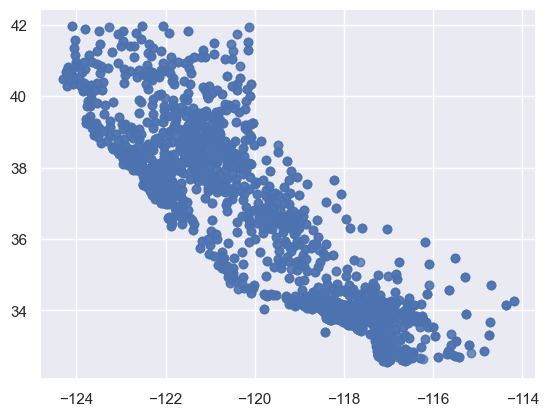

In [11]:
plt.scatter(Telecom["Longitude"], Telecom["Latitude"], alpha=0.5);

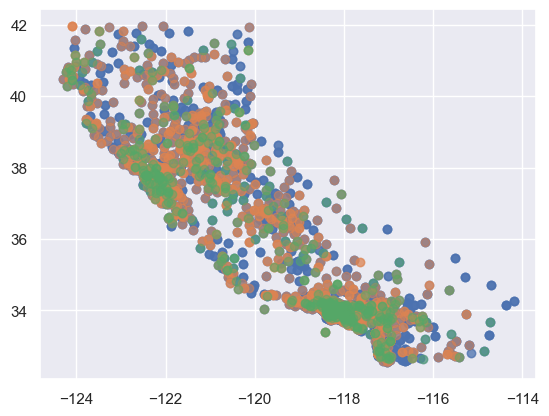

In [12]:
plt.scatter(Telecom.loc[Telecom['Customer Status'] == 'Stayed', "Longitude"], Telecom.loc[Telecom['Customer Status'] == 'Stayed', "Latitude"], alpha=0.5);
plt.scatter(Telecom.loc[Telecom['Customer Status'] == 'Churned', "Longitude"], Telecom.loc[Telecom['Customer Status'] == 'Churned', "Latitude"], alpha=0.5);
plt.scatter(Telecom.loc[Telecom['Customer Status'] == 'Joined', "Longitude"], Telecom.loc[Telecom['Customer Status'] == 'Joined', "Latitude"], alpha=0.5);
#plt.legend();

## Correlations

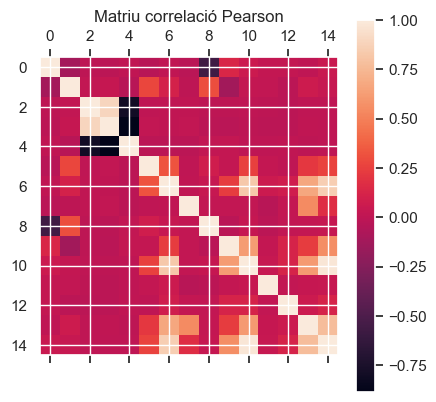

In [13]:
plt.matshow(Telecom.corr())
plt.title("Matriu correlació Pearson")
cb = plt.colorbar()
plt.show();

In [14]:
Telecom.corr()

Age  Number of Dependents  Zip Code  \
Age                                1.000                -0.119    -0.008   
Number of Dependents              -0.119                 1.000     0.016   
Zip Code                          -0.008                 0.016     1.000   
Latitude                          -0.010                 0.029     0.895   
Longitude                          0.008                -0.024    -0.791   
Number of Referrals               -0.025                 0.278     0.001   
Tenure in Months                   0.010                 0.108     0.007   
Avg Monthly Long Distance Charges -0.020                -0.003     0.012   
Avg Monthly GB Download           -0.567                 0.301    -0.003   
Monthly Charge                     0.135                -0.126    -0.003   
Total Charges                      0.060                 0.023     0.002   
Total Refunds                      0.024                 0.014    -0.004   
Total Extra Data Charges           0.025                -0.014    -0.015   
Total Long Distance Charges        0.003                 0.069     0.005   
Total Revenue                      0.048                 0.038     0.003   

                                    Latitude  Longitude  Number of Referrals  \
Age                               -1.031e-02  7.612e-03           -2.514e-02   
Number of Dependents               2.908e-02 -2.427e-02            2.780e-01   
Zip Code                           8.948e-01 -7.906e-01            1.463e-03   
Latitude                           1.000e+00 -8.860e-01            1.871e-02   
Longitude                         -8.860e-01  1.000e+00           -9.893e-03   
Number of Referrals                1.871e-02 -9.893e-03            1.000e+00   
Tenure in Months                   1.196e-02 -9.672e-03            3.270e-01   
Avg Monthly Long Distance Charges  1.445e-02 -1.542e-02            1.800e-03   
Avg Monthly GB Download           -1.349e-02  1.520e-02            8.024e-02   
Monthly Charge                    -2.161e-02  2.105e-02            2.630e-02   
Total Charges                     -2.784e-03  3.811e-03            2.504e-01   
Total Refunds                     -9.901e-03 -5.974e-04            2.476e-02   
Total Extra Data Charges          -1.323e-02  1.046e-02            3.501e-04   
Total Long Distance Charges        8.029e-03 -6.923e-03            2.162e-01   
Total Revenue                      8.196e-05  1.062e-03            2.619e-01   

                                   Tenure in Months  \
Age                                           0.010   
Number of Dependents                          0.108   
Zip Code                                      0.007   
Latitude                                      0.012   
Longitude                                    -0.010   
Number of Referrals                           0.327   
Tenure in Months                              1.000   
Avg Monthly Long Distance Charges             0.013   
Avg Monthly GB Download                       0.038   
Monthly Charge                                0.239   
Total Charges                                 0.826   
Total Refunds                                 0.059   
Total Extra Data Charges                      0.082   
Total Long Distance Charges                   0.674   
Total Revenue                                 0.853   

                                   Avg Monthly Long Distance Charges  \
Age                                                           -0.020   
Number of Dependents                                          -0.003   
Zip Code                                                       0.012   
Latitude                                                       0.014   
Longitude                                                     -0.015   
Number of Referrals                                            0.002   
Tenure in Months                                               0.013   
Avg Monthly Long Distance Charges                              1.000   
Avg Monthl

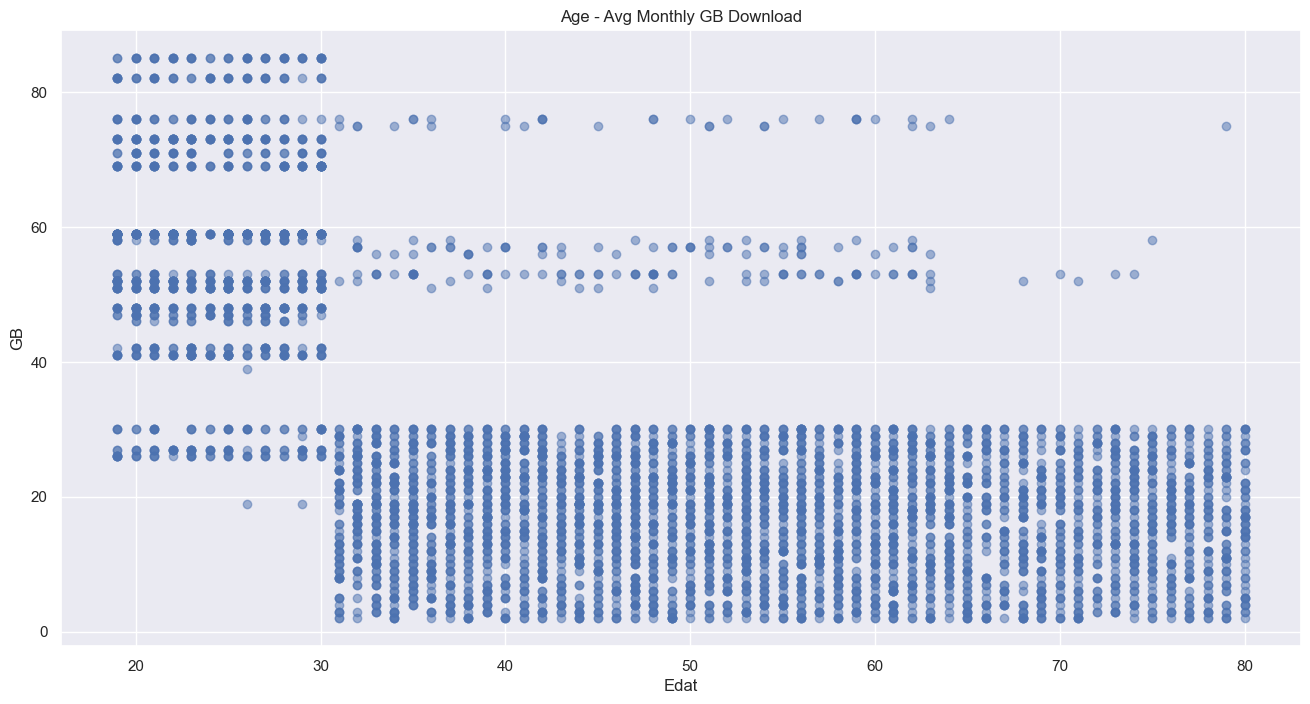

In [15]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("Edat")
plt.ylabel("GB")
plt.title("Age - Avg Monthly GB Download")
plt.scatter(Telecom["Age"], Telecom["Avg Monthly GB Download"], alpha=0.5);

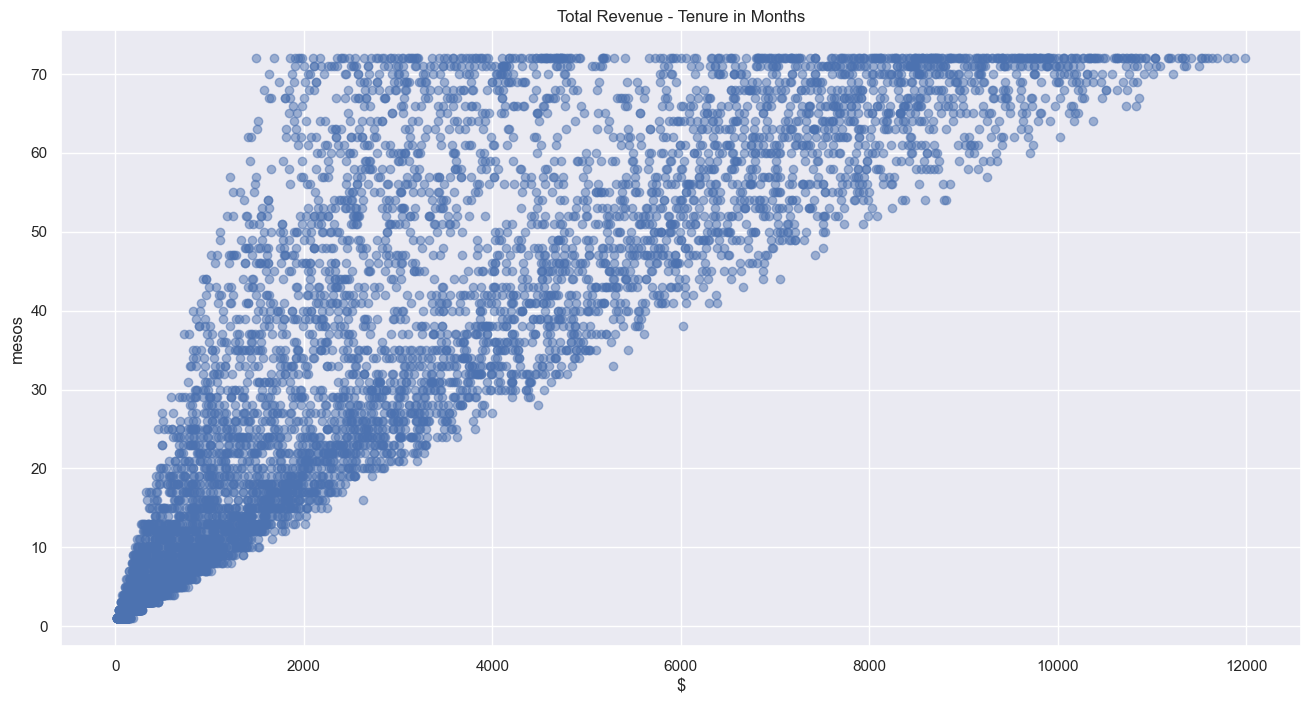

In [16]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("$")
plt.ylabel("mesos")
plt.title("Total Revenue - Tenure in Months")
plt.scatter(Telecom["Total Revenue"], Telecom["Tenure in Months"], alpha=0.5);

Longitude-Latitude-Zip Code \
Total charges-tenure in months - monthly charges - total revenue - total long distance charges

h

# Proposta merge

https://stats.stackexchange.com/questions/94902/how-to-represent-geography-or-zip-code-in-machine-learning-model-or-recommender \
Eliminar longitude latitude: \
Com són dos variables diferents, res ens assegura que utilitzi les dues variables alhora.

In [17]:
Telecom = Telecom.drop('Longitude', axis=1)
Telecom = Telecom.drop('Latitude', axis=1)

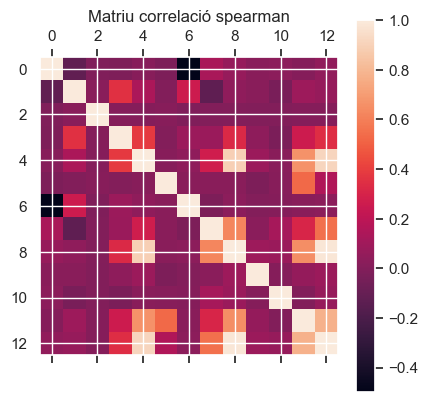

In [18]:
plt.matshow(Telecom.corr(method="spearman"))
plt.title("Matriu correlació spearman")
cb = plt.colorbar()
plt.show();

In [19]:
# spearman spearman -----------

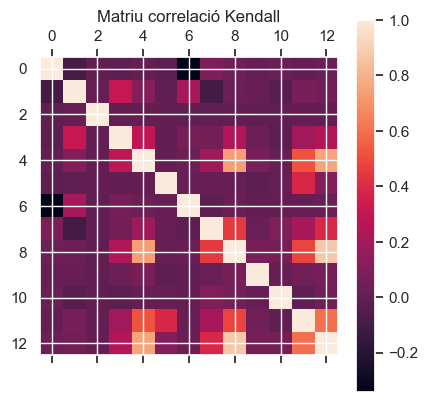

In [20]:
plt.matshow(Telecom.corr(method="kendall"))
plt.title("Matriu correlació Kendall")
cb = plt.colorbar()
plt.show();

# T test / Kruskal-Wallis

In [21]:
# separem entre Churned i Stayed
Churned = Telecom[Telecom['Customer Status']=='Churned']
# Joined = Telecom[Telecom['Customer Status']=='Joined']
Stayed = Telecom[Telecom['Customer Status']=='Stayed']

In [22]:
numerical_columns = Telecom.dtypes[Telecom.dtypes!='object'].index

In [23]:
# Kruskal Wallis
dcc = {}
for var in numerical_columns:
    dcc[var] = stats.kruskal(Churned[var], Stayed[var])
    
for item in dcc.items():
    print(f"{item}")

('Age', KruskalResult(statistic=73.99180093514188, pvalue=7.844216550372549e-18))
('Number of Dependents', KruskalResult(statistic=450.97421954559366, pvalue=4.4268922971685683e-100))
('Zip Code', KruskalResult(statistic=3.540859259748171, pvalue=0.05987443616683888))
('Number of Referrals', KruskalResult(statistic=470.6621388631643, pvalue=2.2997608404892412e-104))
('Tenure in Months', KruskalResult(statistic=1397.0899087810976, pvalue=9.011529904608779e-306))
('Avg Monthly Long Distance Charges', KruskalResult(statistic=nan, pvalue=nan))
('Avg Monthly GB Download', KruskalResult(statistic=nan, pvalue=nan))
('Monthly Charge', KruskalResult(statistic=166.11621305534774, pvalue=5.217717142186936e-38))
('Total Charges', KruskalResult(statistic=651.5834596835358, pvalue=1.0109752703277073e-143))
('Total Refunds', KruskalResult(statistic=16.78074683125094, pvalue=4.195684901686077e-05))
('Total Extra Data Charges', KruskalResult(statistic=13.198821939369614, pvalue=0.0002801251471006325))


In [24]:
# T Test
dcttest1 = {}
for var in numerical_columns:
    dcttest1[var] = stats.ttest_ind(Churned[var], Stayed[var], equal_var=True)

for item in dcttest1.items():
    print(f"{item}")

('Age', Ttest_indResult(statistic=9.079181762681005, pvalue=1.4215273308314593e-19))
('Number of Dependents', Ttest_indResult(statistic=-19.40367245832081, pvalue=1.3171481164778933e-81))
('Zip Code', Ttest_indResult(statistic=-1.5332018642737966, pvalue=0.1252741500059231))
('Number of Referrals', Ttest_indResult(statistic=-26.663616834629646, pvalue=7.82822492220493e-149))
('Tenure in Months', Ttest_indResult(statistic=-39.07090154405057, pvalue=1.6568966556261626e-300))
('Avg Monthly Long Distance Charges', Ttest_indResult(statistic=nan, pvalue=nan))
('Avg Monthly GB Download', Ttest_indResult(statistic=nan, pvalue=nan))
('Monthly Charge', Ttest_indResult(statistic=13.856065103491199, pvalue=4.678320096711753e-43))
('Total Charges', Ttest_indResult(statistic=-20.96188090257876, pvalue=1.6848244699214418e-94))
('Total Refunds', Ttest_indResult(statistic=-3.5358767370074777, pvalue=0.00040921805173066395))
('Total Extra Data Charges', Ttest_indResult(statistic=-0.021014409015969796, p

In [25]:
dcttest2 = {}
for var in numerical_columns:
    dcttest2[var] = stats.ttest_ind(Churned[var], Stayed[var], equal_var=False)
for item in dcttest2.items():
    print(f"{item}")

('Age', Ttest_indResult(statistic=8.80117459921137, pvalue=2.167315693779738e-18))
('Number of Dependents', Ttest_indResult(statistic=-25.013024176731427, pvalue=1.4237038060235358e-131))
('Zip Code', Ttest_indResult(statistic=-1.5503592559590726, pvalue=0.12114549960342641))
('Number of Referrals', Ttest_indResult(statistic=-38.34118894264277, pvalue=7.035455937408357e-290))
('Tenure in Months', Ttest_indResult(statistic=-41.417166320437296, pvalue=5.112684045352e-311))
('Avg Monthly Long Distance Charges', Ttest_indResult(statistic=nan, pvalue=nan))
('Avg Monthly GB Download', Ttest_indResult(statistic=nan, pvalue=nan))
('Monthly Charge', Ttest_indResult(statistic=15.091941264125895, pvalue=3.8293242781599166e-50))
('Total Charges', Ttest_indResult(statistic=-22.807312531614922, pvalue=1.4654007162788851e-108))
('Total Refunds', Ttest_indResult(statistic=-3.8342104657609153, pvalue=0.00012785536878201904))
('Total Extra Data Charges', Ttest_indResult(statistic=-0.02148759153577935, p

Total Extra Data Charges\
Avg Monthly Long Distance Charges\
Avg Monthly GB Download

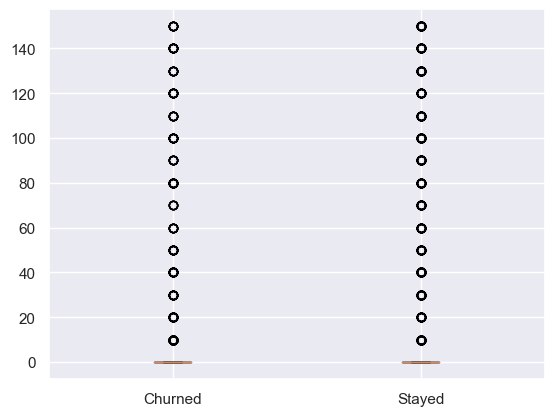

In [26]:
my_dict = {'Churned':Churned["Total Extra Data Charges"], 'Stayed':Stayed["Total Extra Data Charges"]}

fig, ax = plt.subplots();
ax.boxplot(my_dict.values());
ax.set_xticklabels(my_dict.keys());

Mirar després del recode i NAs

# PLOTS anàlisi univariat

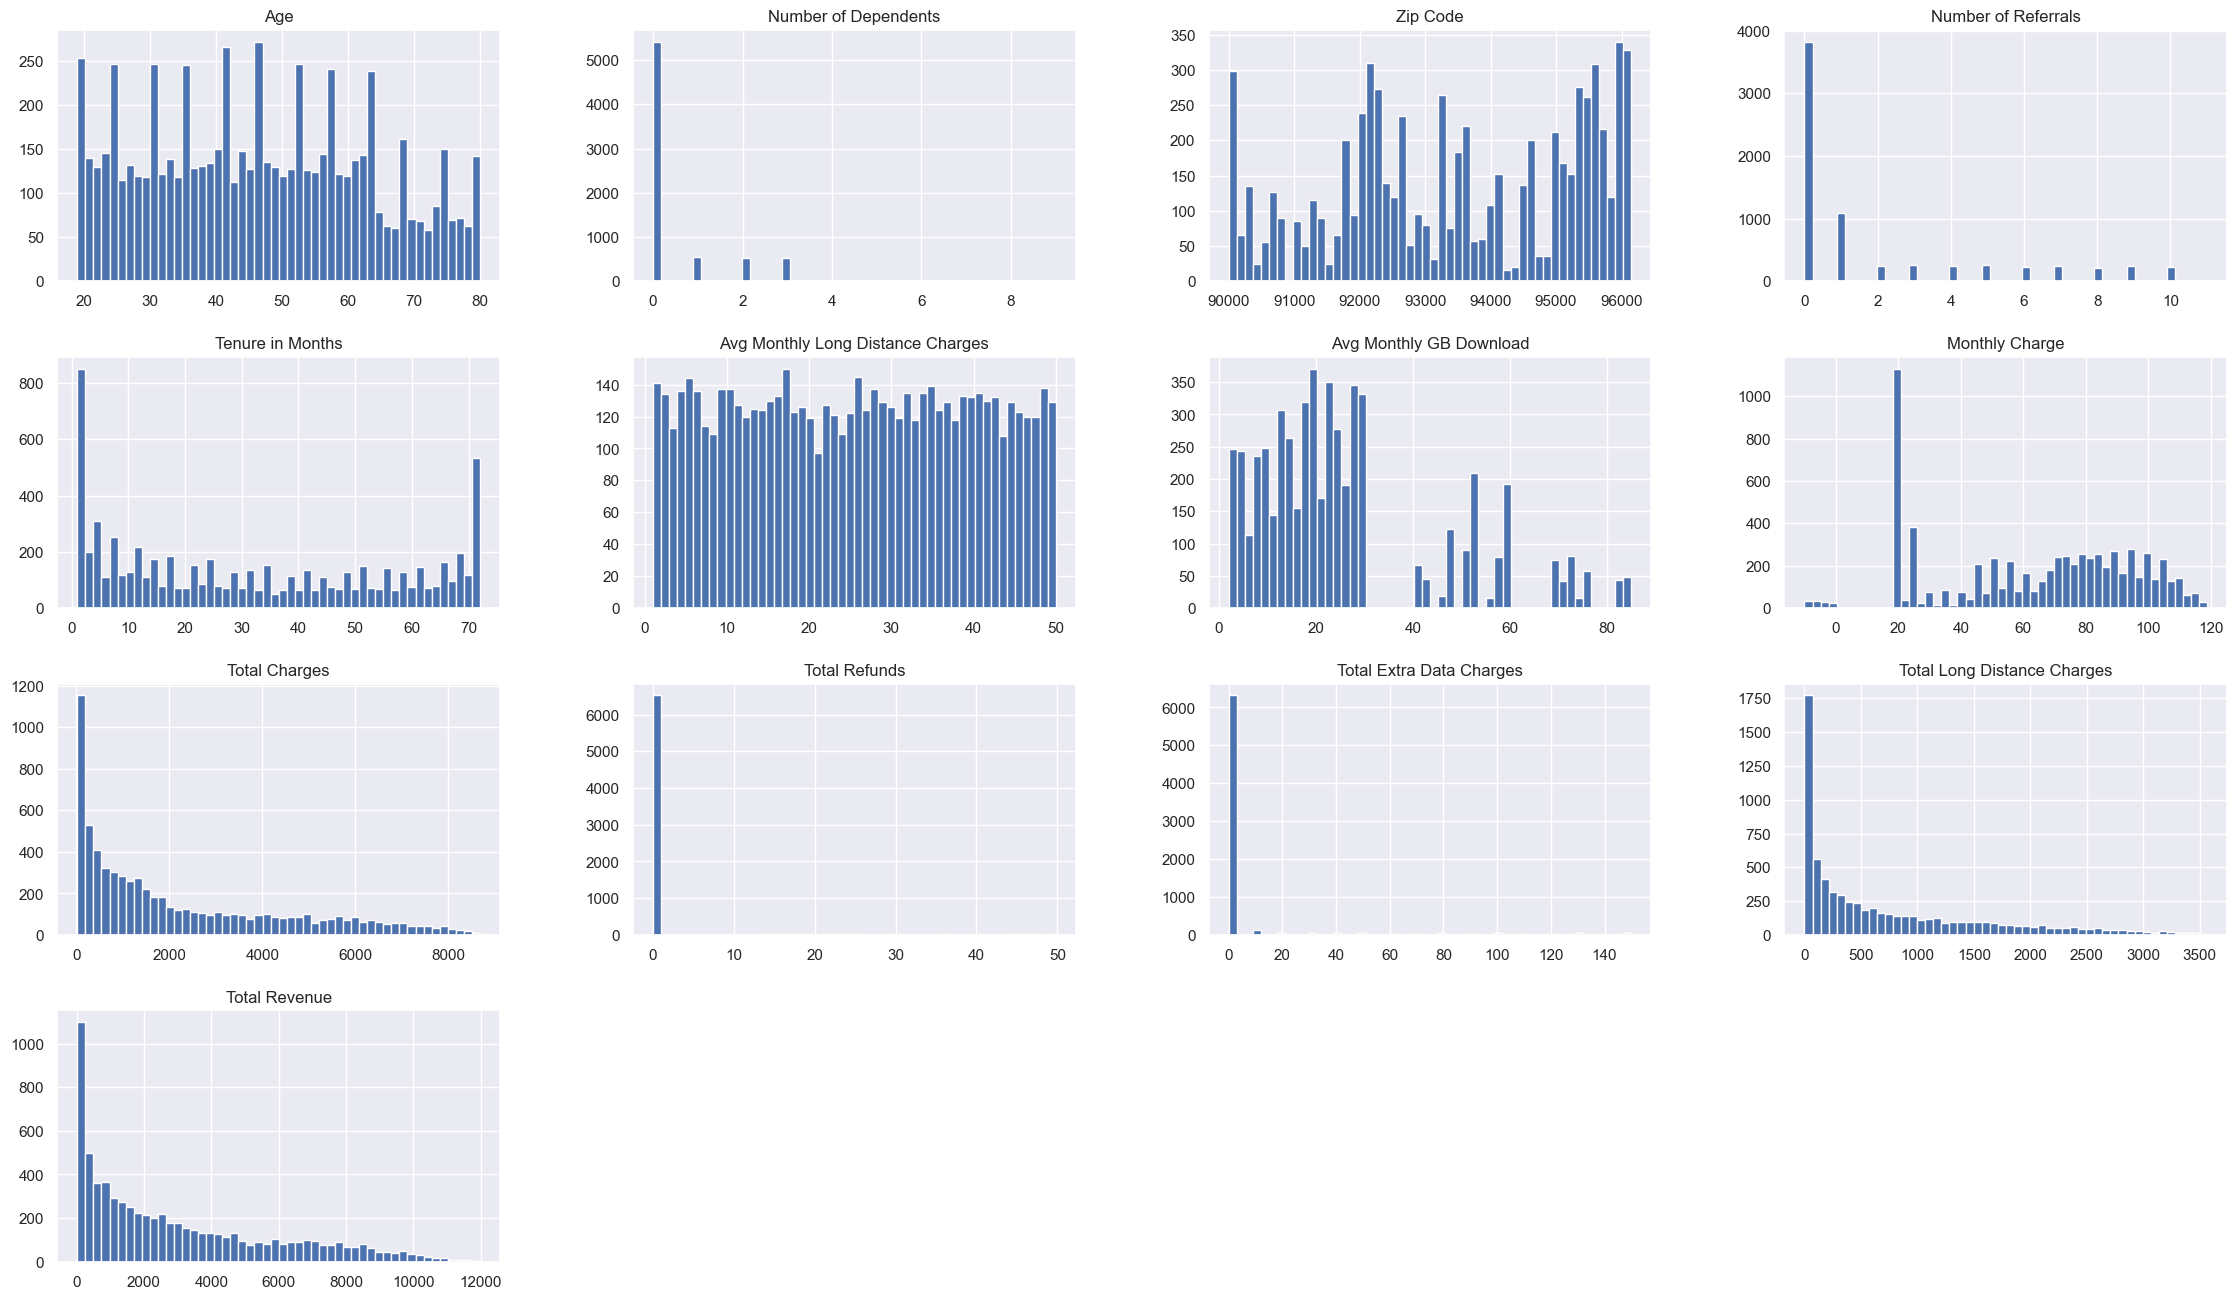

In [27]:
fig, axes= plt.subplots(1,1, figsize=(28,16))
Telecom.hist(ax=axes, bins=50);

In [28]:
Telecom[["Age"]].describe()

Age
count  7043.00
mean     46.51
std      16.75
min      19.00
25%      32.00
50%      46.00
75%      60.00
max      80.00

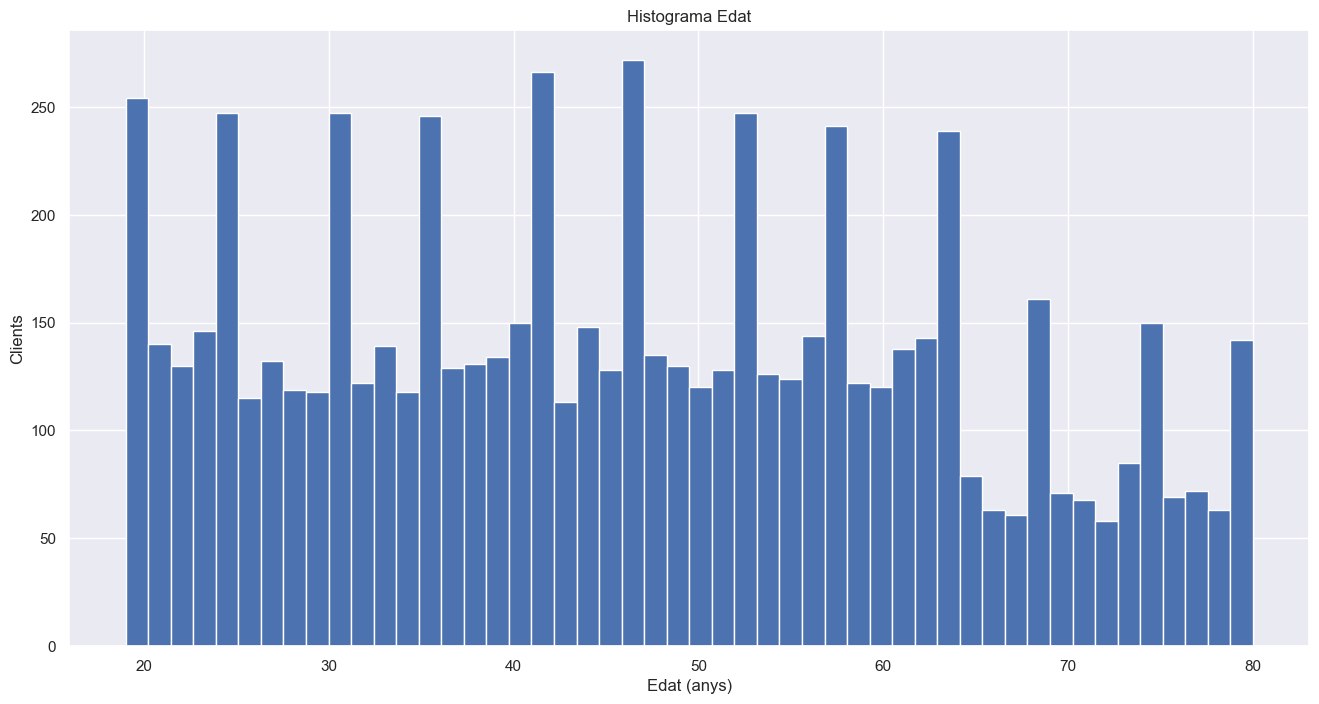

In [29]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("Edat (anys)")
plt.ylabel("Clients")
plt.title("Histograma Edat")
Telecom["Age"].hist(ax=axes, bins=50);

In [30]:
Telecom[["Number of Dependents"]].describe()

Number of Dependents
count              7043.000
mean                  0.469
std                   0.963
min                   0.000
25%                   0.000
50%                   0.000
75%                   0.000
max                   9.000

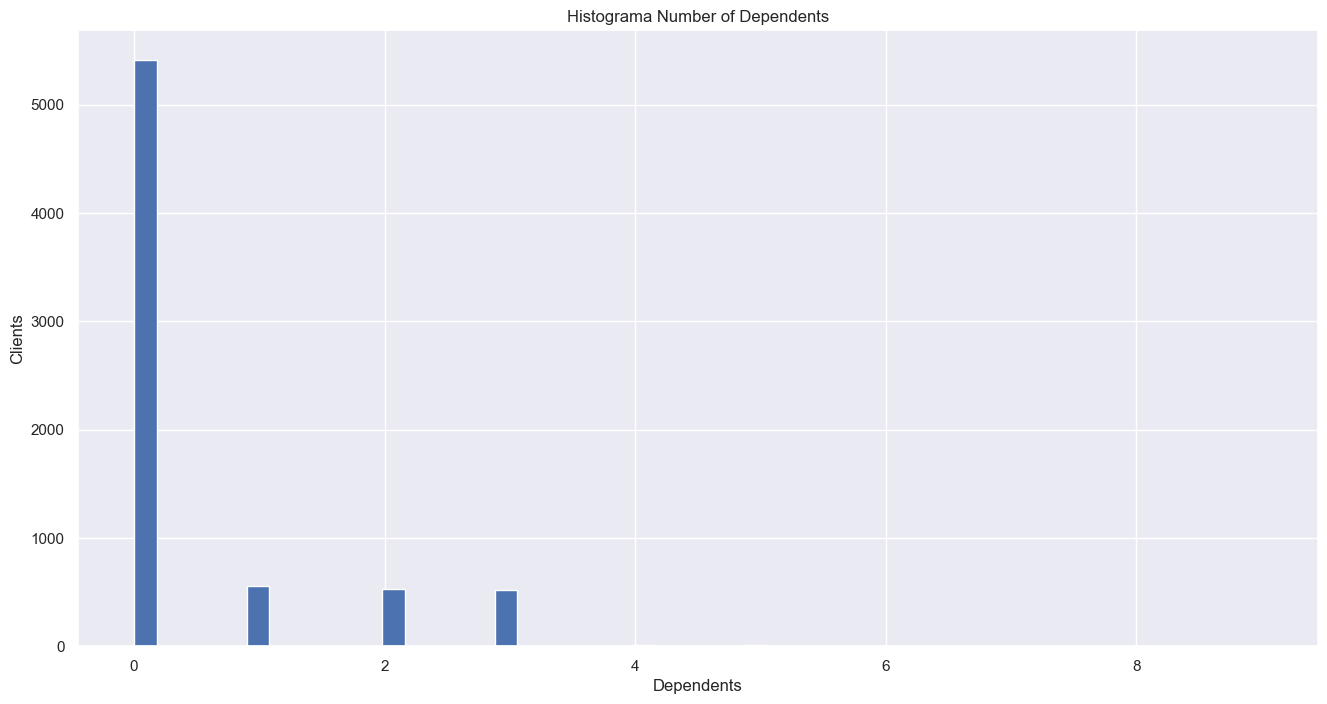

In [31]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("Dependents")
plt.ylabel("Clients")
plt.title("Histograma Number of Dependents")
Telecom["Number of Dependents"].hist(ax=axes, bins=50);

In [32]:
Telecom[["Zip Code"]].describe()

Zip Code
count   7043.000
mean   93486.071
std     1856.768
min    90001.000
25%    92101.000
50%    93518.000
75%    95329.000
max    96150.000

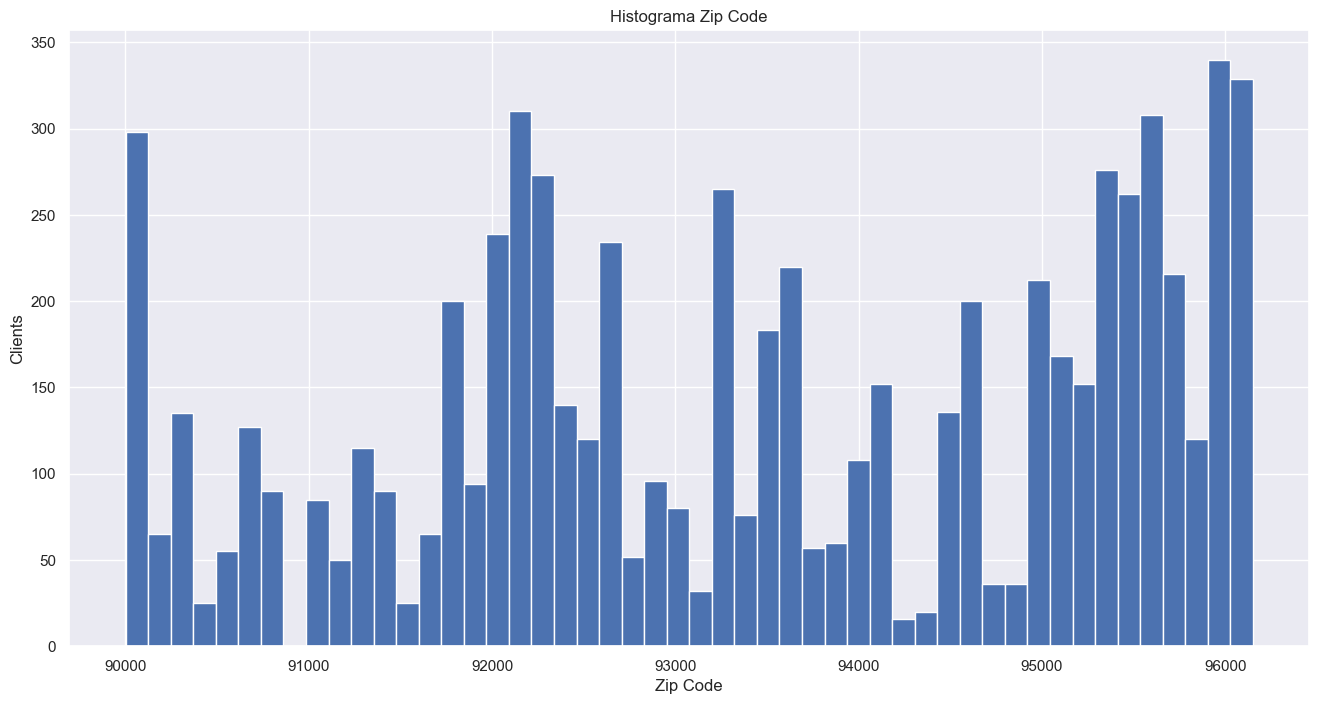

In [33]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("Zip Code")
plt.ylabel("Clients")
plt.title("Histograma Zip Code")
Telecom["Zip Code"].hist(ax=axes, bins=50);

In [34]:
#Telecom[["Latitude"]].describe()

In [35]:
# fig, axes= plt.subplots(1,1, figsize=(16,8))
# plt.xlabel("")
# plt.ylabel("Clients")
# plt.title("")
# Telecom["Latitude"].hist(ax=axes, bins=50);

In [36]:
# Telecom[["Longitude"]].describe()

In [37]:
# fig, axes= plt.subplots(1,1, figsize=(16,8))
# plt.xlabel("")
# plt.ylabel("Clients")
# plt.title("")
# Telecom["Longitude"].hist(ax=axes, bins=50);

In [38]:
Telecom[["Number of Referrals"]].describe()

Number of Referrals
count             7043.000
mean                 1.952
std                  3.001
min                  0.000
25%                  0.000
50%                  0.000
75%                  3.000
max                 11.000

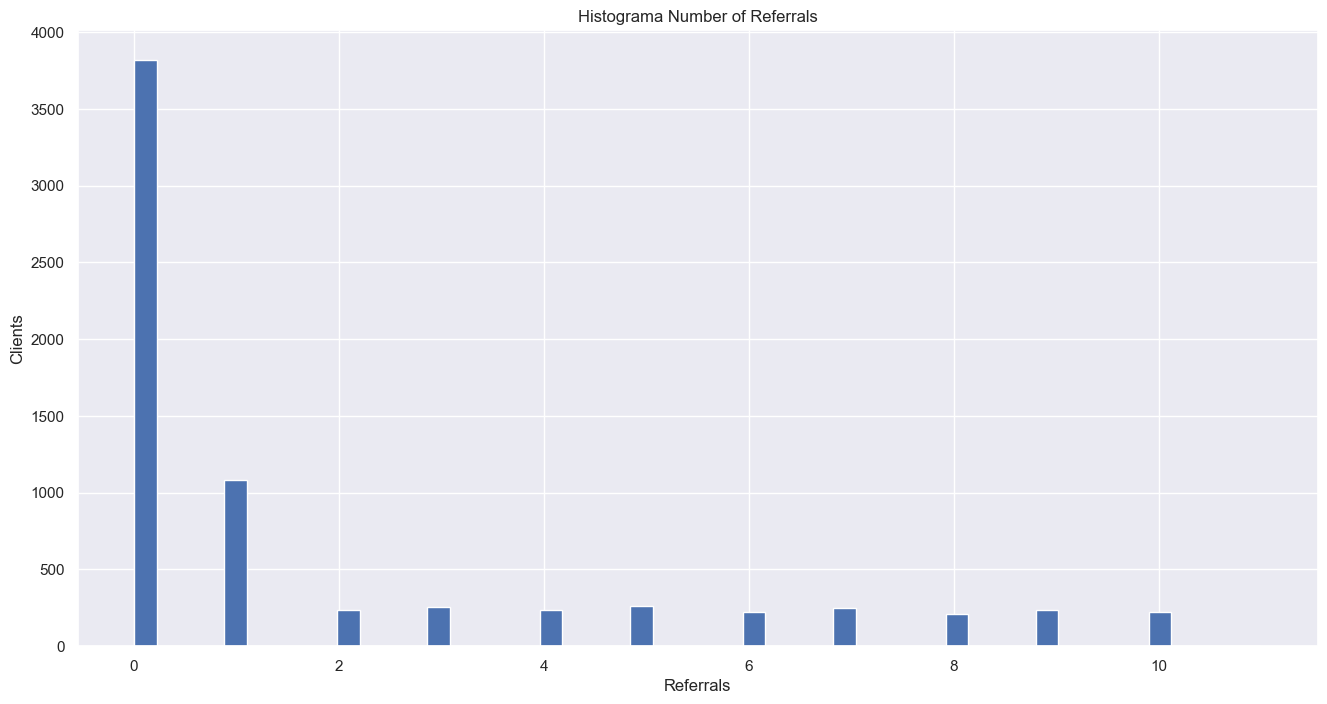

In [39]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("Referrals")
plt.ylabel("Clients")
plt.title("Histograma Number of Referrals")
Telecom["Number of Referrals"].hist(ax=axes, bins=50);

In [40]:
Telecom[["Tenure in Months"]].describe()

Tenure in Months
count          7043.000
mean             32.387
std              24.542
min               1.000
25%               9.000
50%              29.000
75%              55.000
max              72.000

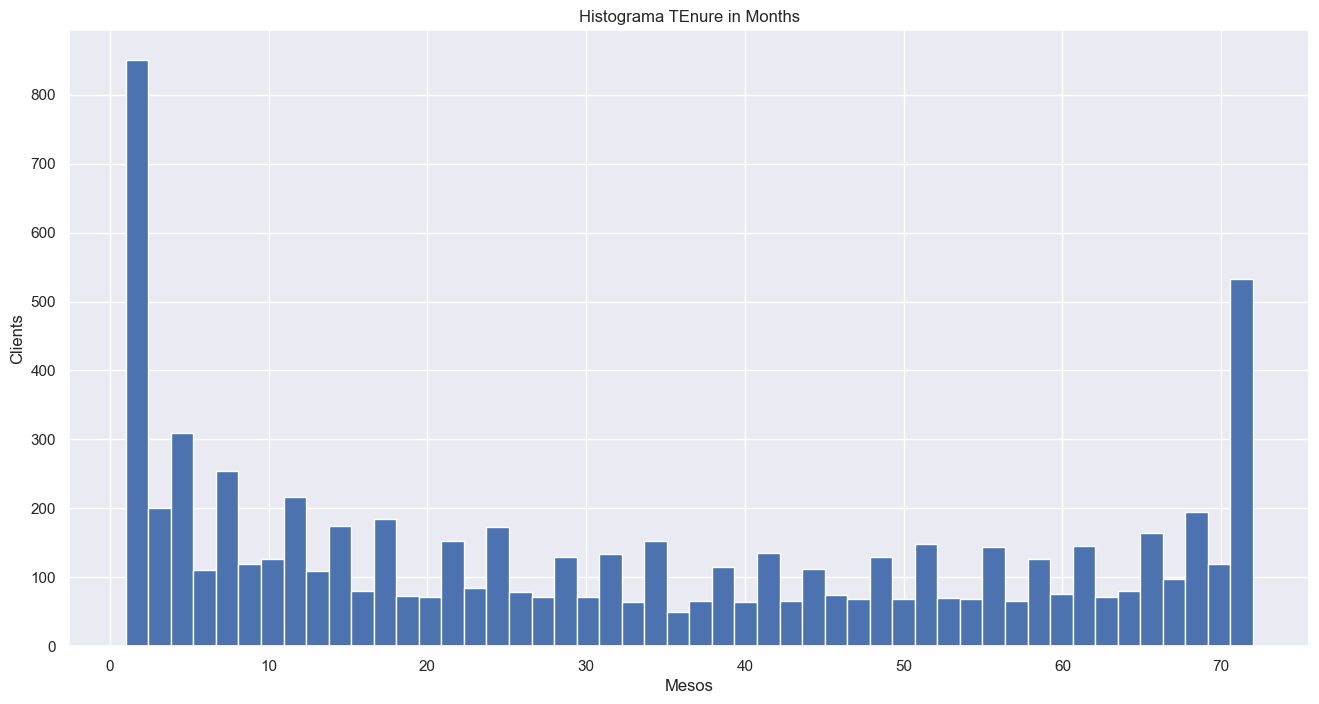

In [41]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("Mesos")
plt.ylabel("Clients")
plt.title("Histograma TEnure in Months")
Telecom["Tenure in Months"].hist(ax=axes, bins=50);

In [42]:
Telecom[["Avg Monthly Long Distance Charges"]].describe()

Avg Monthly Long Distance Charges
count                           6361.000
mean                              25.421
std                               14.200
min                                1.010
25%                               13.050
50%                               25.690
75%                               37.680
max                               49.990

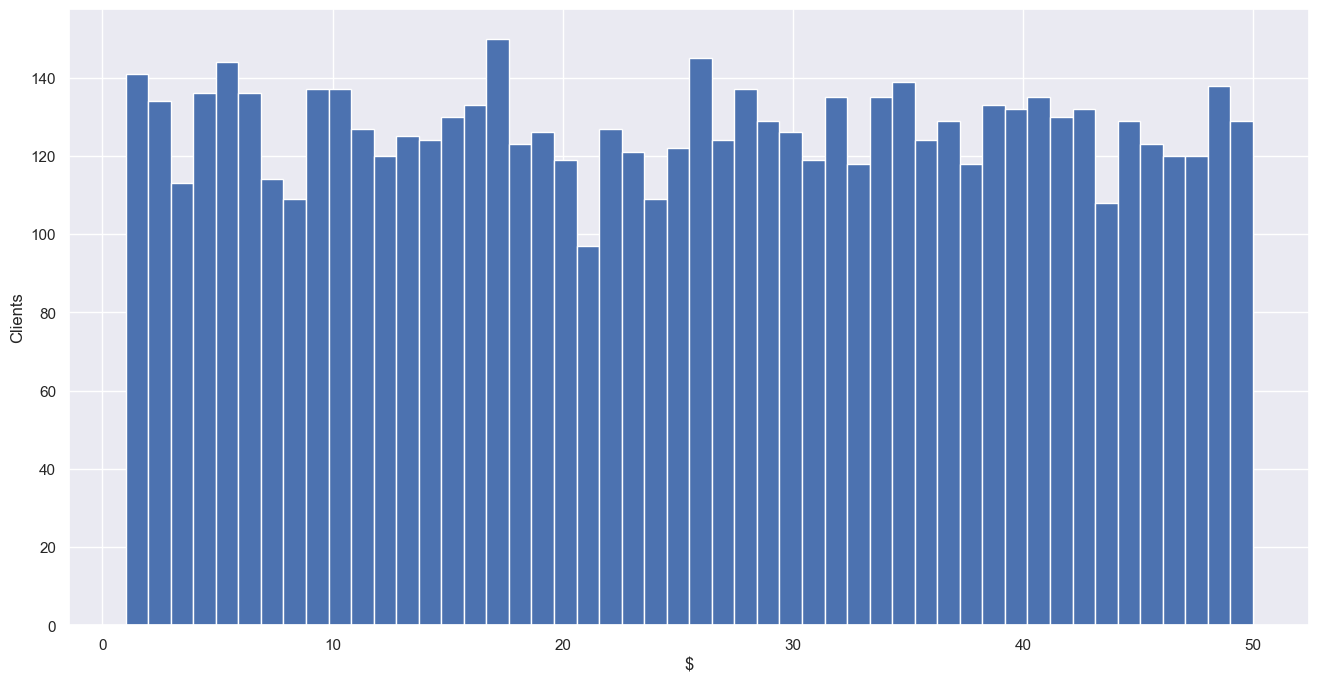

In [43]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("$")
plt.ylabel("Clients")
plt.title("")
Telecom["Avg Monthly Long Distance Charges"].hist(ax=axes, bins=50);

In [44]:
Telecom[["Avg Monthly GB Download"]].describe()

Avg Monthly GB Download
count                 5517.000
mean                    26.190
std                     19.587
min                      2.000
25%                     13.000
50%                     21.000
75%                     30.000
max                     85.000

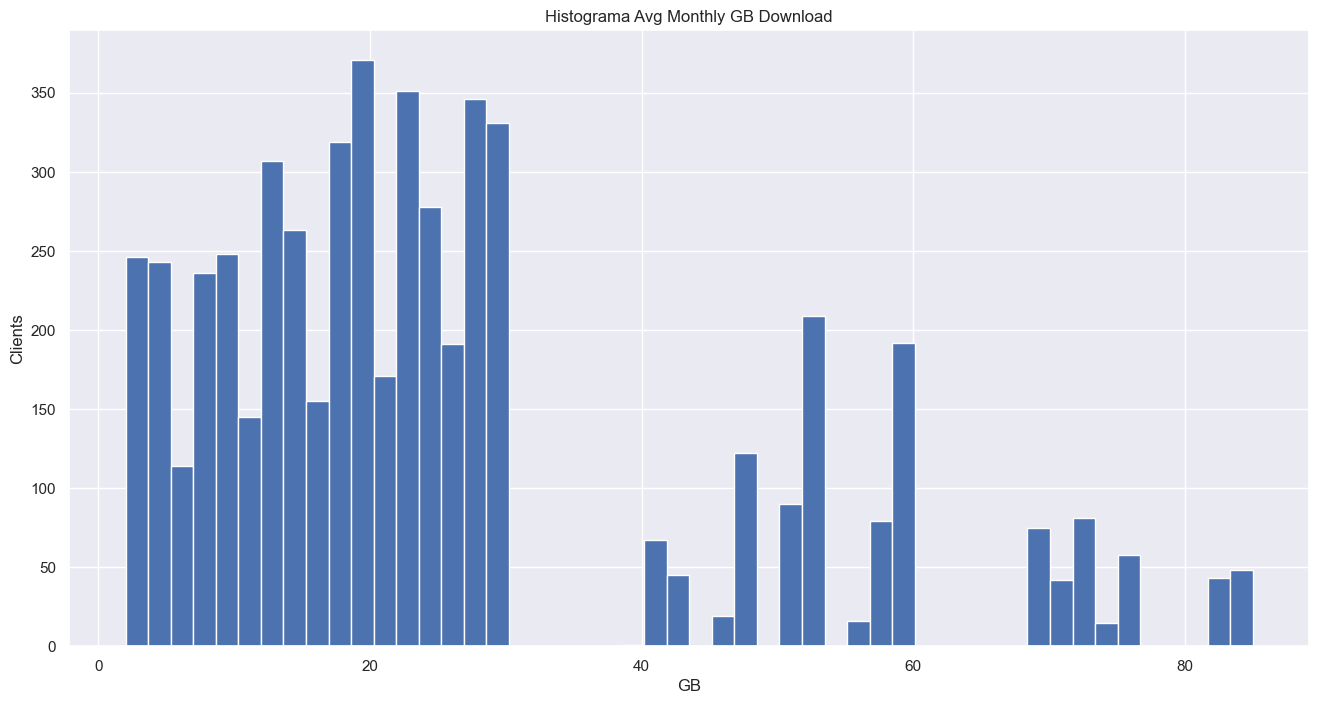

In [45]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("GB")
plt.ylabel("Clients")
plt.title("Histograma Avg Monthly GB Download")
Telecom["Avg Monthly GB Download"].hist(ax=axes, bins=50);

In [46]:
Telecom[["Monthly Charge"]].describe()

Monthly Charge
count        7043.000
mean           63.596
std            31.205
min           -10.000
25%            30.400
50%            70.050
75%            89.750
max           118.750

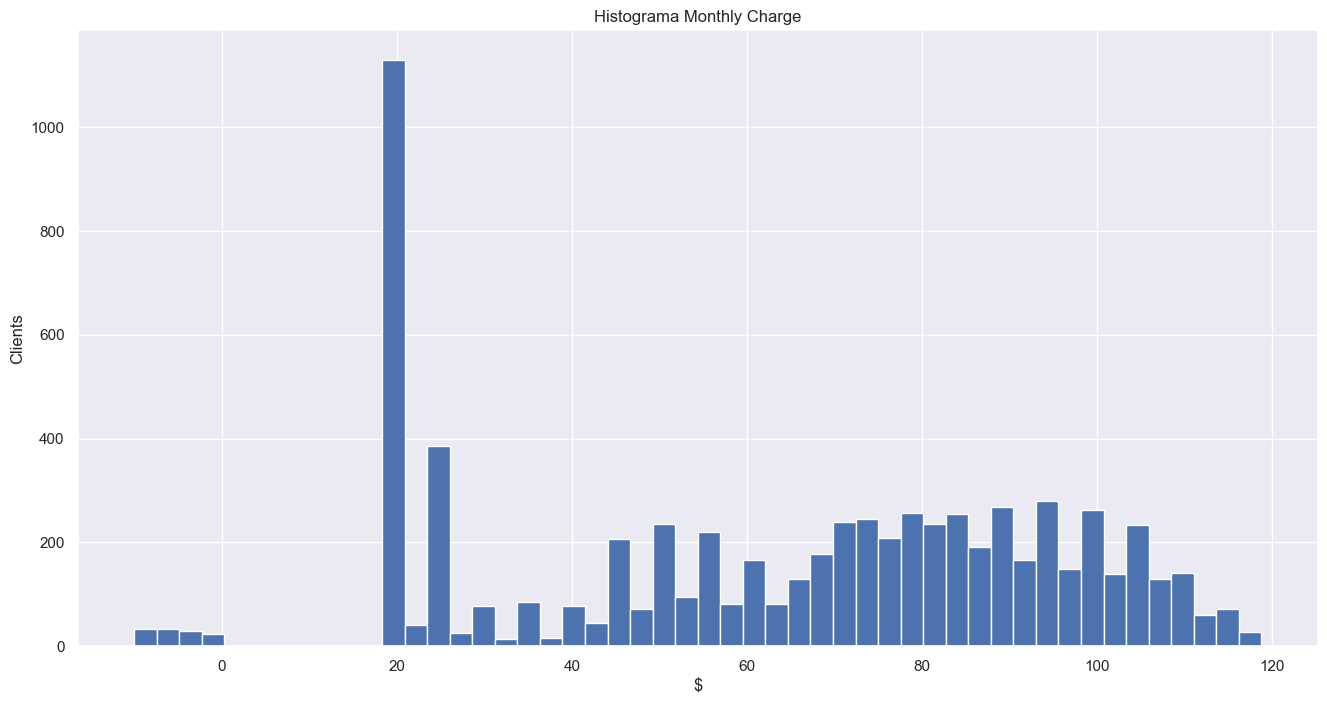

In [47]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("$")
plt.ylabel("Clients")
plt.title("Histograma Monthly Charge")
Telecom["Monthly Charge"].hist(ax=axes, bins=50);

In [48]:
Telecom[["Total Charges"]].describe()

Total Charges
count       7043.000
mean        2280.381
std         2266.220
min           18.800
25%          400.150
50%         1394.550
75%         3786.600
max         8684.800

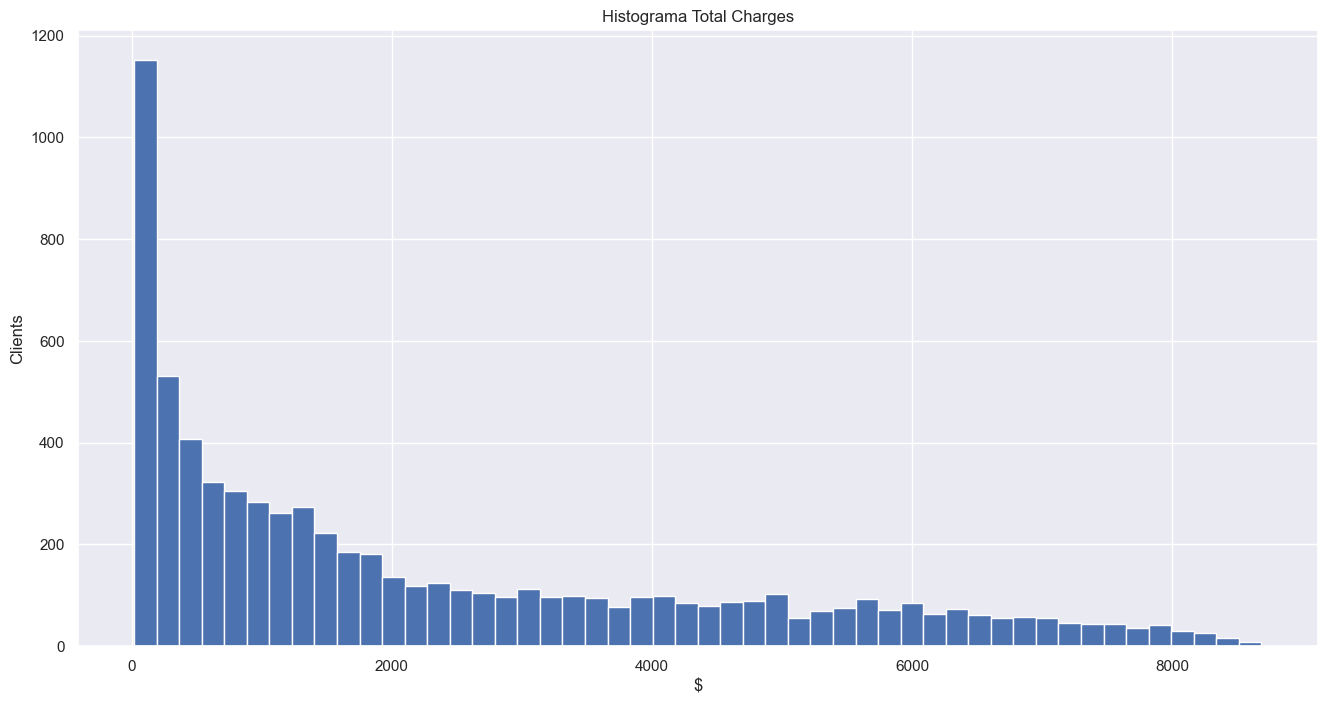

In [49]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("$")
plt.ylabel("Clients")
plt.title("Histograma Total Charges")
Telecom["Total Charges"].hist(ax=axes, bins=50);

In [50]:
Telecom[["Total Refunds"]].describe()

Total Refunds
count       7043.000
mean           1.962
std            7.903
min            0.000
25%            0.000
50%            0.000
75%            0.000
max           49.790

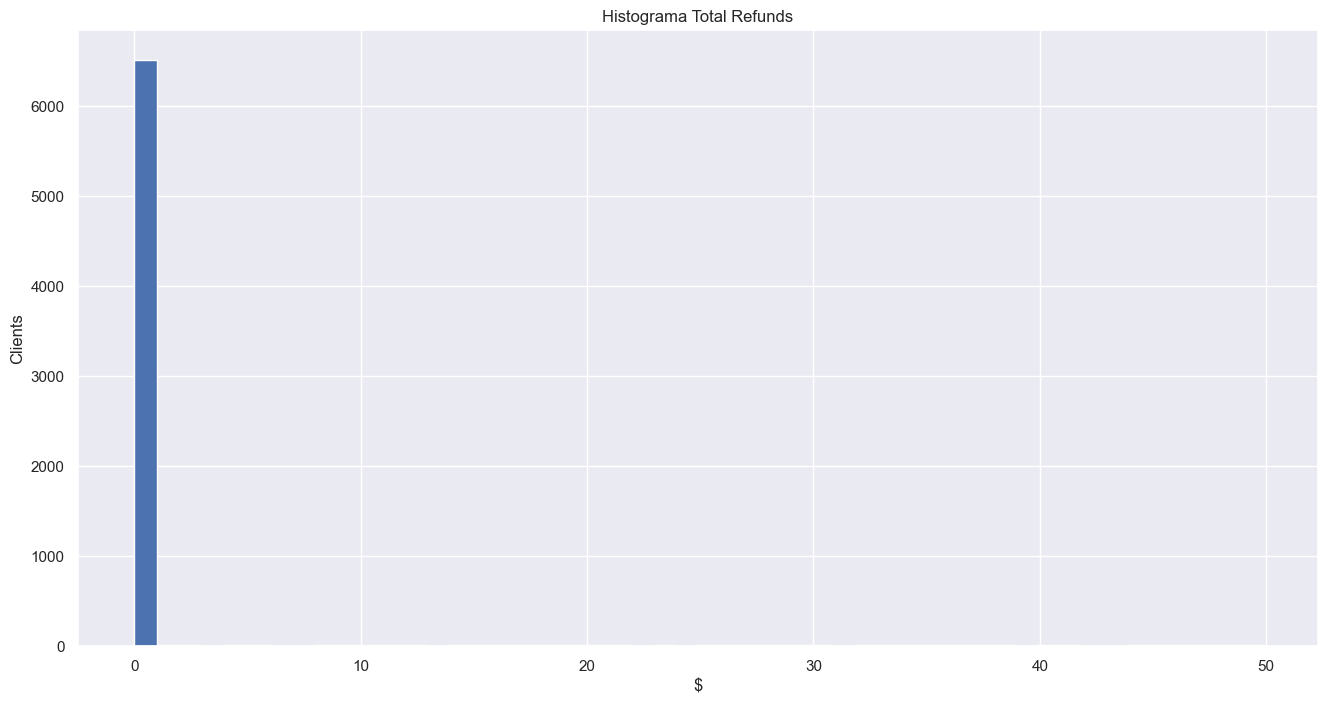

In [51]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("$")
plt.ylabel("Clients")
plt.title("Histograma Total Refunds")
Telecom["Total Refunds"].hist(ax=axes, bins=50);

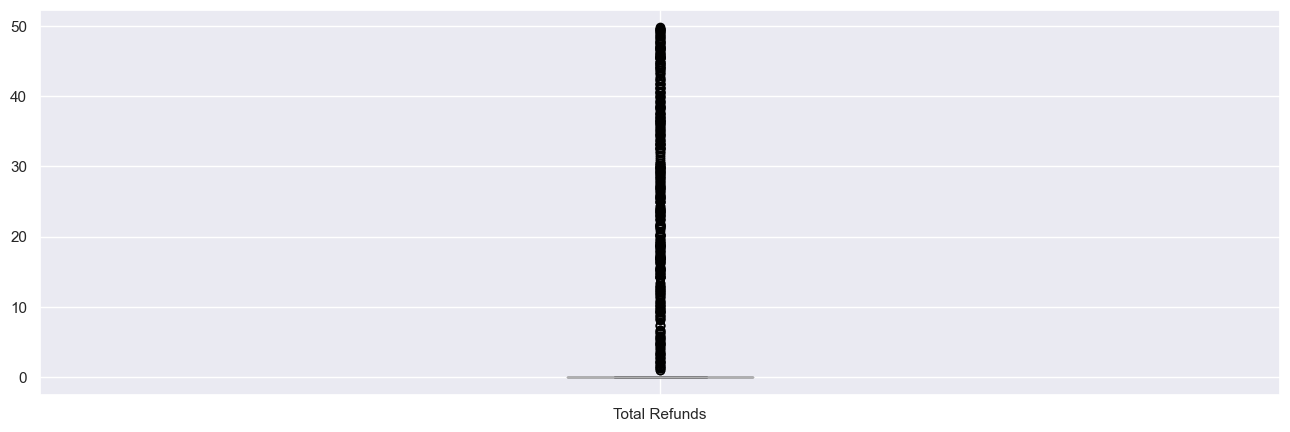

In [52]:
Telecom.boxplot(column="Total Refunds", figsize=(16, 5));

In [53]:
Telecom[["Total Extra Data Charges"]].describe()

Total Extra Data Charges
count                  7043.000
mean                      6.861
std                      25.105
min                       0.000
25%                       0.000
50%                       0.000
75%                       0.000
max                     150.000

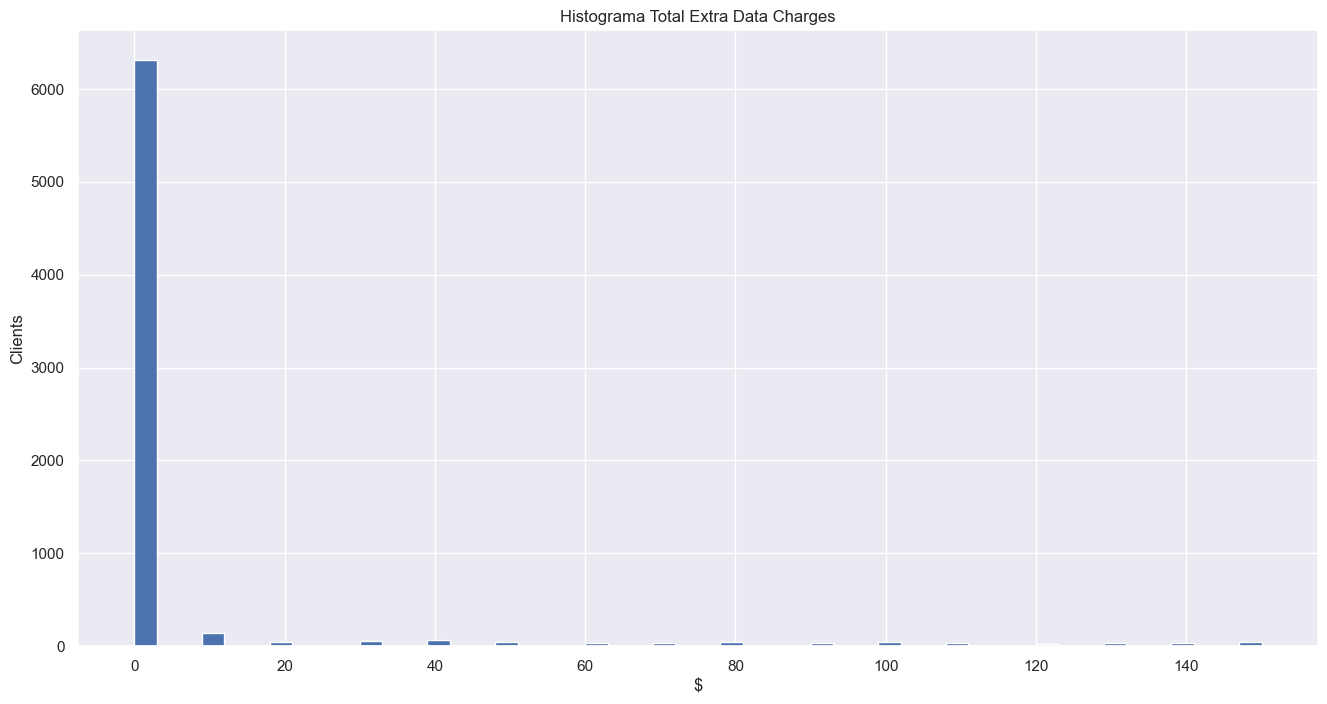

In [54]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("$")
plt.ylabel("Clients")
plt.title("Histograma Total Extra Data Charges")
Telecom["Total Extra Data Charges"].hist(ax=axes, bins=50);

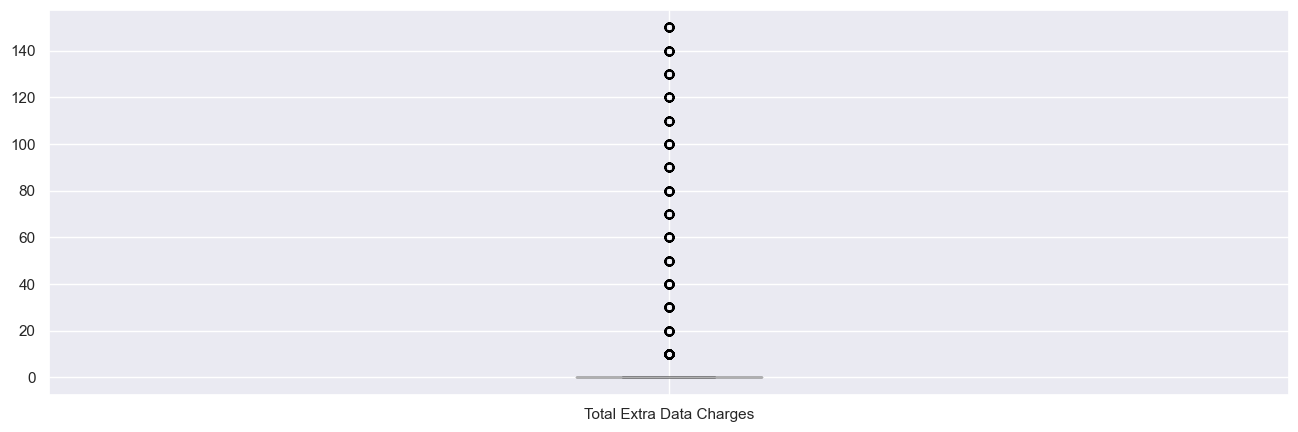

In [55]:
Telecom.boxplot(column="Total Extra Data Charges", figsize=(16, 5));

In [56]:
Telecom[["Total Long Distance Charges"]].describe()

Total Long Distance Charges
count                     7043.000
mean                       749.099
std                        846.660
min                          0.000
25%                         70.545
50%                        401.440
75%                       1191.100
max                       3564.720

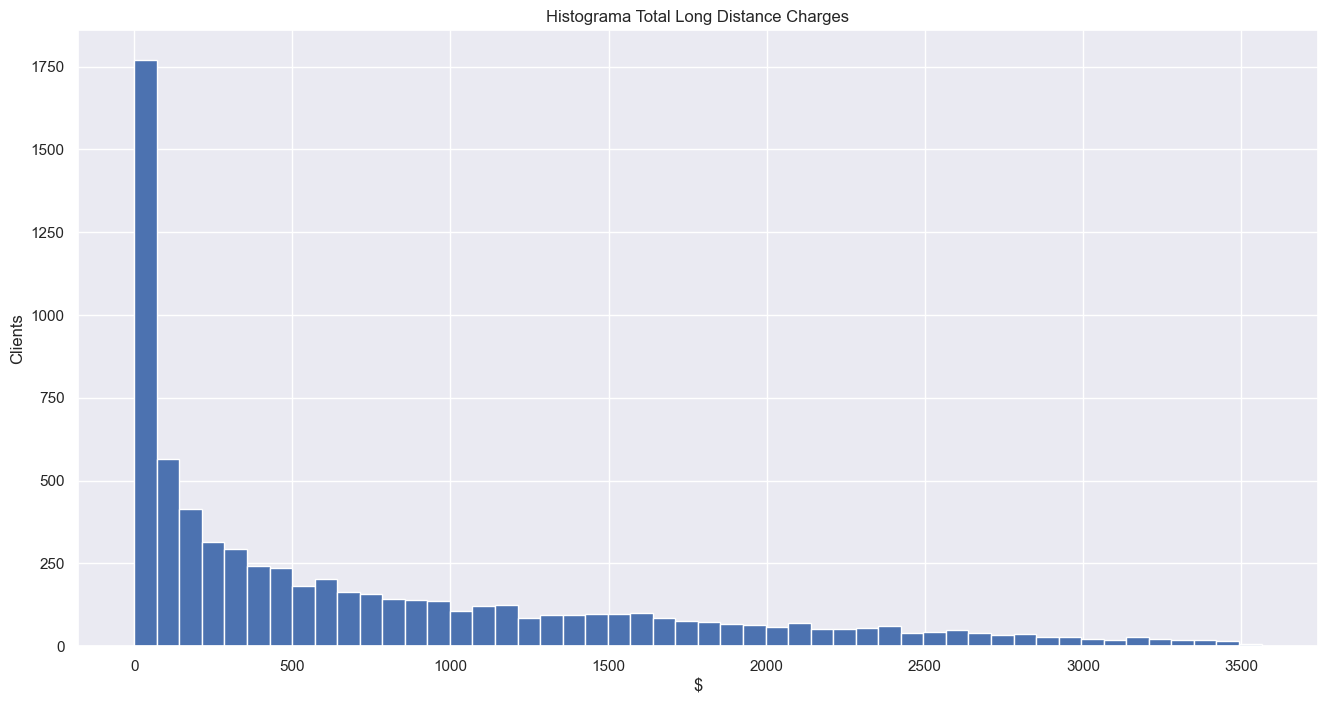

In [57]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("$")
plt.ylabel("Clients")
plt.title("Histograma Total Long Distance Charges")
Telecom["Total Long Distance Charges"].hist(ax=axes, bins=50);

In [58]:
Telecom[["Total Revenue"]].describe()

Total Revenue
count       7043.000
mean        3034.379
std         2865.205
min           21.360
25%          605.610
50%         2108.640
75%         4801.145
max        11979.340

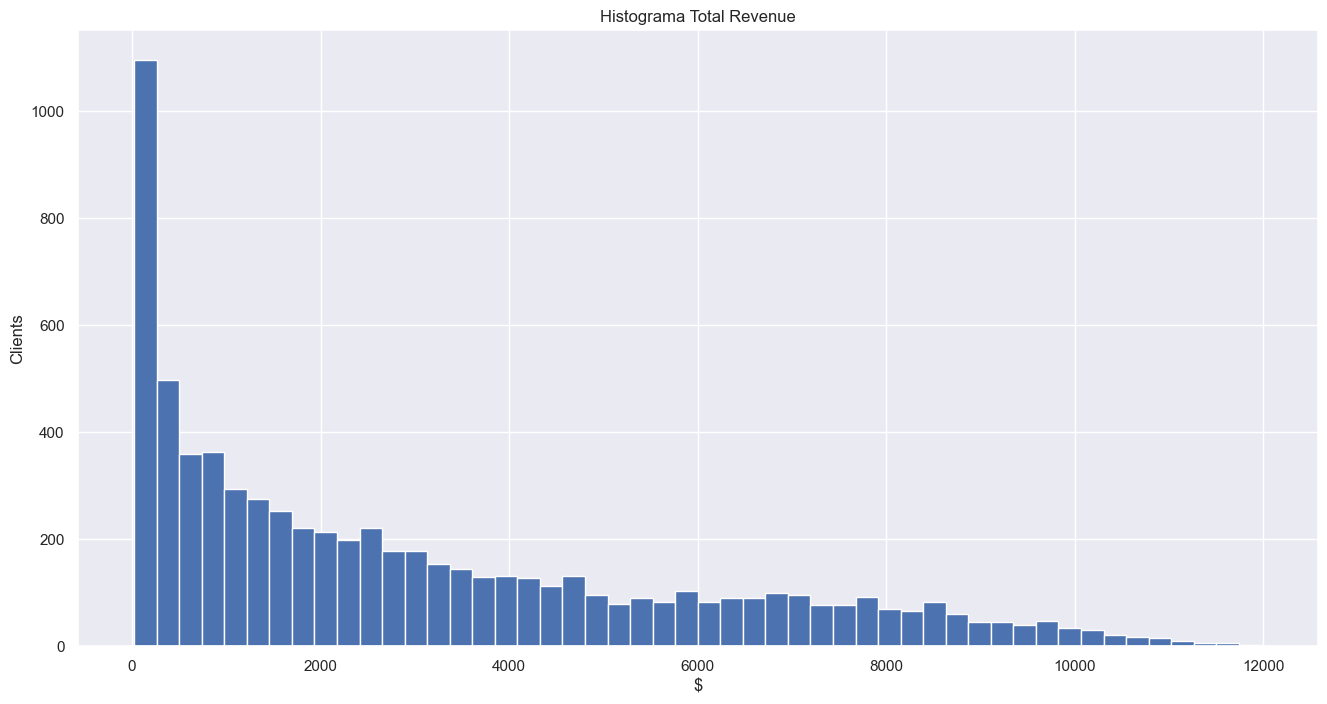

In [59]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("$")
plt.ylabel("Clients")
plt.title("Histograma Total Revenue")
Telecom["Total Revenue"].hist(ax=axes, bins=50);

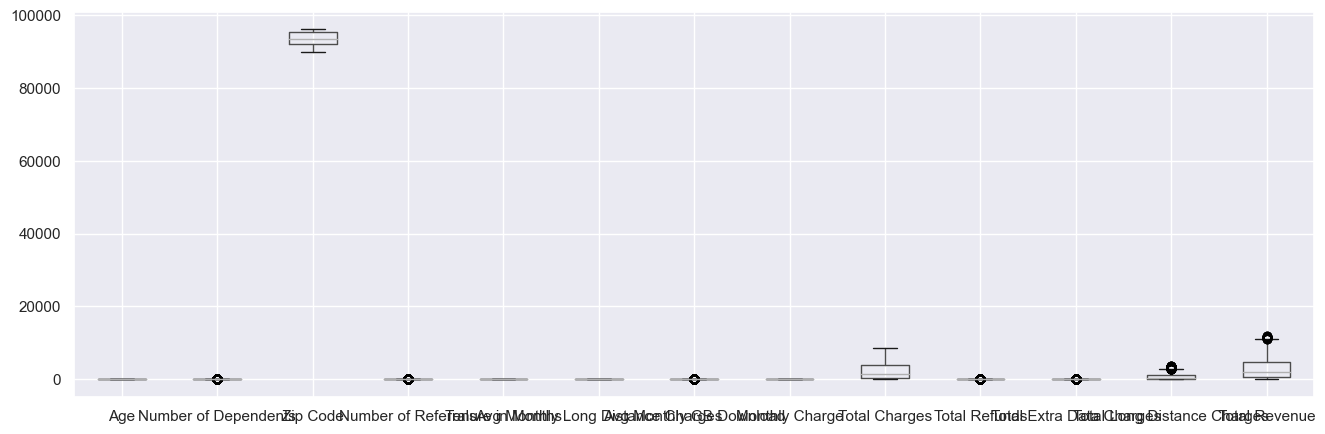

In [60]:
numerical_columns = Telecom.dtypes[Telecom.dtypes!='object'].index
Telecom.loc[:, numerical_columns].boxplot(figsize=(16, 5));

# Qualitatives

In [61]:
Telecom.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming 

In [62]:
cat_columns = Telecom.dtypes[Telecom.dtypes=='object'].index
cat_columns

Index(['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [63]:
Telecom["Online Security"].value_counts()

No     3498
Yes    2019
Name: Online Security, dtype: int64

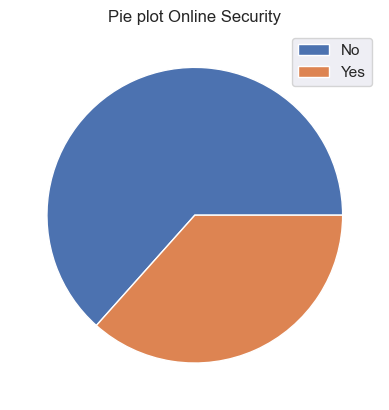

In [64]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Online Security"].value_counts());
ax.legend(patches, labels=Telecom["Online Security"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Online Security")
plt.show();

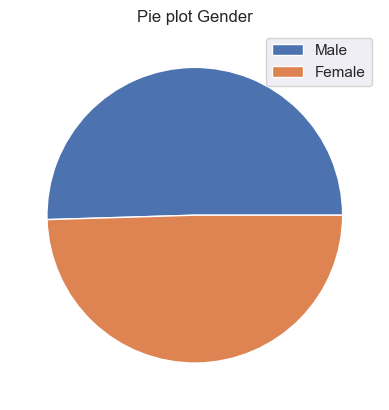

In [65]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Gender"].value_counts());
ax.legend(patches, labels=Telecom["Gender"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Gender")
plt.show();

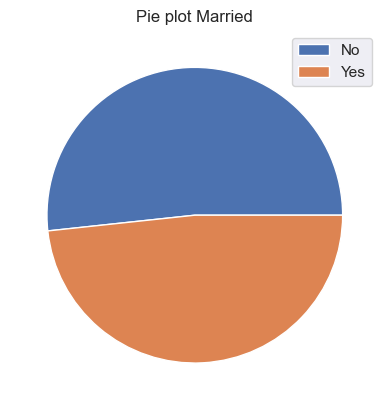

In [66]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Married"].value_counts());
ax.legend(patches, labels=Telecom["Married"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Married")
plt.show();

In [67]:
Telecom["City"].value_counts()

Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Johannesburg          2
South Lake Tahoe      2
Jacumba               2
Holtville             2
Eldridge              2
Name: City, Length: 1106, dtype: int64

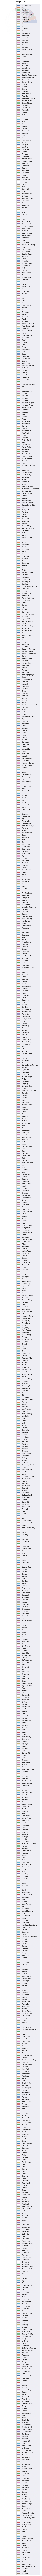

In [68]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["City"].value_counts());
ax.legend(patches, labels=Telecom["City"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot City")
plt.show();

### Treure City

In [69]:
Telecom = Telecom.drop('City', axis=1)

In [70]:
Telecom["Offer"].describe()

count     7043
unique       6
top       None
freq      3877
Name: Offer, dtype: object

In [71]:
Telecom["Offer"].value_counts()

None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: Offer, dtype: int64

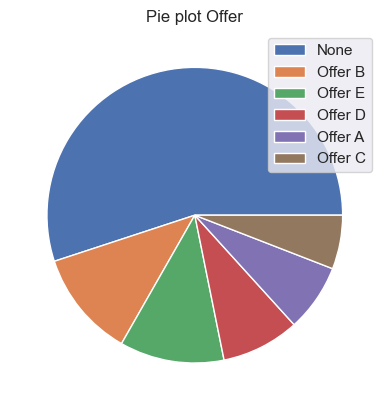

In [72]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Offer"].value_counts());
ax.legend(patches, labels=Telecom["Offer"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Offer")
plt.show();

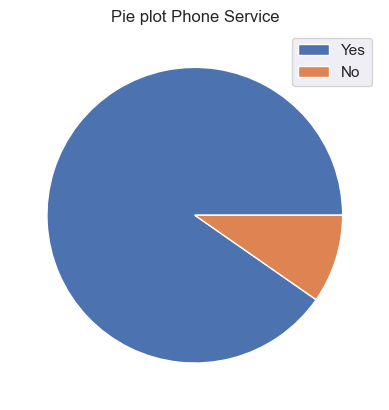

In [73]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Phone Service"].value_counts());
ax.legend(patches, labels=Telecom["Phone Service"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Phone Service")
plt.show();

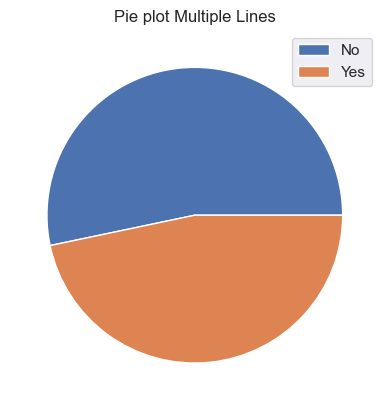

In [74]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Multiple Lines"].value_counts());
ax.legend(patches, labels=Telecom["Multiple Lines"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Multiple Lines")
plt.show();

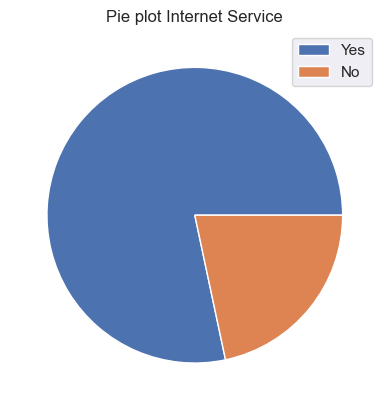

In [75]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Internet Service"].value_counts());
ax.legend(patches, labels=Telecom["Internet Service"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Internet Service")
plt.show();

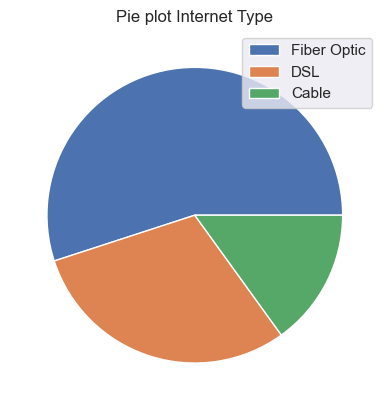

In [76]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Internet Type"].value_counts());
ax.legend(patches, labels=Telecom["Internet Type"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Internet Type")
plt.show();

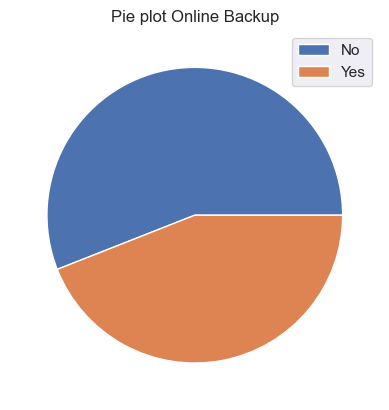

In [77]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Online Backup"].value_counts());
ax.legend(patches, labels=Telecom["Online Backup"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Online Backup")
plt.show();

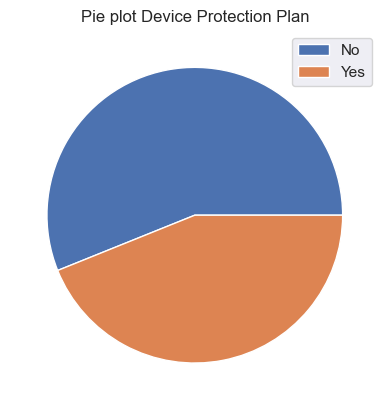

In [78]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Device Protection Plan"].value_counts());
ax.legend(patches, labels=Telecom["Device Protection Plan"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Device Protection Plan")
plt.show();

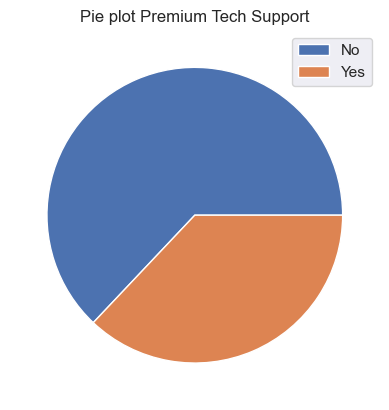

In [79]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Premium Tech Support"].value_counts());
ax.legend(patches, labels=Telecom["Premium Tech Support"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Premium Tech Support")
plt.show();

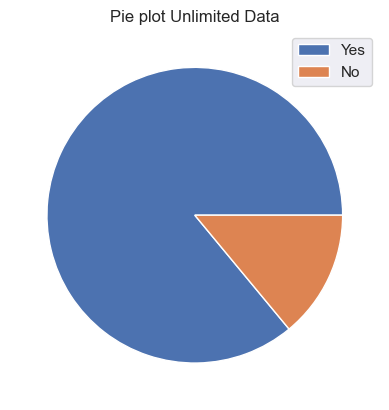

In [80]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Unlimited Data"].value_counts());
ax.legend(patches, labels=Telecom["Unlimited Data"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Unlimited Data")
plt.show();

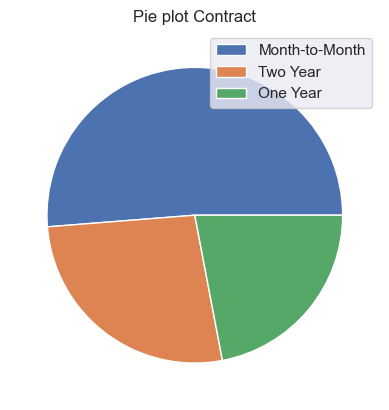

In [81]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Contract"].value_counts());
ax.legend(patches, labels=Telecom["Contract"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Contract")
plt.show();

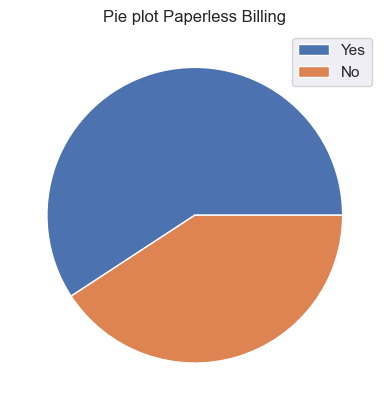

In [82]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Paperless Billing"].value_counts());
ax.legend(patches, labels=Telecom["Paperless Billing"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Paperless Billing")
plt.show();

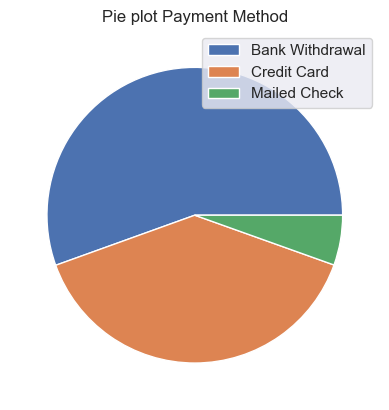

In [83]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Payment Method"].value_counts());
ax.legend(patches, labels=Telecom["Payment Method"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Payment Method")
plt.show();

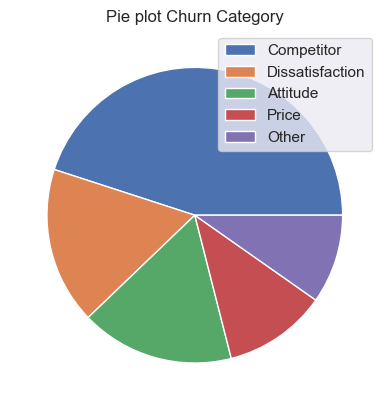

In [84]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Churn Category"].value_counts());
ax.legend(patches, labels=Telecom["Churn Category"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Churn Category")
plt.show();

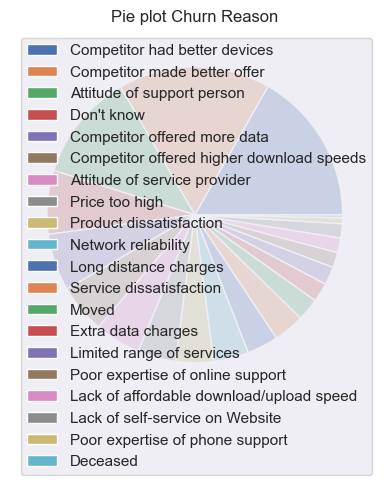

In [85]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Churn Reason"].value_counts());
ax.legend(patches, labels=Telecom["Churn Reason"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Churn Reason")
plt.show();

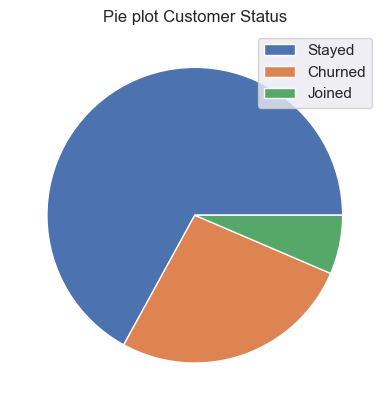

In [86]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Customer Status"].value_counts());
ax.legend(patches, labels=Telecom["Customer Status"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Customer Status")
plt.show();

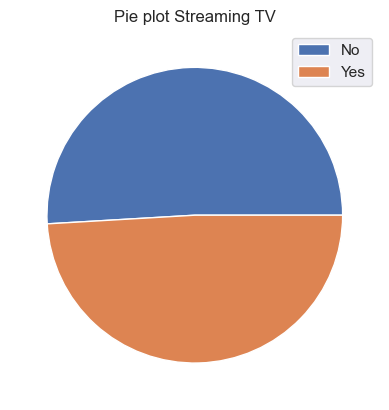

In [87]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Streaming TV"].value_counts());
ax.legend(patches, labels=Telecom["Streaming TV"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Streaming TV")
plt.show();

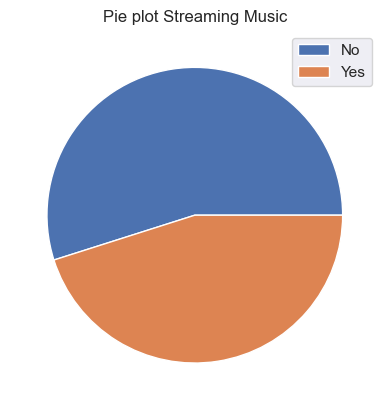

In [88]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Streaming Music"].value_counts());
ax.legend(patches, labels=Telecom["Streaming Music"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Streaming Music")
plt.show();

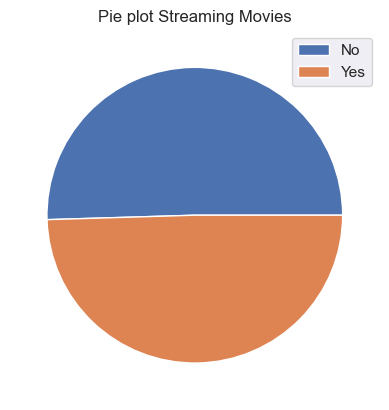

In [89]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Streaming Movies"].value_counts());
ax.legend(patches, labels=Telecom["Streaming Movies"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Streaming Movies")
plt.show();

In [90]:
# v=Telecom.dtypes[Telecom.dtypes=='object'].index
# Telecom[v].value_counts().plot(kind='barh');

In [91]:
# for var in Telecom.dtypes[Telecom.dtypes=='object'].index:
#     print(Telecom[var].value_counts().plot(kind='barh'))

## dades de Age escrites de diferents formes --> discretitzar del tot cada 5 anys

In [92]:
# ajuntar per la dreat / esq / mitat mitat    -------programar be
# def filter_age(age):
#     if age < 23:
#         return 20
#     elif age < 28:
#         return 25
#     elif age < 33:
#         return 30
#     elif age < 38:
#         return 35
#     elif age < 43:
#         return 40
#     elif age < 48:
#         return 45
#     elif age < 53:
#         return 50
#     elif age < 58:
#         return 55
#     elif age < 63:
#         return 60
#     elif age < 68:
#         return 65
#     elif age < 73:
#         return 70
#     elif age < 78:
#         return 75
#     else:
#         return 80
    
def filter_age(age):
    if age%5 <= 2:
        return age - age%5
        
    else:
        return age - age%5 + 5

    

In [93]:
Telecom["Age_disc"] = Telecom["Age"].apply(filter_age)

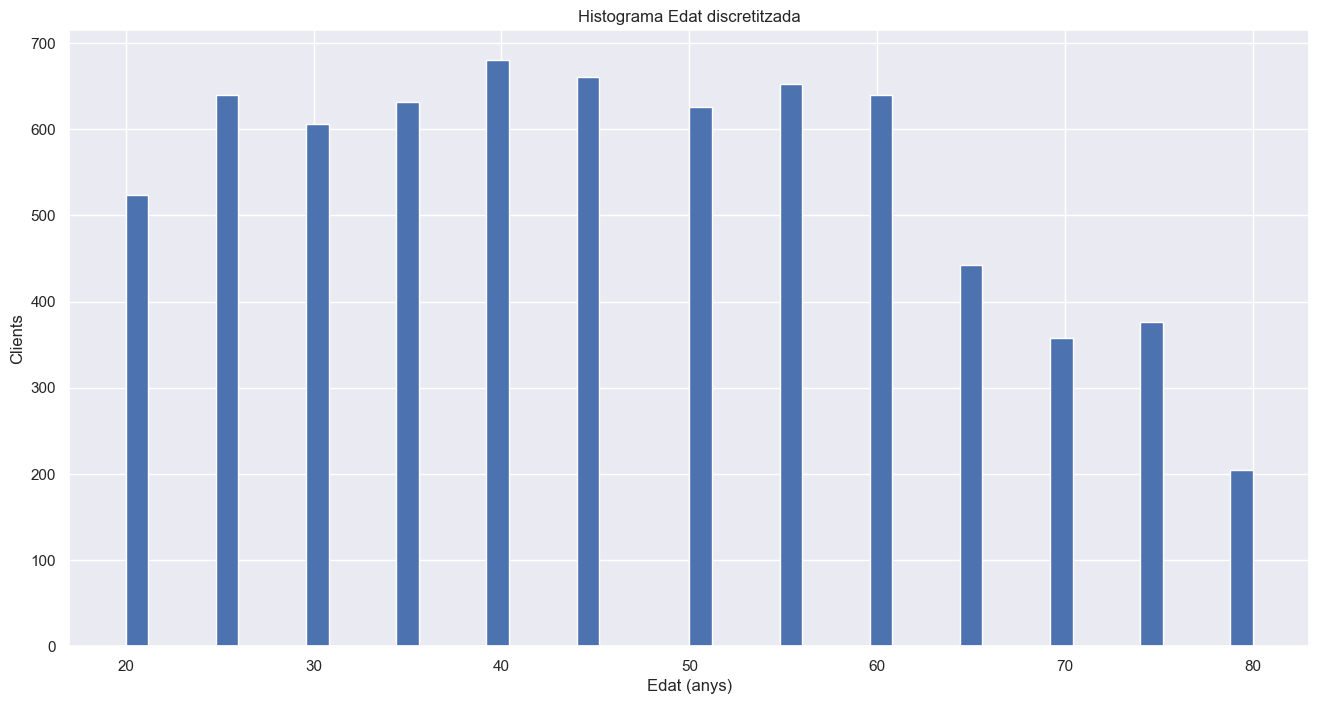

In [94]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("Edat (anys)")
plt.ylabel("Clients")
plt.title("Histograma Edat discretitzada")
Telecom["Age_disc"].hist(ax=axes, bins=50);

In [95]:
Telecom[["Age_disc"]].describe()

Age_disc
count  7043.000
mean     46.531
std      16.846
min      20.000
25%      30.000
50%      45.000
75%      60.000
max      80.000

In [96]:
Telecom = Telecom.drop('Age', axis=1)

In [97]:
Telecom[['Customer Status']].value_counts()

Customer Status
Stayed             4720
Churned            1869
Joined              454
dtype: int64

## Missings

In [98]:
lst_nulls = []
for c in Telecom.columns:
    if Telecom[c].isnull().values.any():
        lst_nulls.append((c, Telecom[c].isnull().values.sum()))
print(lst_nulls)
Telecom.isnull().values.sum()

[('Avg Monthly Long Distance Charges', 682), ('Multiple Lines', 682), ('Internet Type', 1526), ('Avg Monthly GB Download', 1526), ('Online Security', 1526), ('Online Backup', 1526), ('Device Protection Plan', 1526), ('Premium Tech Support', 1526), ('Streaming TV', 1526), ('Streaming Movies', 1526), ('Streaming Music', 1526), ('Unlimited Data', 1526), ('Churn Category', 5174), ('Churn Reason', 5174)]


26972

In [99]:
Telecom.isnull().sum()

Customer ID                             0
Gender                                  0
Married                                 0
Number of Dependents                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Contract                                0
Paperless Billing                 

In [100]:
Telecom[Telecom.isnull().any(axis=1)]

Customer ID  Gender Married  Number of Dependents  Zip Code  \
0     0002-ORFBO  Female     Yes                     0     93225   
1     0003-MKNFE    Male      No                     0     91206   
5     0013-MHZWF  Female      No                     3     95345   
6     0013-SMEOE  Female     Yes                     0     93437   
7     0014-BMAQU    Male     Yes                     0     94558   
...          ...     ...     ...                   ...       ...   
7037  9986-BONCE  Female      No                     0     92028   
7038  9987-LUTYD  Female      No                     0     91941   
7040  9992-UJOEL    Male      No                     0     95432   
7041  9993-LHIEB    Male     Yes                     0     92075   
7042  9995-HOTOH    Male     Yes                     0     96125   

      Number of Referrals  Tenure in Months    Offer Phone Service  \
0                       2                 9     None           Yes   
1                       0                 9     None           Yes   
5                       0                 9  Offer E           Yes   
6                       1                71  Offer A           Yes   
7                       8                63  Offer B           Yes   
...                   ...               ...      ...           ...   
7037                    0                 4     None           Yes   
7038                    0                13  Offer D           Yes   
7040                    0                 2  Offer E           Yes   
7041                    5                67  Offer A           Yes   
7042                    1                63     None            No   

      Avg Monthly Long Distance Charges  ... Monthly Charge Total Charges  \
0                                 42.39  ...          65.60        593.30   
1                                 10.69  ...          -4.00        542.40   
5                                 16.77  ...          69.40        571.45   
6                                  9.96  ...         109.70       7904.25   
7                                 12.96  ...          84.65       5377.80   
...                                 ...  ...            ...           ...   
7037                               2.01  ...          20.95         85.50   
7038                              46.68  ...          55.15        742.90   
7040                              18.62  ...          50.30         92.75   
7041                               2.12  ...          67.85       4627.65   
7042                                NaN  ...          59.00       3707.60   

     Total Refunds  Total Extra Data Charges Total Long Distance Charges  \
0             0.00                         0                      381.51   
1            38.33                        10                       96.21   
5             0.00                         0                      150.93   
6             0.00                         0                      707.16   
7             0.00                        20                      816.48   
...            ...                       ...                         ...   
7037          0.00                         0                        8.04   
7038          0.00                         0                      606.84   
7040          0.00                         0                       37.24   
7041          0.00                         0                      142.04   
7042          0.00                         0                        0.00   

     Total Revenue Customer Status Churn Category  \
0           974.81          Stayed            NaN   
1           610.28          Stayed            NaN   
5           722.38          Stayed            NaN   
6          8611.41          Stayed            NaN   
7          6214.28          Stayed            NaN   
...            ...             ...            ...   
7037         93.54         Churned     Competitor   
7038       1349.74          Stayed            NaN   
7040        129.99          Join

In [101]:
Telecom.columns

Index(['Customer ID', 'Gender', 'Married', 'Number of Dependents', 'Zip Code',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason',
       'Age_disc'],
      dtype='object')

## Avg Monthly Long Distance Charges

In [102]:
Telecom[Telecom['Avg Monthly Long Distance Charges']==0]

Empty DataFrame
Columns: [Customer ID, Gender, Married, Number of Dependents, Zip Code, Number of Referrals, Tenure in Months, Offer, Phone Service, Avg Monthly Long Distance Charges, Multiple Lines, Internet Service, Internet Type, Avg Monthly GB Download, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data, Contract, Paperless Billing, Payment Method, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Customer Status, Churn Category, Churn Reason, Age_disc]
Index: []

[0 rows x 35 columns]

In [103]:
Telecom.loc[Telecom['Phone Service']=='No', 'Avg Monthly Long Distance Charges'].isnull().value_counts()

True    682
Name: Avg Monthly Long Distance Charges, dtype: int64

### tots els NaN de  haurien de Avg Monthly Long Distance Charges ser 0 segons la metadata

In [104]:
Telecom.loc[Telecom['Avg Monthly Long Distance Charges'].isnull(), 'Avg Monthly Long Distance Charges']=0

## Multiple Lines

In [105]:
Telecom[['Multiple Lines']]

Multiple Lines
0                No
1               Yes
2                No
3                No
4                No
...             ...
7038             No
7039            Yes
7040             No
7041             No
7042            NaN

[7043 rows x 1 columns]

In [106]:
#mirar si no te linia
Telecom.loc[Telecom['Phone Service']=='No', 'Multiple Lines'].isnull().value_counts()

True    682
Name: Multiple Lines, dtype: int64

### tots els NA's haurien de ser 'No'

In [107]:
Telecom.loc[Telecom['Multiple Lines'].isnull(), 'Multiple Lines']='No'

In [108]:
#Telecom[Telecom['Multiple Lines']=='No']

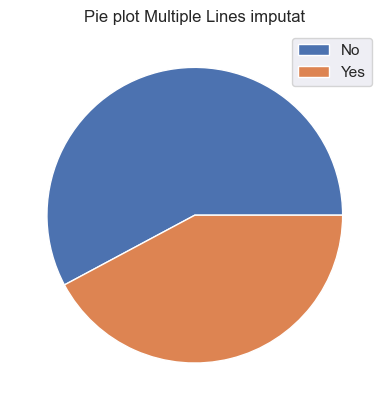

In [109]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Multiple Lines"].value_counts());
ax.legend(patches, labels=Telecom["Multiple Lines"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Multiple Lines imputat")
plt.show();

## Internet Type 

In [110]:
Telecom.loc[Telecom['Internet Service']=='No', 'Internet Type'].isnull().value_counts()

True    1526
Name: Internet Type, dtype: int64

### tots els NA's haurien de ser 'None'

## 

In [111]:
Telecom.loc[Telecom['Internet Type'].isnull(), 'Internet Type']='None'

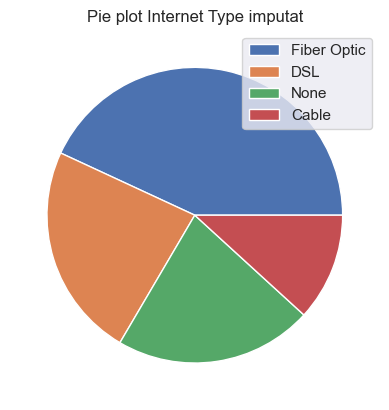

In [112]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Internet Type"].value_counts());
ax.legend(patches, labels=Telecom["Internet Type"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Internet Type imputat")
plt.show();

## 

## Avg Monthly GB Download

In [113]:
Telecom.loc[Telecom['Internet Service']=='No', 'Avg Monthly GB Download'].isnull().value_counts()

True    1526
Name: Avg Monthly GB Download, dtype: int64

In [114]:
Telecom.loc[Telecom['Avg Monthly GB Download'].isnull(), 'Avg Monthly GB Download']=0

## Online Security

In [115]:
Telecom.loc[Telecom['Internet Service']=='No', 'Online Security'].isnull().value_counts()

True    1526
Name: Online Security, dtype: int64

In [116]:
Telecom.loc[Telecom['Online Security'].isnull(), 'Online Security']='No'

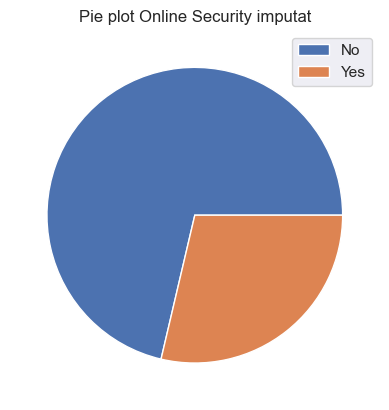

In [117]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Online Security"].value_counts());
ax.legend(patches, labels=Telecom["Online Security"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Online Security imputat")
plt.show();

## Online Backup

In [118]:
Telecom.loc[Telecom['Internet Service']=='No', 'Online Backup'].isnull().value_counts()

True    1526
Name: Online Backup, dtype: int64

In [119]:
Telecom.loc[Telecom['Online Backup'].isnull(), 'Online Backup']='No'

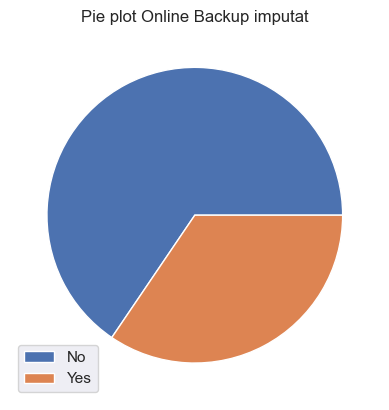

In [120]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Online Backup"].value_counts());
ax.legend(patches, labels=Telecom["Online Backup"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Online Backup imputat")
plt.show();

## Device Protection Plan

In [121]:
Telecom.loc[Telecom['Internet Service']=='No', 'Device Protection Plan'].isnull().value_counts()

True    1526
Name: Device Protection Plan, dtype: int64

In [122]:
Telecom.loc[Telecom['Device Protection Plan'].isnull(), 'Device Protection Plan']='No'

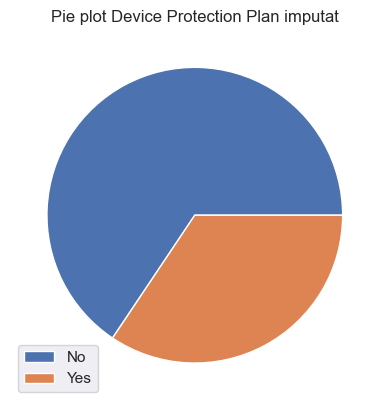

In [123]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Device Protection Plan"].value_counts());
ax.legend(patches, labels=Telecom["Device Protection Plan"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Device Protection Plan imputat")
plt.show();

## Premium Tech Support

In [124]:
Telecom.loc[Telecom['Internet Service']=='No', 'Premium Tech Support'].isnull().value_counts()

True    1526
Name: Premium Tech Support, dtype: int64

In [125]:
Telecom.loc[Telecom['Premium Tech Support'].isnull(), 'Premium Tech Support']='No'

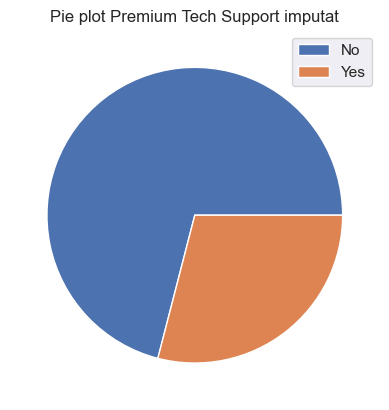

In [126]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Premium Tech Support"].value_counts());
ax.legend(patches, labels=Telecom["Premium Tech Support"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Premium Tech Support imputat")
plt.show();

## Streaming TV

In [127]:
Telecom.loc[Telecom['Internet Service']=='No', 'Streaming TV'].isnull().value_counts()

True    1526
Name: Streaming TV, dtype: int64

In [128]:
Telecom.loc[Telecom['Streaming TV'].isnull(), 'Streaming TV']='No'

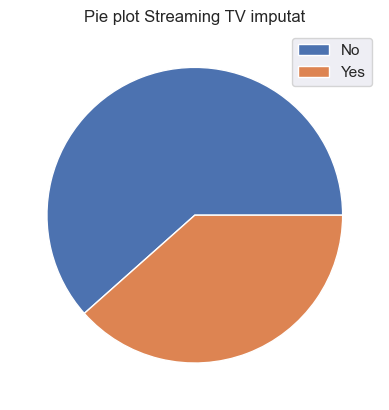

In [129]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Streaming TV"].value_counts());
ax.legend(patches, labels=Telecom["Streaming TV"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Streaming TV imputat")
plt.show();

## Streaming Movies

In [130]:
Telecom.loc[Telecom['Internet Service']=='No', 'Streaming Movies'].isnull().value_counts()

True    1526
Name: Streaming Movies, dtype: int64

In [131]:
Telecom.loc[Telecom['Streaming Movies'].isnull(), 'Streaming Movies']='No'

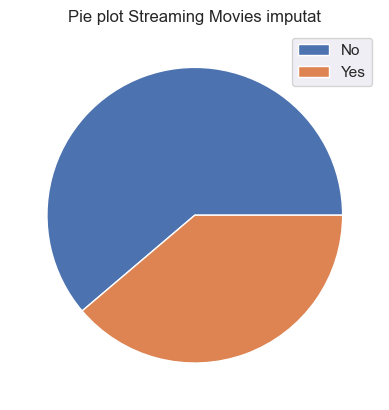

In [132]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Streaming Movies"].value_counts());
ax.legend(patches, labels=Telecom["Streaming Movies"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Streaming Movies imputat")
plt.show();

## Streaming Music

In [133]:
Telecom.loc[Telecom['Internet Service']=='No', 'Streaming Music'].isnull().value_counts()

True    1526
Name: Streaming Music, dtype: int64

In [134]:
Telecom.loc[Telecom['Streaming Music'].isnull(), 'Streaming Music']='No'

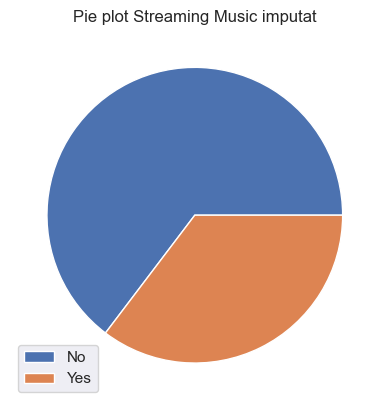

In [135]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Streaming Music"].value_counts());
ax.legend(patches, labels=Telecom["Streaming Music"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Streaming Music imputat")
plt.show();

## Unlimited Data

In [136]:
Telecom.loc[Telecom['Internet Service']=='No', 'Unlimited Data'].isnull().value_counts()

True    1526
Name: Unlimited Data, dtype: int64

In [137]:
Telecom.loc[Telecom['Unlimited Data'].isnull(), 'Unlimited Data']='No'

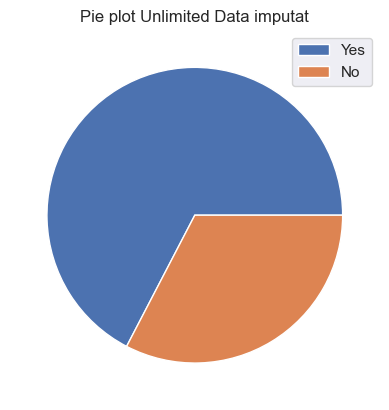

In [138]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Unlimited Data"].value_counts());
ax.legend(patches, labels=Telecom["Unlimited Data"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Unlimited Data imputat")
plt.show();

## Churn Category

In [139]:
Telecom[['Customer Status']].value_counts()

Customer Status
Stayed             4720
Churned            1869
Joined              454
dtype: int64

In [140]:
Telecom.loc[Telecom['Customer Status']!='Churned', 'Churn Category'].isnull().value_counts()

True    5174
Name: Churn Category, dtype: int64

In [141]:
Telecom.loc[Telecom['Customer Status']=='Joined' , 'Churn Category'].isnull().value_counts()

True    454
Name: Churn Category, dtype: int64

In [142]:
Telecom.loc[Telecom['Customer Status']=='Stayed', 'Churn Category'].isnull().value_counts()

True    4720
Name: Churn Category, dtype: int64

## Churn Reason

In [143]:
Telecom.loc[Telecom['Customer Status']!='Churned', 'Churn Reason'].isnull().value_counts()

True    5174
Name: Churn Reason, dtype: int64

# Final missings

In [144]:
lst_nulls = []
for c in Telecom.columns:
    if Telecom[c].isnull().values.any():
        lst_nulls.append((c, Telecom[c].isnull().values.sum()))
print(lst_nulls)
Telecom.isnull().values.sum()

[('Churn Category', 5174), ('Churn Reason', 5174)]


10348

# Monthly Charges negatiu

In [145]:
Telecom.describe()

Number of Dependents   Zip Code  Number of Referrals  Tenure in Months  \
count              7043.000   7043.000             7043.000          7043.000   
mean                  0.469  93486.071                1.952            32.387   
std                   0.963   1856.768                3.001            24.542   
min                   0.000  90001.000                0.000             1.000   
25%                   0.000  92101.000                0.000             9.000   
50%                   0.000  93518.000                0.000            29.000   
75%                   0.000  95329.000                3.000            55.000   
max                   9.000  96150.000               11.000            72.000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                           7043.000                 7043.000   
mean                              22.959                   20.515   
std                               15.448                   20.419   
min                                0.000                    0.000   
25%                                9.210                    3.000   
50%                               22.890                   17.000   
75%                               36.395                   27.000   
max                               49.990                   85.000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count        7043.000       7043.000       7043.000                  7043.000   
mean           63.596       2280.381          1.962                     6.861   
std            31.205       2266.220          7.903                    25.105   
min           -10.000         18.800          0.000                     0.000   
25%            30.400        400.150          0.000                     0.000   
50%            70.050       1394.550          0.000                     0.000   
75%            89.750       3786.600          0.000                     0.000   
max           118.750       8684.800         49.790                   150.000   

       Total Long Distance Charges  Total Revenue  Age_disc  
count                     7043.000       7043.000  7043.000  
mean                       749.099       3034.379    46.531  
std                        846.660       2865.205    16.846  
min                          0.000         21.360    20.000  
25%                         70.545        605.610    30.000  
50%                        401.440       2108.640    45.000  
75%                       1191.100       4801.145    60.000  
max                       3564.720      11979.340    80.000

In [146]:
Telecom[['Monthly Charge']].describe()

Monthly Charge
count        7043.000
mean           63.596
std            31.205
min           -10.000
25%            30.400
50%            70.050
75%            89.750
max           118.750

In [147]:
Telecom[Telecom['Monthly Charge']<0]

Customer ID  Gender Married  Number of Dependents  Zip Code  \
1     0003-MKNFE    Male      No                     0     91206   
32    0052-DCKON    Male     Yes                     0     90063   
170   0274-JKUJR    Male     Yes                     2     90040   
232   0361-HJRDX  Female      No                     0     91403   
336   0495-ZBNGW    Male     Yes                     0     94021   
...          ...     ...     ...                   ...       ...   
6894  9793-WECQC    Male      No                     0     95631   
6918  9821-BESNZ    Male      No                     0     91325   
6976  9898-KZQDZ  Female     Yes                     0     93541   
7020  9961-JBNMK    Male      No                     0     92239   
7027  9971-ZWPBF    Male     Yes                     1     94563   

      Number of Referrals  Tenure in Months    Offer Phone Service  \
1                       0                 9     None           Yes   
32                      9                66     None           Yes   
170                     9                 7  Offer E            No   
232                     0                68  Offer A            No   
336                     1                 5     None           Yes   
...                   ...               ...      ...           ...   
6894                    0                23     None           Yes   
6918                    0                66  Offer A           Yes   
6976                    1                40     None           Yes   
7020                    0                21     None           Yes   
7027                    7                34     None           Yes   

      Avg Monthly Long Distance Charges  ... Monthly Charge Total Charges  \
1                                 10.69  ...           -4.0        542.40   
32                                43.77  ...           -2.0       7942.15   
170                                0.00  ...           -3.0        465.70   
232                                0.00  ...           -8.0       4539.60   
336                                6.66  ...           -1.0        343.95   
...                                 ...  ...            ...           ...   
6894                              48.21  ...           -1.0       2192.90   
6918                              33.02  ...           -7.0       6860.60   
6976                              49.50  ...           -1.0       3640.45   
7020                              42.27  ...           -1.0       2030.30   
7027                              11.74  ...           -9.0       3625.20   

     Total Refunds  Total Extra Data Charges Total Long Distance Charges  \
1            38.33                        10                       96.21   
32            0.00                         0                     2888.82   
170           0.00                         0                        0.00   
232           0.00                       130                        0.00   
336           0.00                        20                       33.30   
...            ...                       ...                         ...   
6894          0.00                         0                     1108.83   
6918         44.00                         0                     2179.32   
6976          0.00                         0                     1980.00   
7020         10.20                         0                      887.67   
7027          0.00                        30                      399.16   

     Total Revenue Customer Status   Churn Category  \
1           610.28          Stayed              NaN   
32        10830.97          Stayed              NaN   
170         465.70          Stayed              NaN   
232        4669.60          Stayed              NaN   
336         397.25         Churned       Competitor   
...            ...             ...              ...   
6894       3301.73          Stayed              NaN   
6918       8995.92          Stayed              NaN   
6976       562

In [148]:
Telecom[Telecom['Monthly Charge']<0].describe()

Number of Dependents   Zip Code  Number of Referrals  Tenure in Months  \
count               120.000    120.000              120.000           120.000   
mean                  0.475  93139.808                2.017            29.767   
std                   1.012   1886.500                3.218            24.644   
min                   0.000  90002.000                0.000             1.000   
25%                   0.000  91709.750                0.000             7.000   
50%                   0.000  92883.500                0.000            22.500   
75%                   0.000  94624.000                2.250            54.000   
max                   4.000  96141.000               11.000            72.000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                            120.000                  120.000   
mean                              23.313                   20.383   
std                               15.190                   20.166   
min                                0.000                    0.000   
25%                               11.950                    5.000   
50%                               22.260                   16.500   
75%                               36.522                   27.000   
max                               49.810                   85.000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count         120.000        120.000        120.000                   120.000   
mean           -5.417       2028.856          3.177                     6.250   
std             2.889       2120.436          9.855                    24.082   
min           -10.000         19.400          0.000                     0.000   
25%            -8.000        343.025          0.000                     0.000   
50%            -5.000       1325.975          0.000                     0.000   
75%            -3.000       3239.512          0.000                     0.000   
max            -1.000       7942.150         49.240                   140.000   

       Total Long Distance Charges  Total Revenue  Age_disc  
count                      120.000        120.000   120.000  
mean                       695.349       2727.278    47.875  
std                        801.869       2719.182    17.170  
min                          0.000         22.540    20.000  
25%                         48.190        460.800    35.000  
50%                        436.720       1920.660    45.000  
75%                        932.580       4410.295    60.000  
max                       3211.920      10830.970    80.000

In [149]:
Telecom['Average Monthly Charges'] = Telecom['Total Charges']/Telecom['Tenure in Months']

In [150]:
Telecom[['Average Monthly Charges']].describe()

Average Monthly Charges
count                 7043.000
mean                    64.763
std                     30.190
min                     13.775
25%                     35.935
50%                     70.338
75%                     90.174
max                    121.400

In [151]:
Telecom['aux'] = abs(Telecom['Average Monthly Charges']-Telecom['Monthly Charge'])
Telecom.loc[Telecom['Monthly Charge']>0, 'aux'].describe()

count    6923.000
mean        1.740
std         1.941
min         0.000
25%         0.423
50%         1.153
75%         2.400
max        19.125
Name: aux, dtype: float64

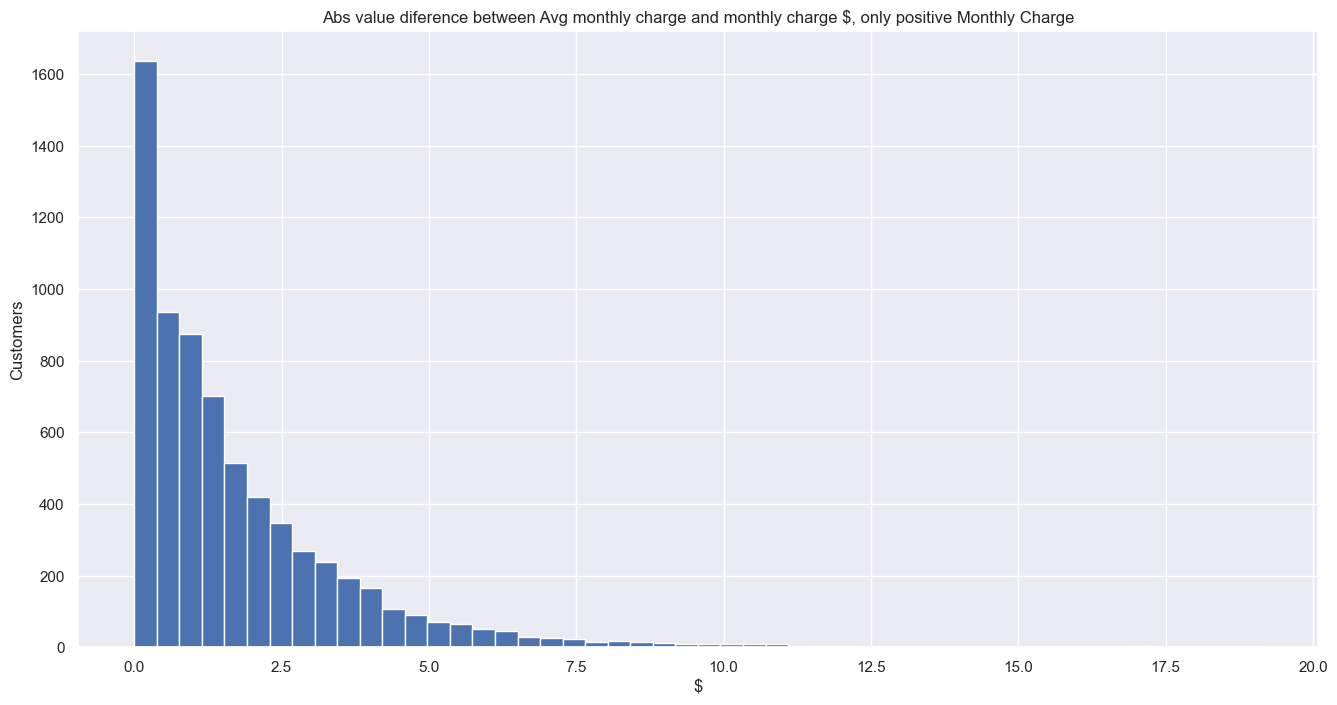

In [152]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("$")
plt.ylabel("Customers")
plt.title("Abs value diference between Avg monthly charge and monthly charge $, only positive Monthly Charge")
Telecom.loc[Telecom['Monthly Charge']>0, 'aux'].hist(ax=axes, bins=50);

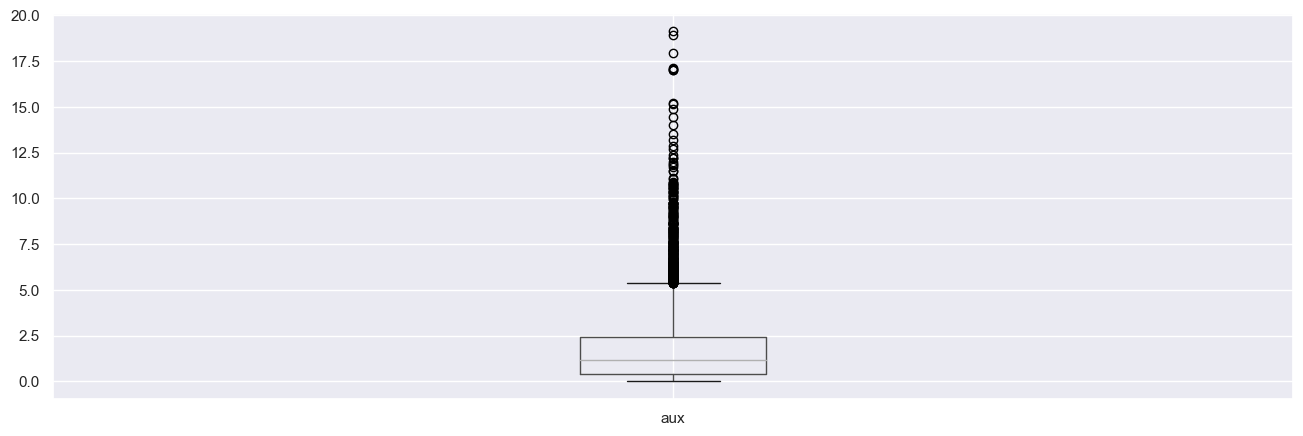

In [153]:
Telecom[Telecom['Monthly Charge']>0].boxplot(column="aux", figsize=(16, 5));

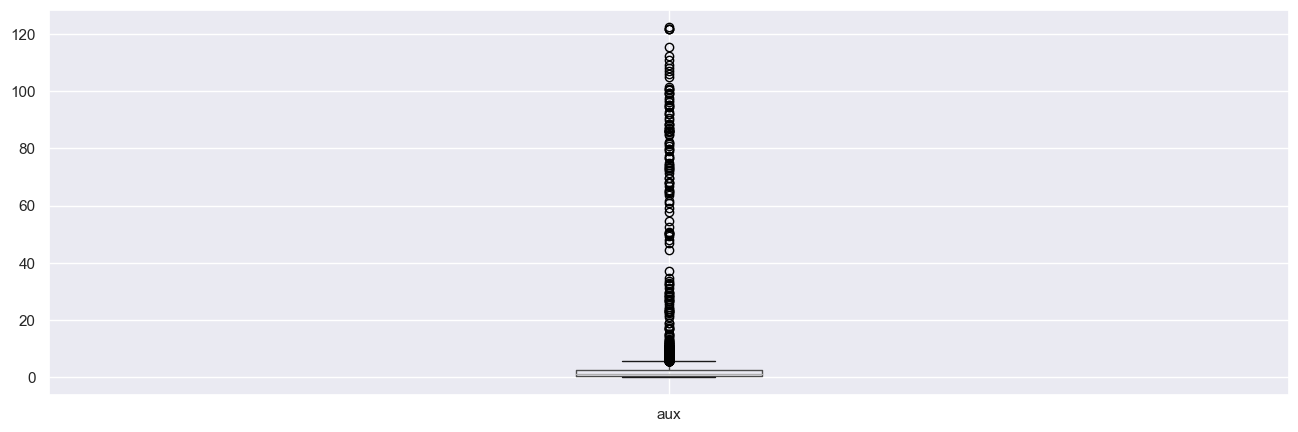

In [154]:
# les diferencies mes grans son les dels que s ha d imputar
Telecom.boxplot(column="aux", figsize=(16, 5));

In [155]:
# utilitzem el ID per localitzar el valor per imputar
# lst_ID = []


for cust in Telecom.loc[Telecom['Monthly Charge'] <= 0, 'Customer ID']:
    # lst_ID.append(cust)
    Telecom.loc[Telecom['Customer ID'] == cust, 'Monthly Charge'] = float(Telecom.loc[Telecom['Customer ID'] == cust, 'Average Monthly Charges'])


In [156]:
Telecom[['Monthly Charge']].describe()

Monthly Charge
count        7043.000
mean           64.761
std            30.095
min            16.750
25%            35.500
50%            70.300
75%            89.850
max           120.336

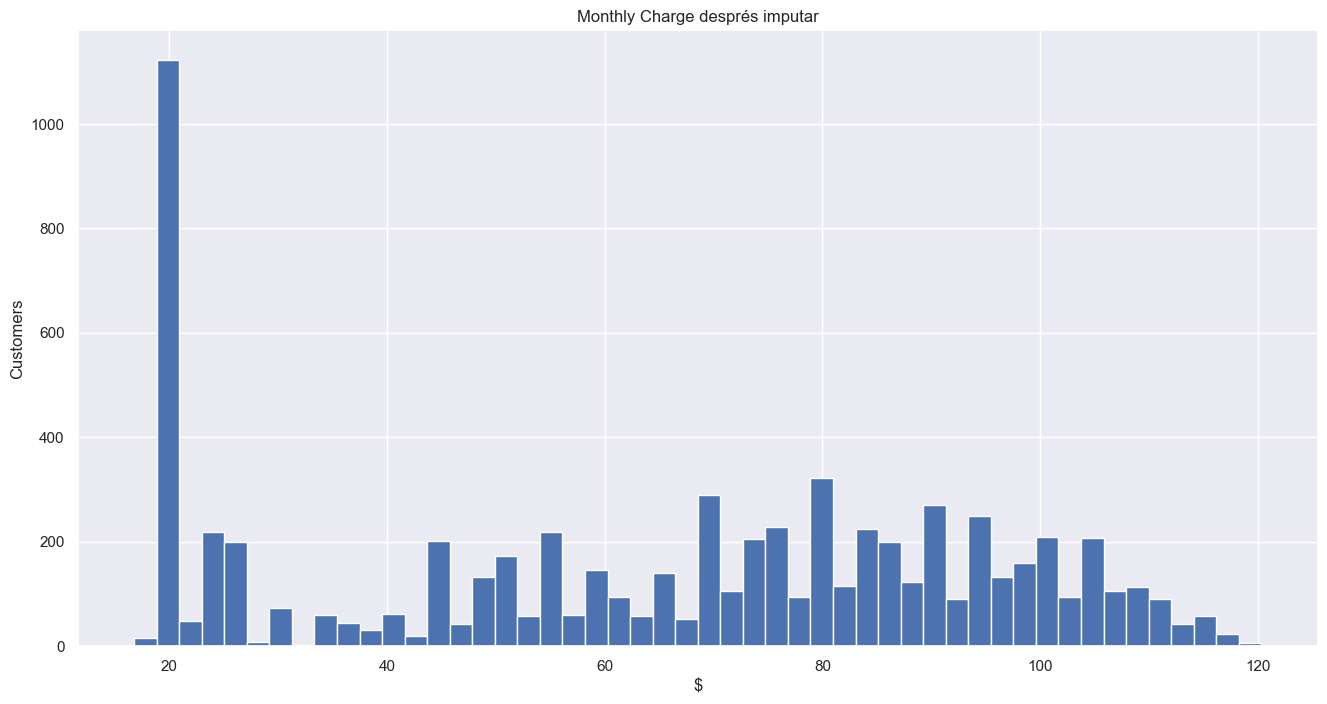

In [157]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("$")
plt.ylabel("Customers")
plt.title("Monthly Charge després imputar")
Telecom['Monthly Charge'].hist(ax=axes, bins=50);

In [158]:
Telecom = Telecom.drop('aux', axis=1)
Telecom = Telecom.drop('Average Monthly Charges', axis=1)
Telecom = Telecom.drop('Customer ID', axis=1)

# Premium + Streaming

## CHI2 pre

In [159]:
TX2 = Telecom[Telecom['Customer Status']!= 'Joined']
cat_columns = Telecom.dtypes[Telecom.dtypes=='object'].index

In [160]:
dcx2 = {}
dcx2_2 = {}
for var in cat_columns:
    # taula de contingencia
    data_crosstab = pd.crosstab(TX2['Customer Status'], 
                                TX2[var],
                                    margins = False)
    # chi2 test
    stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
    dcx2[var] = p
    dcx2_2[var] = stats.chi2_contingency(data_crosstab)
for item in dcx2.items():
    print(f"{item}")

('Gender', 0.6241548018547587)
('Married', 7.014602453362894e-50)
('Offer', 2.156619385424327e-151)
('Phone Service', 0.26256666476273127)
('Multiple Lines', 0.2827973969037025)
('Internet Service', 1.0989384522210119e-73)
('Internet Type', 1.1920217112560258e-127)
('Online Security', 5.689634112881984e-56)
('Online Backup', 1.247916969909602e-17)
('Device Protection Plan', 5.150260816086029e-14)
('Premium Tech Support', 2.580290732051722e-52)
('Streaming TV', 0.0009090824655569003)
('Streaming Movies', 0.0016874706537395585)
('Streaming Music', 0.03869200784160805)
('Unlimited Data', 4.315532380194401e-38)
('Contract', 0.0)
('Paperless Billing', 3.112345421939546e-52)
('Payment Method', 1.556101524987297e-70)
('Customer Status', 0.0)
('Churn Category', 1.0)
('Churn Reason', 1.0)


# Motiu ajuntar var

## Streaming

In [161]:
# separem entre Churned i Stayed
Churned = Telecom[Telecom['Customer Status']=='Churned']
# Joined = Telecom[Telecom['Customer Status']=='Joined']
Stayed = Telecom[Telecom['Customer Status']=='Stayed']

In [162]:
# X = ['Churned','Stayed']
# Y_TV = [Churned["Streaming TV"].value_counts(), Stayed["Streaming TV"].value_counts()]
# Z_Music = [Churned["Streaming Music"].value_counts(), Stayed["Streaming Music"].value_counts()]
# K_Movies = [Churned["Streaming Movies"].value_counts(), Stayed["Streaming Movies"].value_counts()]

# # print(Y_TV)
# # print(Z_Music)
# # print(K_Movies)


  
# X_axis = np.arange(len(X))
  
# plt.bar(X_axis - 0.2, Y_TV, width=0.2, label = 'TV', color = 'g')
# plt.bar(X_axis, Z_Music, width=0.2, label = 'Music', color = 'r')
# plt.bar(X_axis + 0.2, K_Movies, width=0.2, label = 'Movies', color = 'b')
  
# plt.xticks(X_axis, X)
# plt.xlabel("State")
# plt.ylabel("Number of Customers")
# plt.title("Number of Customers in each State and Streaming")
# plt.legend()
# plt.show()

### coeficients de correlació de Matthew

In [163]:
from sklearn.metrics import matthews_corrcoef

In [164]:
Telecom['Streaming TV'].value_counts()

No     4336
Yes    2707
Name: Streaming TV, dtype: int64

In [165]:
Telecom['Streaming Music'].value_counts()

No     4555
Yes    2488
Name: Streaming Music, dtype: int64

In [166]:
Telecom['Streaming Movies'].value_counts()

No     4311
Yes    2732
Name: Streaming Movies, dtype: int64

In [167]:
#define array of actual classes
actual = np.repeat([1, 0], repeats=[2707, 4336])

#define array of predicted classes
pred = np.repeat([1, 0], repeats=[2488, 4555])

#calculate Matthews correlation coefficient
matthews_corrcoef(actual, pred)

0.935365842177986

In [168]:
# chi2

'Streaming TV', 'Streaming Music', 'Streaming Movies'

In [169]:
# taula de contingencia
data_crosstab = pd.crosstab(Telecom['Streaming TV'], 
                                Telecom['Streaming Music'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Streaming Music    No   Yes
Streaming TV               
No               3550   786
Yes              1005  1702

0.0

In [170]:
# taula de contingencia
data_crosstab = pd.crosstab(Telecom['Streaming TV'], 
                                Telecom['Streaming Movies'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Streaming Movies    No   Yes
Streaming TV                
No                3544   792
Yes                767  1940

0.0

In [171]:
# taula de contingencia
data_crosstab = pd.crosstab(Telecom['Streaming Movies'], 
                                Telecom['Streaming Music'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Streaming Music     No   Yes
Streaming Movies            
No                4180   131
Yes                375  2357

0.0

## Premium

In [172]:
# chi2 Premium

In [173]:
# taula de contingencia
data_crosstab = pd.crosstab(Telecom['Internet Service'], 
                                Telecom['Internet Type'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Internet Type     Cable   DSL  Fiber Optic  None
Internet Service                                
No                    0     0            0  1526
Yes                 830  1652         3035     0

0.0

Si deixem internet type (cosa que si fem) alguna cosa hem de fer amb internet service

In [174]:
# taula de contingencia
data_crosstab = pd.crosstab(Telecom['Internet Service'], 
                                Telecom['Internet Type'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Internet Type     Cable   DSL  Fiber Optic  None
Internet Service                                
No                    0     0            0  1526
Yes                 830  1652         3035     0

0.0

In [175]:
# taula de contingencia
data_crosstab = pd.crosstab(Telecom['Internet Service'], 
                                Telecom['Phone Service'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Phone Service      No   Yes
Internet Service           
No                  0  1526
Yes               682  4835

4.932837752834669e-47

In [176]:
# taula de contingencia
data_crosstab = pd.crosstab(Telecom['Internet Service'], 
                                Telecom['Premium Tech Support'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Premium Tech Support    No   Yes
Internet Service                
No                    1526     0
Yes                   3473  2044

7.505724469196977e-175

In [177]:
# taula de contingencia
data_crosstab = pd.crosstab(Telecom['Online Backup'], 
                                Telecom['Premium Tech Support'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Premium Tech Support    No   Yes
Online Backup                   
No                    3722   892
Yes                   1277  1152

2.5303596290852377e-134

In [178]:
# taula de contingencia
data_crosstab = pd.crosstab(Telecom['Device Protection Plan'], 
                                Telecom['Premium Tech Support'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Premium Tech Support      No   Yes
Device Protection Plan            
No                      3786   835
Yes                     1213  1209

7.621515419329399e-172

In [179]:
# taula de contingencia
data_crosstab = pd.crosstab(Telecom['Internet Service'], 
                                Telecom['Online Backup'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Online Backup       No   Yes
Internet Service            
No                1526     0
Yes               3088  2429

1.3269343224680267e-224

In [180]:
# taula de contingencia
data_crosstab = pd.crosstab(Telecom['Internet Service'], 
                                Telecom['Device Protection Plan'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Device Protection Plan    No   Yes
Internet Service                  
No                      1526     0
Yes                     3095  2422

1.2627400726530029e-223

In [181]:
# taula de contingencia
data_crosstab = pd.crosstab(Telecom['Device Protection Plan'], 
                                Telecom['Online Backup'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Online Backup             No   Yes
Device Protection Plan            
No                      3510  1111
Yes                     1104  1318

7.429733099875319e-143

In [182]:
# taula de contingencia
data_crosstab = pd.crosstab(Telecom['Phone Service'], 
                                Telecom['Multiple Lines'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Multiple Lines    No   Yes
Phone Service             
No               682     0
Yes             3390  2971

2.0405345447742087e-121

In [183]:
# taula de contingencia
data_crosstab = pd.crosstab(Telecom['Paperless Billing'], 
                                Telecom['Payment Method'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Payment Method     Bank Withdrawal  Credit Card  Mailed Check
Paperless Billing                                            
No                            1276         1391           205
Yes                           2633         1358           180

3.2178990536345246e-53

In [184]:
# taula de contingencia
data_crosstab = pd.crosstab(Telecom['Gender'], 
                                Telecom['Married'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Married    No   Yes
Gender             
Female   1800  1688
Male     1841  1714

0.8982341127357725

In [185]:
# taula de contingencia
data_crosstab = pd.crosstab(Telecom['Gender'], 
                                Telecom['Customer Status'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Customer Status  Churned  Joined  Stayed
Gender                                  
Female               939     211    2338
Male                 930     243    2382

0.35490117109455394

In [186]:
Telecom.columns

Index(['Gender', 'Married', 'Number of Dependents', 'Zip Code',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason',
       'Age_disc'],
      dtype='object')

# mod var

In [187]:
def ajuntar_binaries_filter(bb):
    if bb == 'Yes':
        return 1
    else:
        return 0

def ajuntar_binaries(df, new_var, lst_var_bin):
    df = df.copy()  # de moment fem copies
    
    df[new_var] = 0  # inicialitzem la nova variable a 0
    
    for var_bin in lst_var_bin:  # per cada variable de les que considerem
        
        # crear variables auxiliars
        new_var_bin = var_bin + " int"
        df[new_var_bin] = df[var_bin].apply(ajuntar_binaries_filter)
        
        df[new_var] += df[new_var_bin]  # modifiquem la variable nova
        
        df = df.drop(new_var_bin, axis=1)  # tirar les variables auxiliars
        
        
    return df  # al fer una copia hem de retornar el modificat
        
        


In [188]:
serveis_streaming = ['Streaming TV', 'Streaming Movies', 'Streaming Music']

In [189]:
Telecom = ajuntar_binaries(Telecom, 'Total Streaming', serveis_streaming)

In [190]:
Telecom[['Total Streaming','Streaming Music','Streaming Movies', 'Streaming TV']]

Total Streaming Streaming Music Streaming Movies Streaming TV
0                   1              No               No          Yes
1                   2             Yes              Yes           No
2                   0              No               No           No
3                   2              No              Yes          Yes
4                   1              No               No          Yes
...               ...             ...              ...          ...
7038                1             Yes               No           No
7039                2             Yes              Yes           No
7040                0              No               No           No
7041                2             Yes              Yes           No
7042                3             Yes              Yes          Yes

[7043 rows x 4 columns]

In [191]:
Telecom[['Premium Tech Support', 'Multiple Lines', 'Online Backup', 'Device Protection Plan', 'Online Security', 'Unlimited Data']]

Premium Tech Support Multiple Lines Online Backup Device Protection Plan  \
0                     Yes             No           Yes                     No   
1                      No            Yes            No                     No   
2                      No             No            No                    Yes   
3                      No             No           Yes                    Yes   
4                     Yes             No            No                     No   
...                   ...            ...           ...                    ...   
7038                  Yes             No            No                     No   
7039                   No            Yes            No                     No   
7040                   No             No           Yes                     No   
7041                  Yes             No            No                    Yes   
7042                   No             No           Yes                    Yes   

     Online Security Unlimited Data  
0                 No            Yes  
1                 No             No  
2                 No            Yes  
3                 No            Yes  
4                 No            Yes  
...              ...            ...  
7038             Yes            Yes  
7039              No            Yes  
7040              No            Yes  
7041             Yes            Yes  
7042             Yes            Yes  

[7043 rows x 6 columns]

In [192]:
serveis_premium = ['Premium Tech Support', 'Multiple Lines', 'Online Backup', 'Device Protection Plan', 'Online Security', 'Unlimited Data']
Telecom = ajuntar_binaries(Telecom, 'Premium Services', serveis_premium)

In [193]:
Telecom

Gender Married  Number of Dependents  Zip Code  Number of Referrals  \
0     Female     Yes                     0     93225                    2   
1       Male      No                     0     91206                    0   
2       Male      No                     0     92627                    0   
3       Male     Yes                     0     94553                    1   
4     Female     Yes                     0     93010                    3   
...      ...     ...                   ...       ...                  ...   
7038  Female      No                     0     91941                    0   
7039    Male     Yes                     0     95367                    1   
7040    Male      No                     0     95432                    0   
7041    Male     Yes                     0     92075                    5   
7042    Male     Yes                     0     96125                    1   

      Tenure in Months    Offer Phone Service  \
0                    9     None           Yes   
1                    9     None           Yes   
2                    4  Offer E           Yes   
3                   13  Offer D           Yes   
4                    3     None           Yes   
...                ...      ...           ...   
7038                13  Offer D           Yes   
7039                22  Offer D           Yes   
7040                 2  Offer E           Yes   
7041                67  Offer A           Yes   
7042                63     None            No   

      Avg Monthly Long Distance Charges Multiple Lines  ... Total Refunds  \
0                                 42.39             No  ...          0.00   
1                                 10.69            Yes  ...         38.33   
2                                 33.65             No  ...          0.00   
3                                 27.82             No  ...          0.00   
4                                  7.38             No  ...          0.00   
...                                 ...            ...  ...           ...   
7038                              46.68             No  ...          0.00   
7039                              16.20            Yes  ...          0.00   
7040                              18.62             No  ...          0.00   
7041                               2.12             No  ...          0.00   
7042                               0.00             No  ...          0.00   

     Total Extra Data Charges  Total Long Distance Charges Total Revenue  \
0                           0                       381.51        974.81   
1                          10                        96.21        610.28   
2                           0                       134.60        415.45   
3                           0                       361.66       1599.51   
4                           0                        22.14        289.54   
...                       ...                          ...           ...   
7038                        0                       606.84       1349.74   
7039                        0                       356.40       2230.10   
7040                        0                        37.24        129.99   
7041                        0                       142.04       4769.69   
7042                        0                         0.00       3707.60   

     Customer Status   Churn Category                   Churn Reason Age_disc  \
0             Stayed              NaN                            NaN       35   
1             Stayed              NaN                            NaN       45   
2            Churned       Competitor  Competitor had better devices       50   
3            Churned  Dissatisfaction        Product dissatisfaction       80   
4            Churned  Dissatisfaction            Network reliability       75   
...              ...              ...                            ...      ...   
7038          Stayed              NaN                            NaN       20   
7039  

In [194]:
def borrar_var(df, lst):
    df.copy()
    for var in lst:
        df = df.drop(var, axis=1)
    return df

In [195]:
# drop variables ajuntades + Internet Service (la info ja esta en Internet Type)
mod_tirar = serveis_streaming + serveis_premium + ['Internet Service']
Telecom = borrar_var(Telecom, mod_tirar)

In [196]:
Telecom.columns

Index(['Gender', 'Married', 'Number of Dependents', 'Zip Code',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Internet Type',
       'Avg Monthly GB Download', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason',
       'Age_disc', 'Total Streaming', 'Premium Services'],
      dtype='object')

# Riscos i Biaixos

In [197]:
Telecom.dtypes

Gender                                object
Married                               object
Number of Dependents                   int64
Zip Code                               int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Internet Type                         object
Avg Monthly GB Download              float64
Contract                              object
Paperless Billing                     object
Payment Method                        object
Monthly Charge                       float64
Total Charges                        float64
Total Refunds                        float64
Total Extra Data Charges               int64
Total Long Distance Charges          float64
Total Revenue                        float64
Customer Status                       object
Churn Category                        object
Churn Reas

In [198]:
# Gender
# Age
# Married
# Number of Dependents
# City
# Number of Referrals
# Contract
# Paperless Billing / Payment Method
# Churn Category / Churn Reason

In [199]:
Telecom['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [200]:
# taula de contingencia
data_crosstab = pd.crosstab(Telecom['Gender'], 
                                Telecom['Customer Status'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Customer Status  Churned  Joined  Stayed
Gender                                  
Female               939     211    2338
Male                 930     243    2382

0.35490117109455394

Eliminem Gender ja que es distribueix independentment de la variable resposta

In [201]:
Telecom = Telecom.drop('Gender', axis=1)

In [202]:
Telecom['Churn Category'].value_counts()

Competitor         841
Dissatisfaction    321
Attitude           314
Price              211
Other              182
Name: Churn Category, dtype: int64

In [203]:
Telecom['Churn Reason'].value_counts()

Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: Churn Reason, 

In [204]:
Telecom.loc[Telecom['Churn Category']=='Other', 'Churn Reason'].value_counts()

Don't know    130
Moved          46
Deceased        6
Name: Churn Reason, dtype: int64

# Recode

## Recode Zip Code

Also, zip codes are hierarchical... if you take the first two or three digits, and binarize based on those, you have some amount of regional information, which gets you more data than individual zips.

In [205]:
Telecom[['Zip Code']].describe()

Zip Code
count   7043.000
mean   93486.071
std     1856.768
min    90001.000
25%    92101.000
50%    93518.000
75%    95329.000
max    96150.000

In [206]:
def mod_zip_code2(z):
    p=3  # potencia (5 - 2 (digits Zip Code original - digits que ens volem quedar))
    z2 = z//(10**p)
    return z2

In [207]:
def mod_zip_code3(z):
    p=2  # potencia (5 - 3 (digits Zip Code original - digits que ens volem quedar))
    z2 = z//(10**p)
    return z2

In [208]:
Telecom["Zip Code 2"] = Telecom['Zip Code'].apply(mod_zip_code2)

In [209]:
Telecom["Zip Code 3"] = Telecom['Zip Code'].apply(mod_zip_code3)

In [210]:
Telecom[["Zip Code 2"]].describe()

Zip Code 2
count    7043.000
mean       93.060
std         1.825
min        90.000
25%        92.000
50%        93.000
75%        95.000
max        96.000

In [211]:
Telecom[["Zip Code 3"]].describe()

Zip Code 3
count    7043.000
mean      934.485
std        18.539
min       900.000
25%       921.000
50%       935.000
75%       953.000
max       961.000

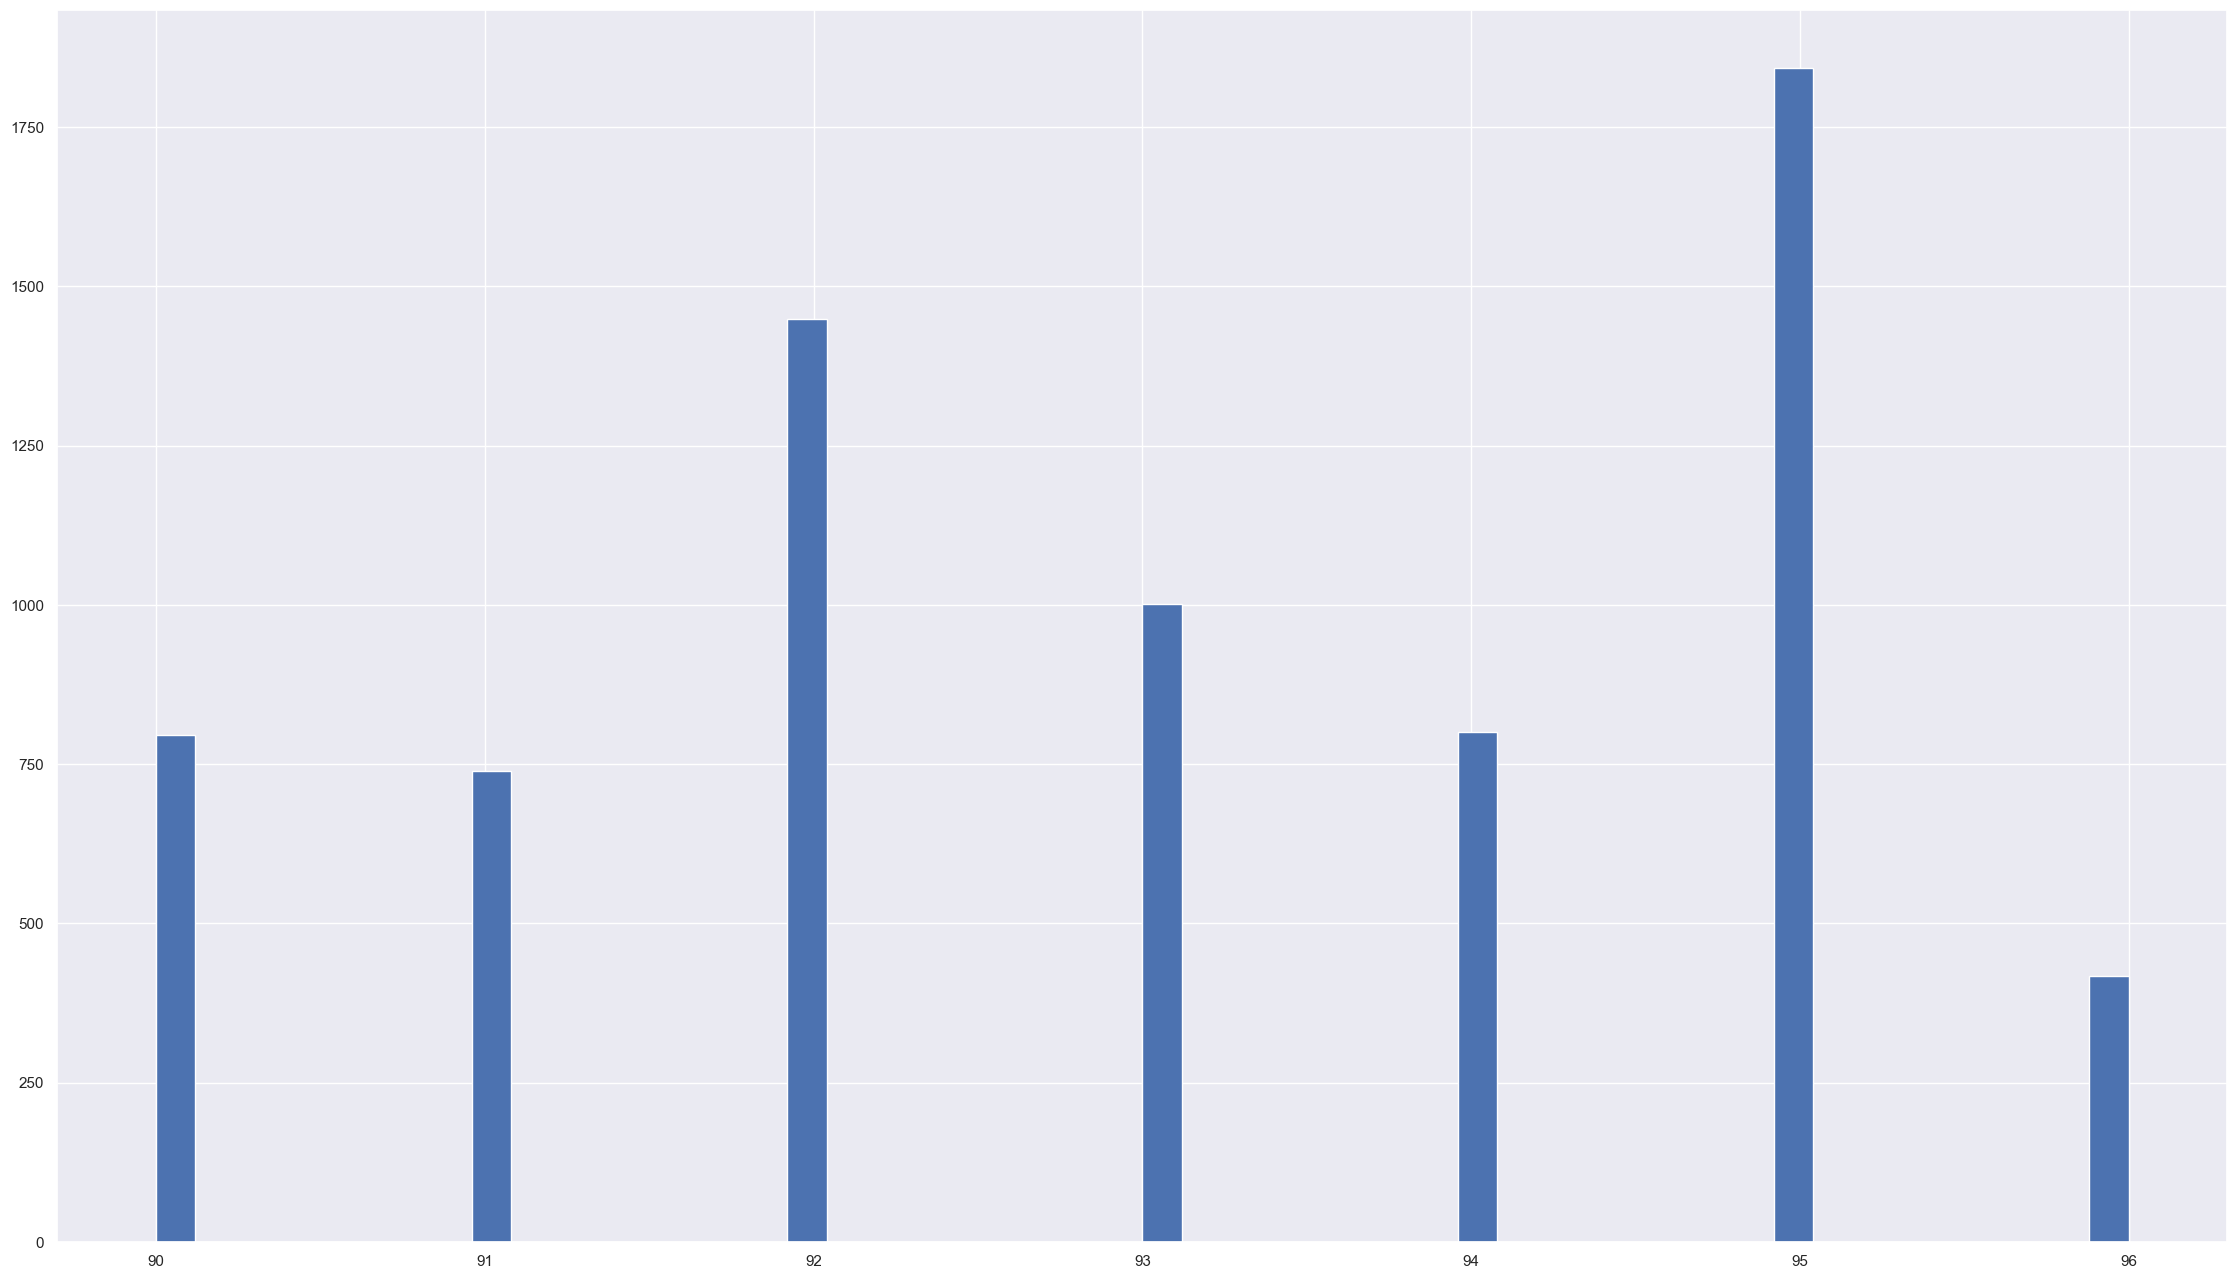

In [212]:
fig, axes= plt.subplots(1,1, figsize=(28,16))
Telecom['Zip Code 2'].hist(ax=axes, bins=50);

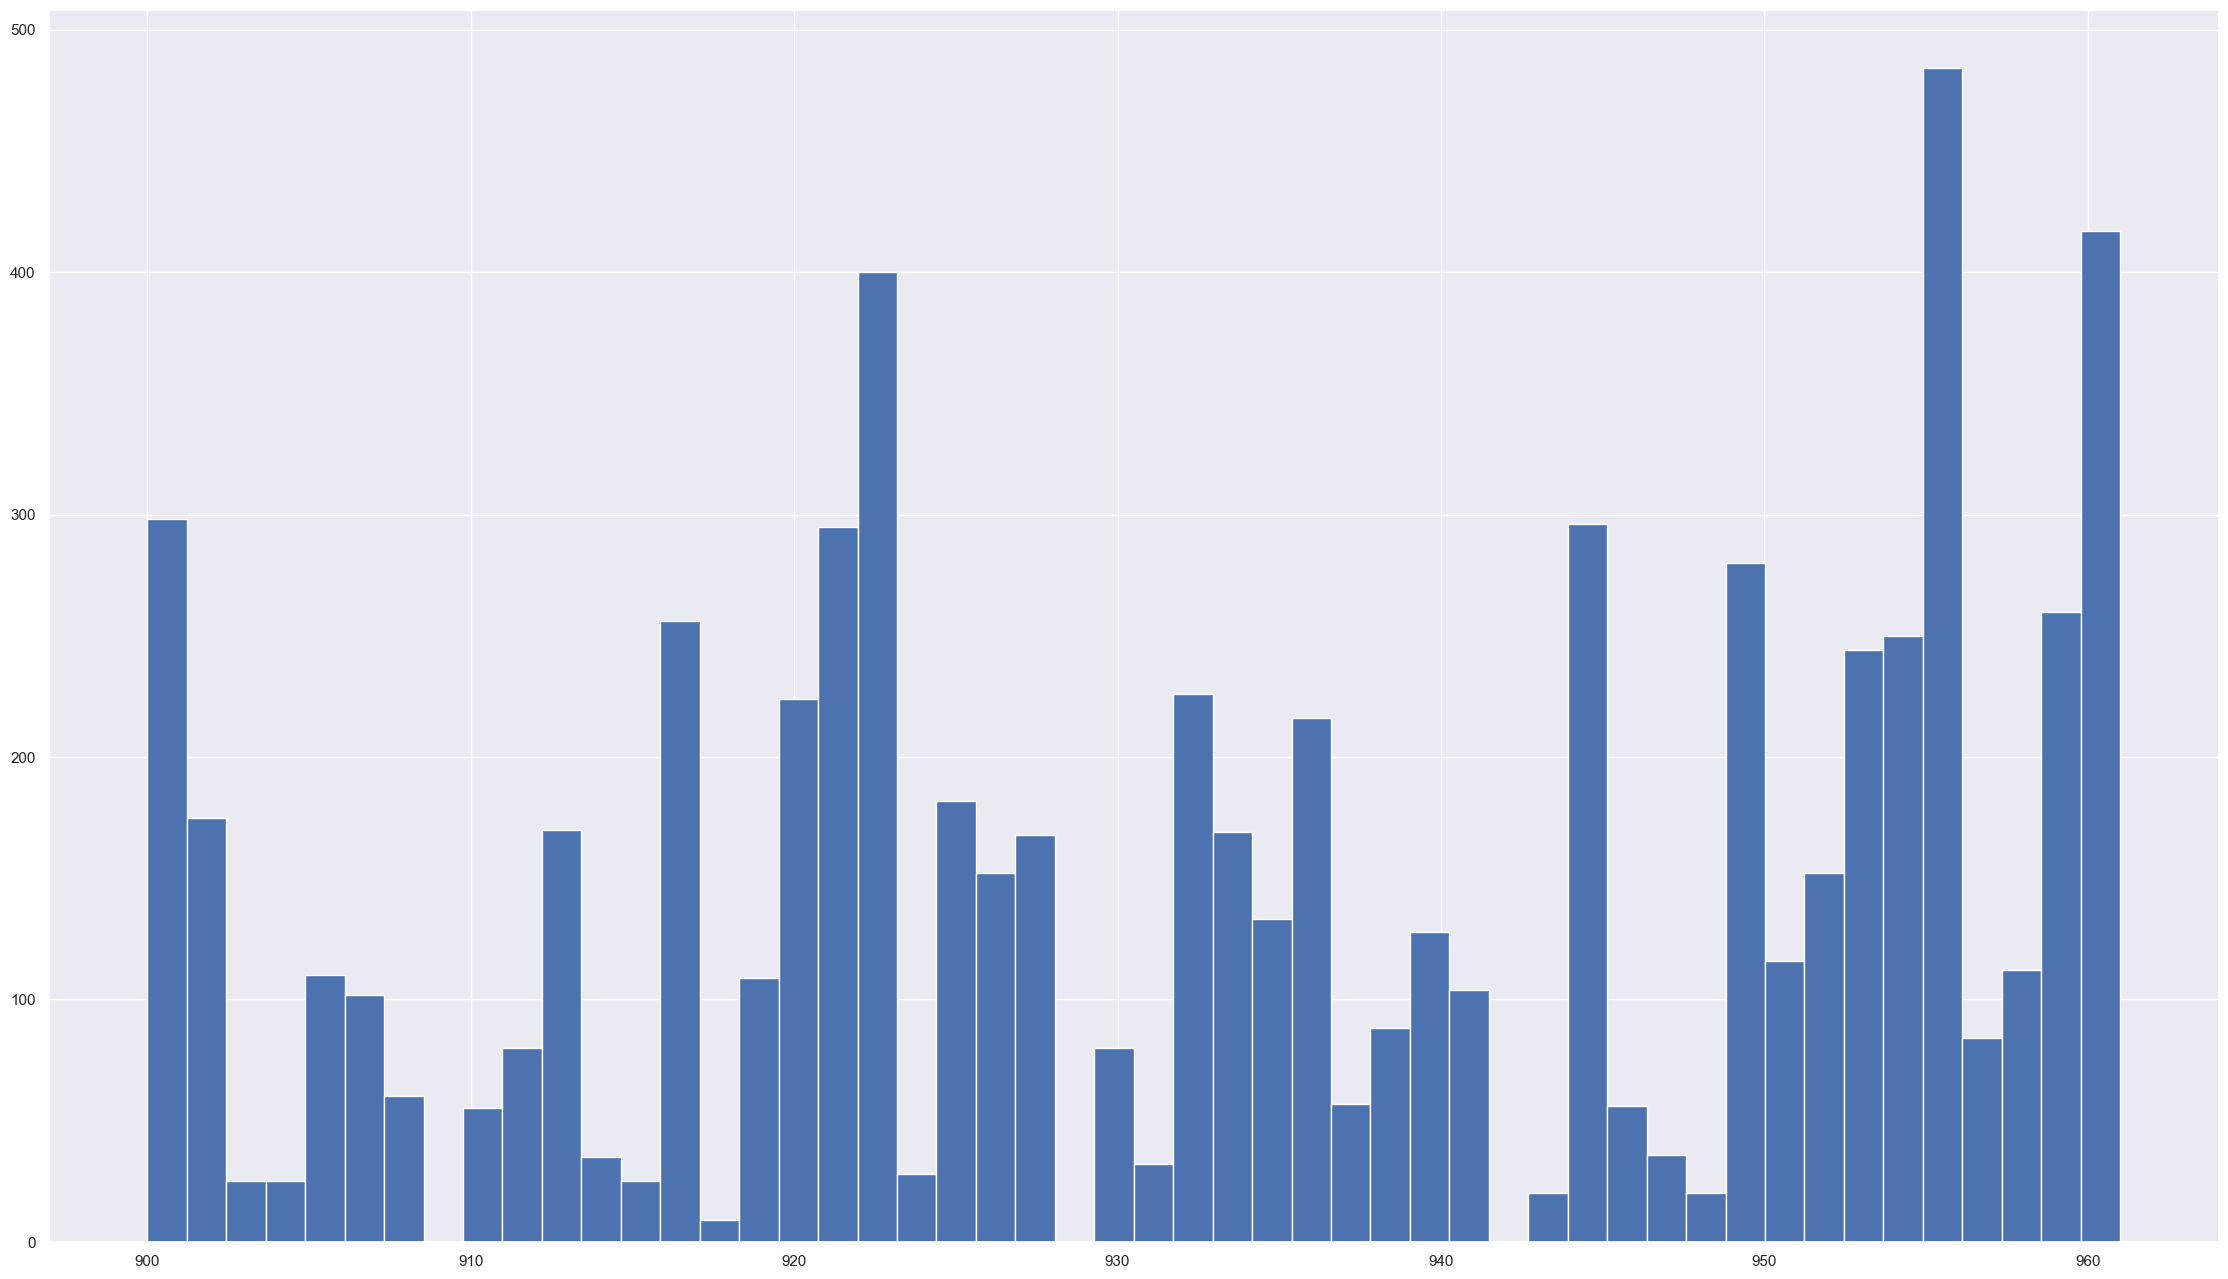

In [213]:
fig, axes= plt.subplots(1,1, figsize=(28,16))
Telecom['Zip Code 3'].hist(ax=axes, bins=50);

Escollim 3 digits

In [214]:
Telecom['Zip Code'] = Telecom['Zip Code 3']
Telecom = Telecom.drop('Zip Code 2', axis=1)
Telecom = Telecom.drop('Zip Code 3', axis=1)

## Number of

In [215]:
## Number of Dependents

In [216]:
def filter_number_of(n):
    if n == 0:
        return n
    else:
        return 1

In [217]:
Telecom['Number of Dependents'] = Telecom['Number of Dependents'].apply(filter_number_of)

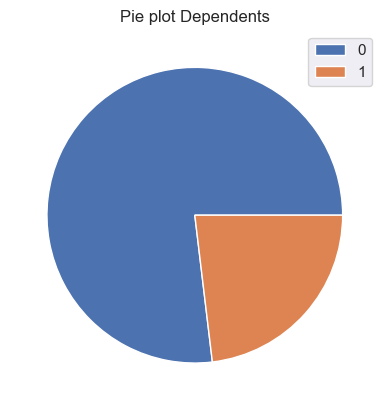

In [218]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Number of Dependents"].value_counts());
ax.legend(patches, labels=Telecom["Number of Dependents"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Dependents")
plt.show();

In [219]:
## Number of Referrals

In [220]:
Telecom['Number of Referrals'] = Telecom['Number of Referrals'].apply(filter_number_of)

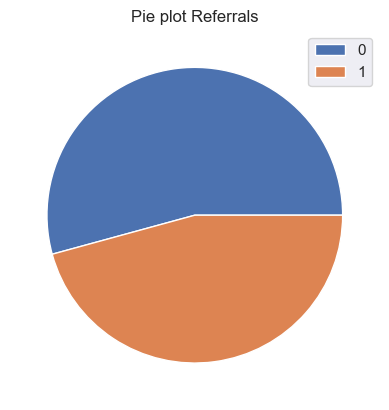

In [221]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Number of Referrals"].value_counts());
ax.legend(patches, labels=Telecom["Number of Referrals"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Referrals")
plt.show();

## Modificar Total's

In [222]:
Telecom.columns

Index(['Married', 'Number of Dependents', 'Zip Code', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Internet Type',
       'Avg Monthly GB Download', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason',
       'Age_disc', 'Total Streaming', 'Premium Services'],
      dtype='object')

In [223]:
#Total Charges --> es el mateix que monthly charges aprox, la borrem :/
# Telecom['Average Monthly Charges'] = Telecom['Total Charges']/Telecom['Tenure in Months'] 

In [224]:
#Total Refunds
Telecom['Average Monthly Refunds'] = Telecom['Total Refunds']/Telecom['Tenure in Months']

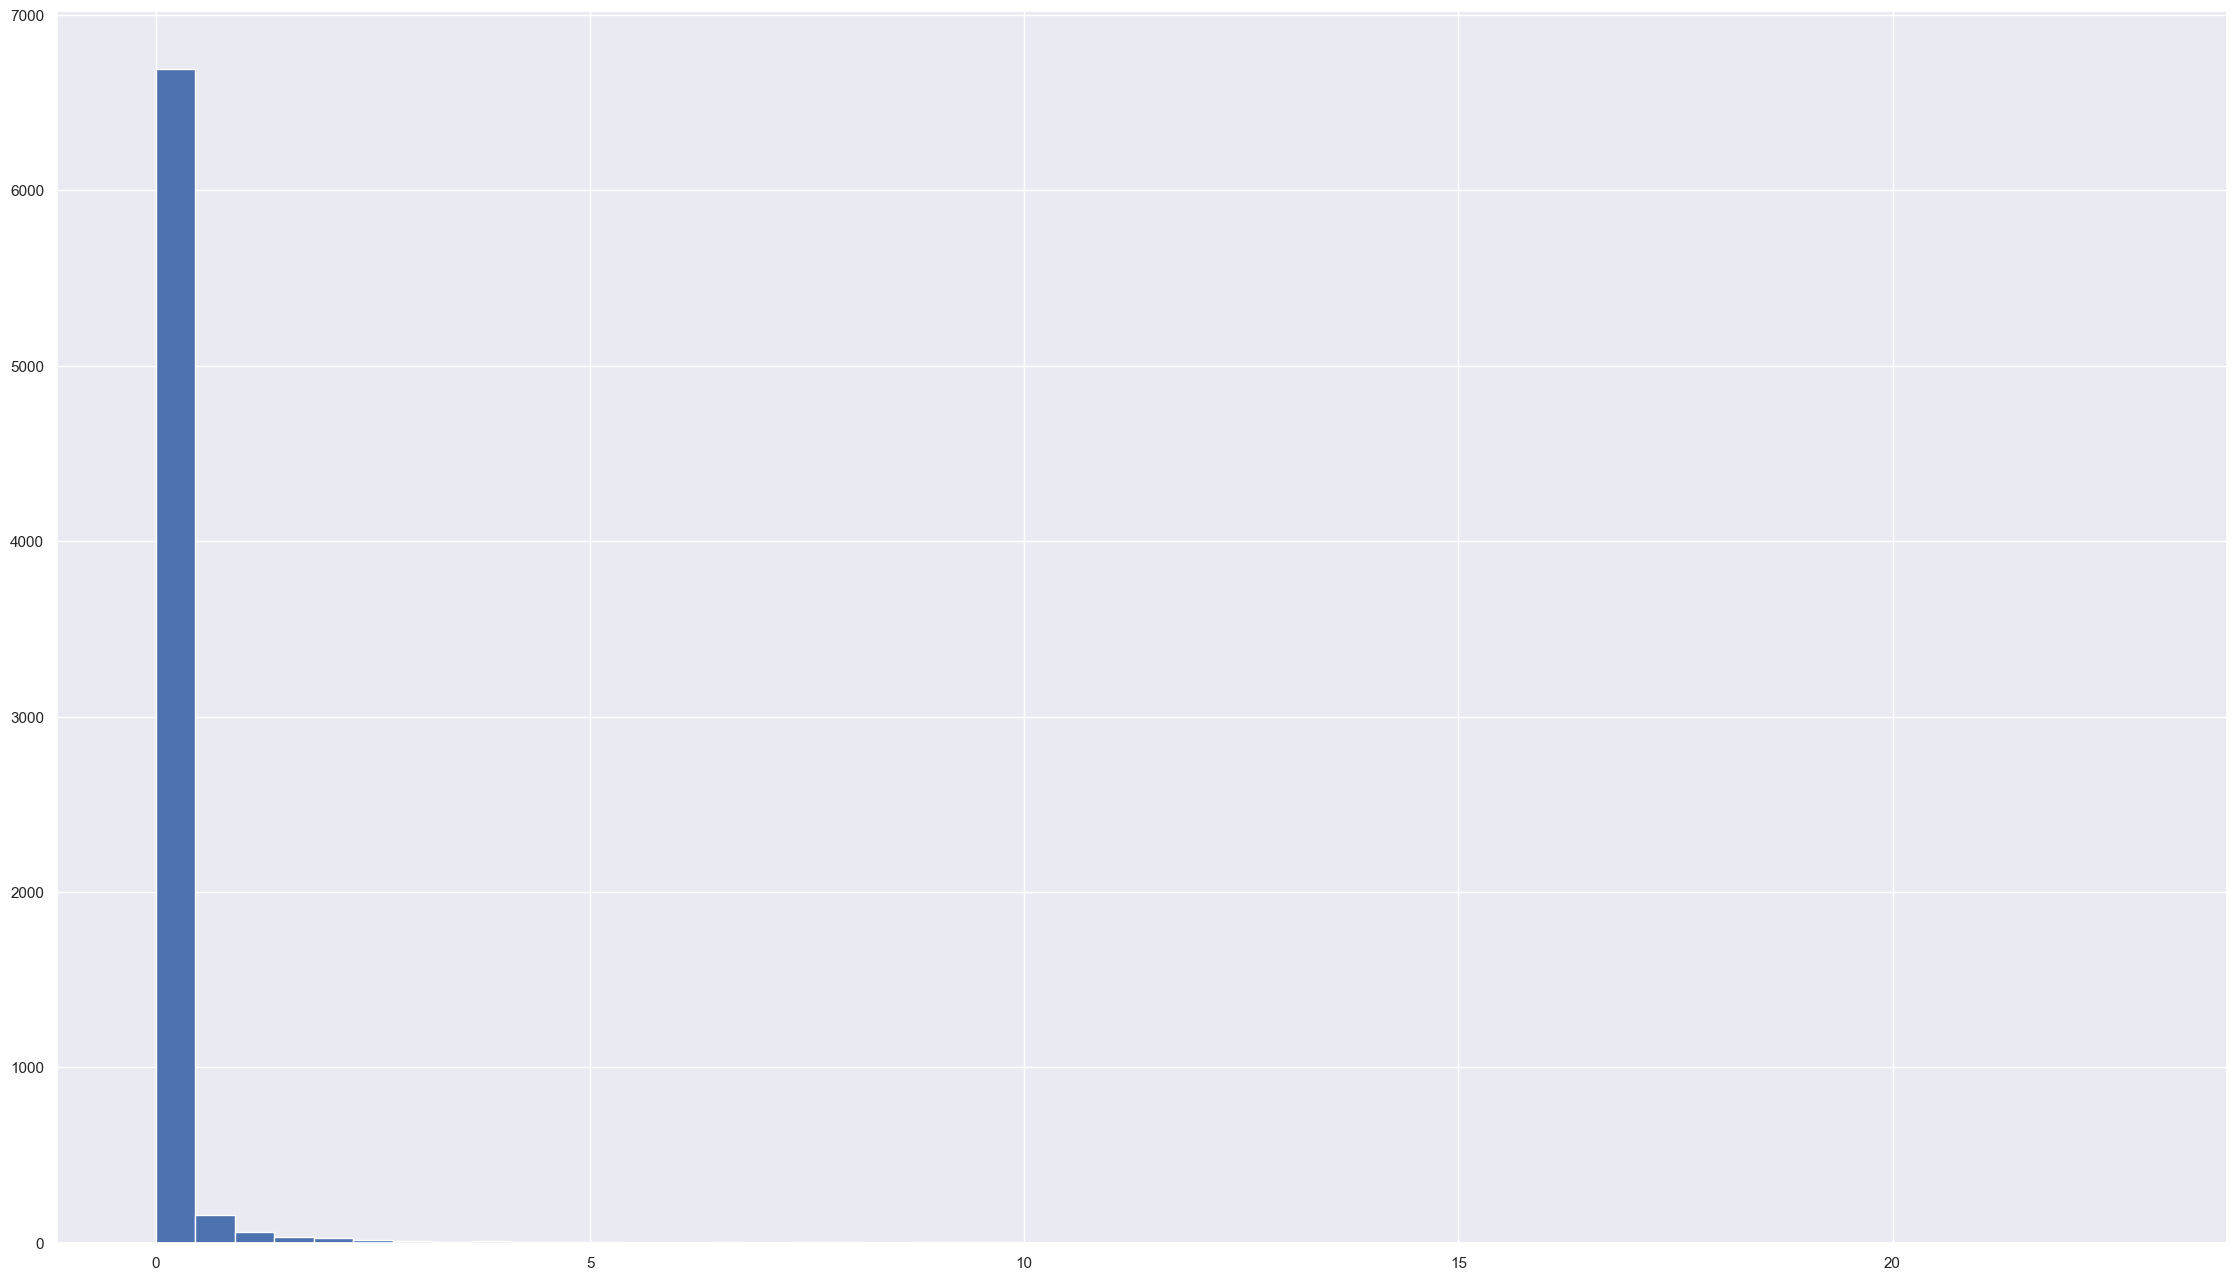

In [225]:
fig, axes= plt.subplots(1,1, figsize=(28,16))
Telecom['Average Monthly Refunds'].hist(ax=axes, bins=50);

In [226]:
## Average Monthly Refunds a binaria

In [227]:
Telecom['Refunds'] = Telecom['Average Monthly Refunds'].apply(filter_number_of)

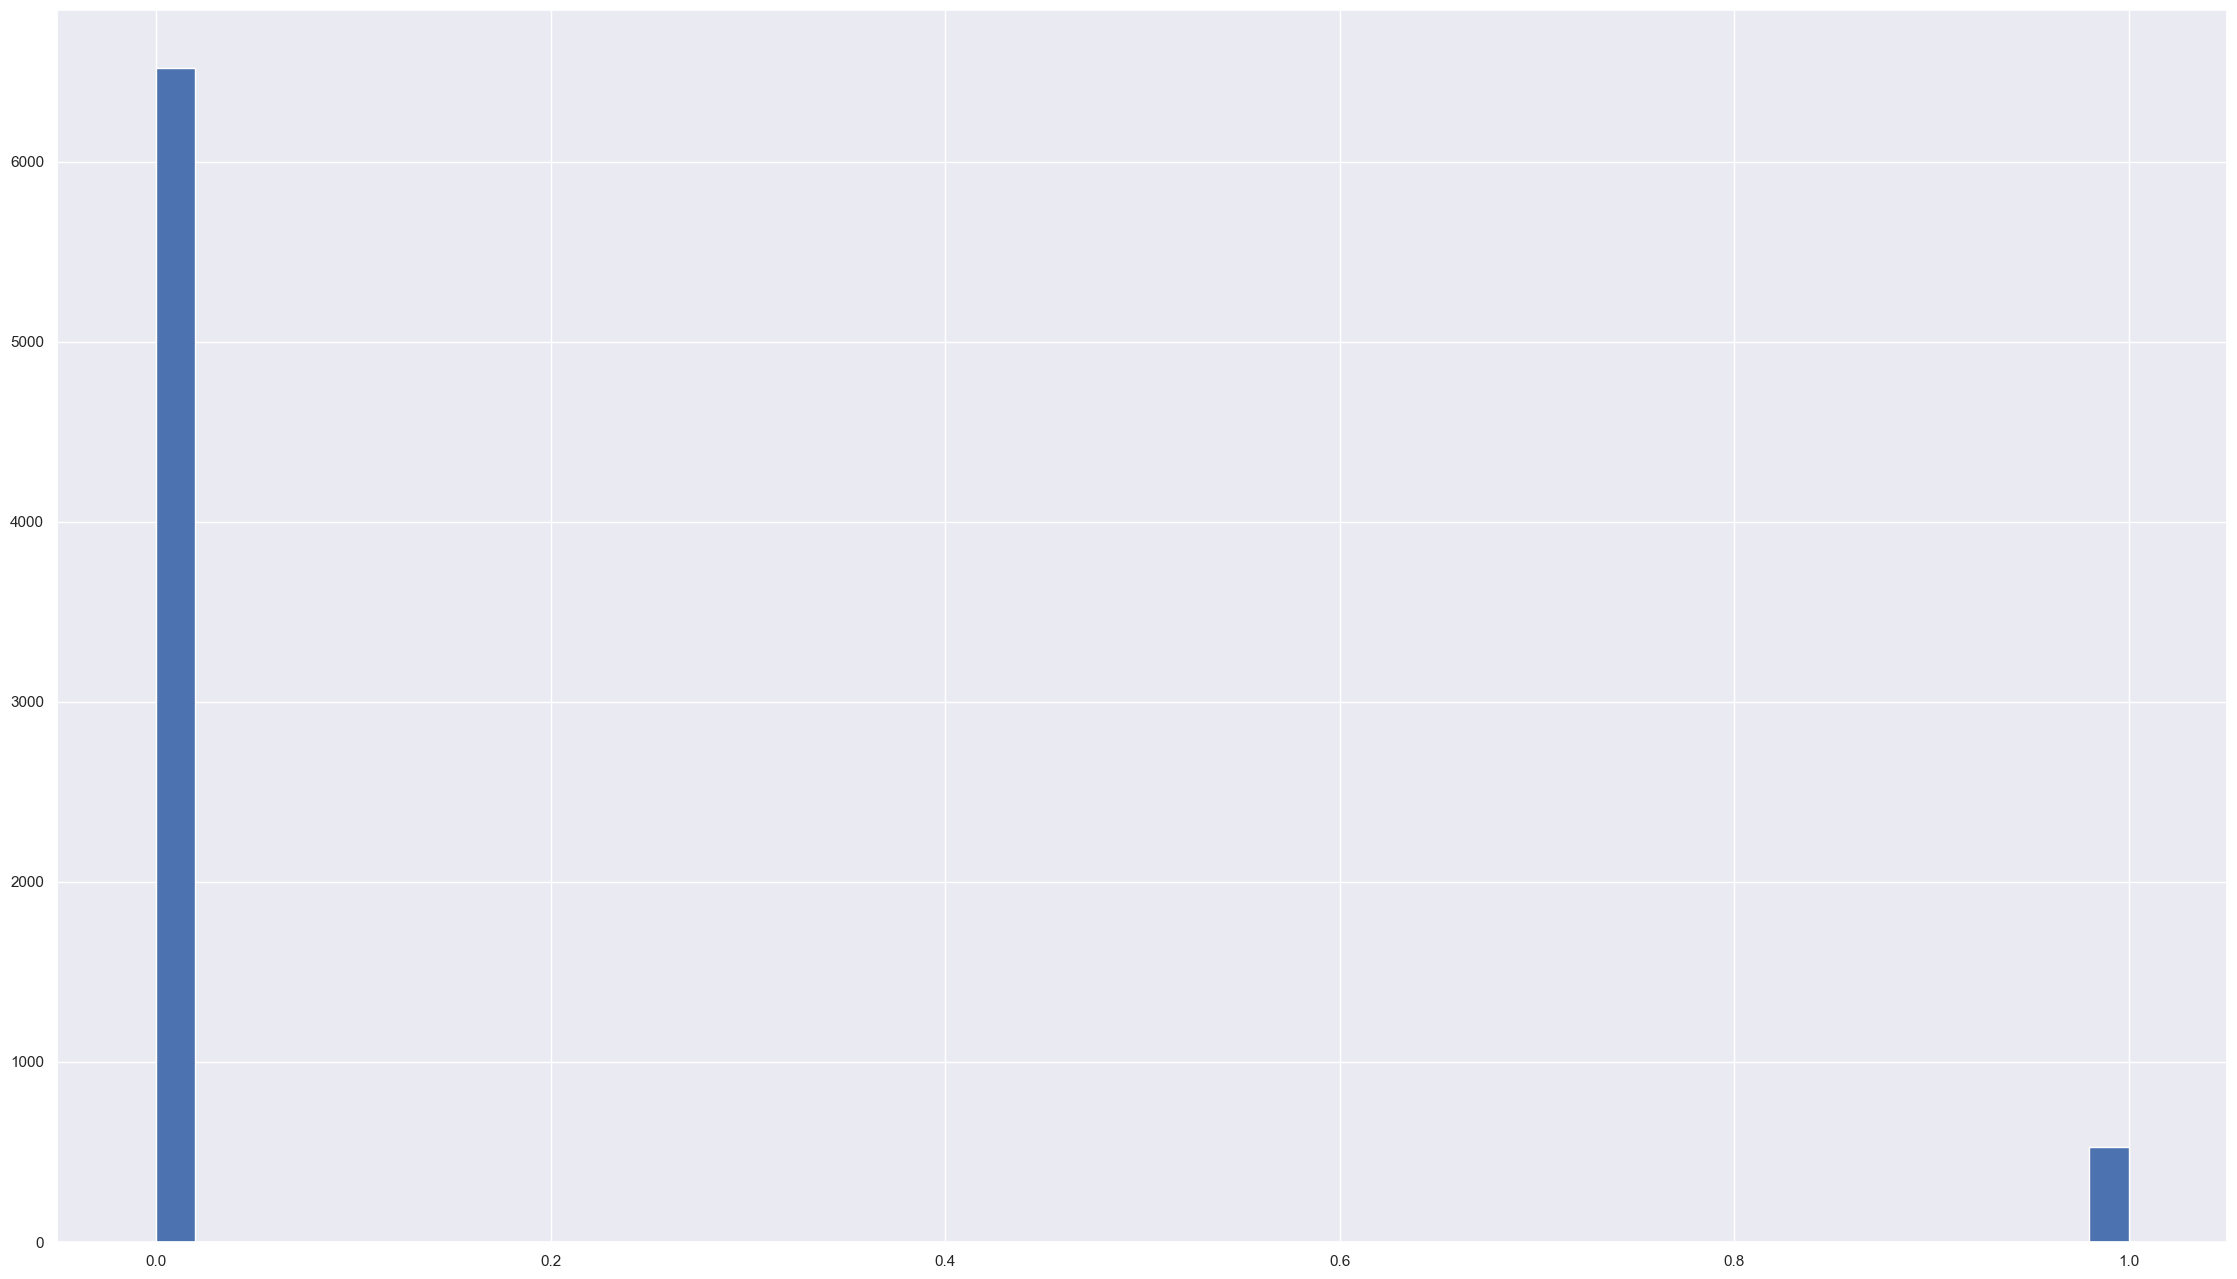

In [228]:
fig, axes= plt.subplots(1,1, figsize=(28,16))
Telecom['Refunds'].hist(ax=axes, bins=50);

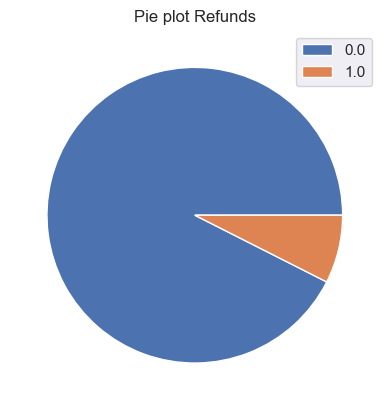

In [229]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Telecom["Refunds"].value_counts());
ax.legend(patches, labels=Telecom["Refunds"].value_counts().index, loc="best");  # ordre labels
plt.title("Pie plot Refunds")
plt.show();

In [230]:
Telecom = Telecom.drop('Average Monthly Refunds', axis=1)

In [231]:
#Total Extra Data Charges
Telecom['Average Monthly Extra Data Charges'] = Telecom['Total Extra Data Charges']/Telecom['Tenure in Months']

In [232]:
#Total Long Distance Charges //// ja existeix la mensual
# Telecom['Average Monthly Long Distance Charges'] = Telecom['Total Long Distance Charges']/Telecom['Tenure in Months']

In [233]:
#Total Revenue
Telecom['Average Monthly Revenue'] = Telecom['Total Revenue']/Telecom['Tenure in Months']

In [234]:
# borrar les totals
Telecom = Telecom.drop('Total Charges', axis=1)
Telecom = Telecom.drop('Total Refunds', axis=1)
Telecom = Telecom.drop('Total Extra Data Charges', axis=1)
Telecom = Telecom.drop('Total Long Distance Charges', axis=1)
Telecom = Telecom.drop('Total Revenue', axis=1)

# Correlacions noves variables

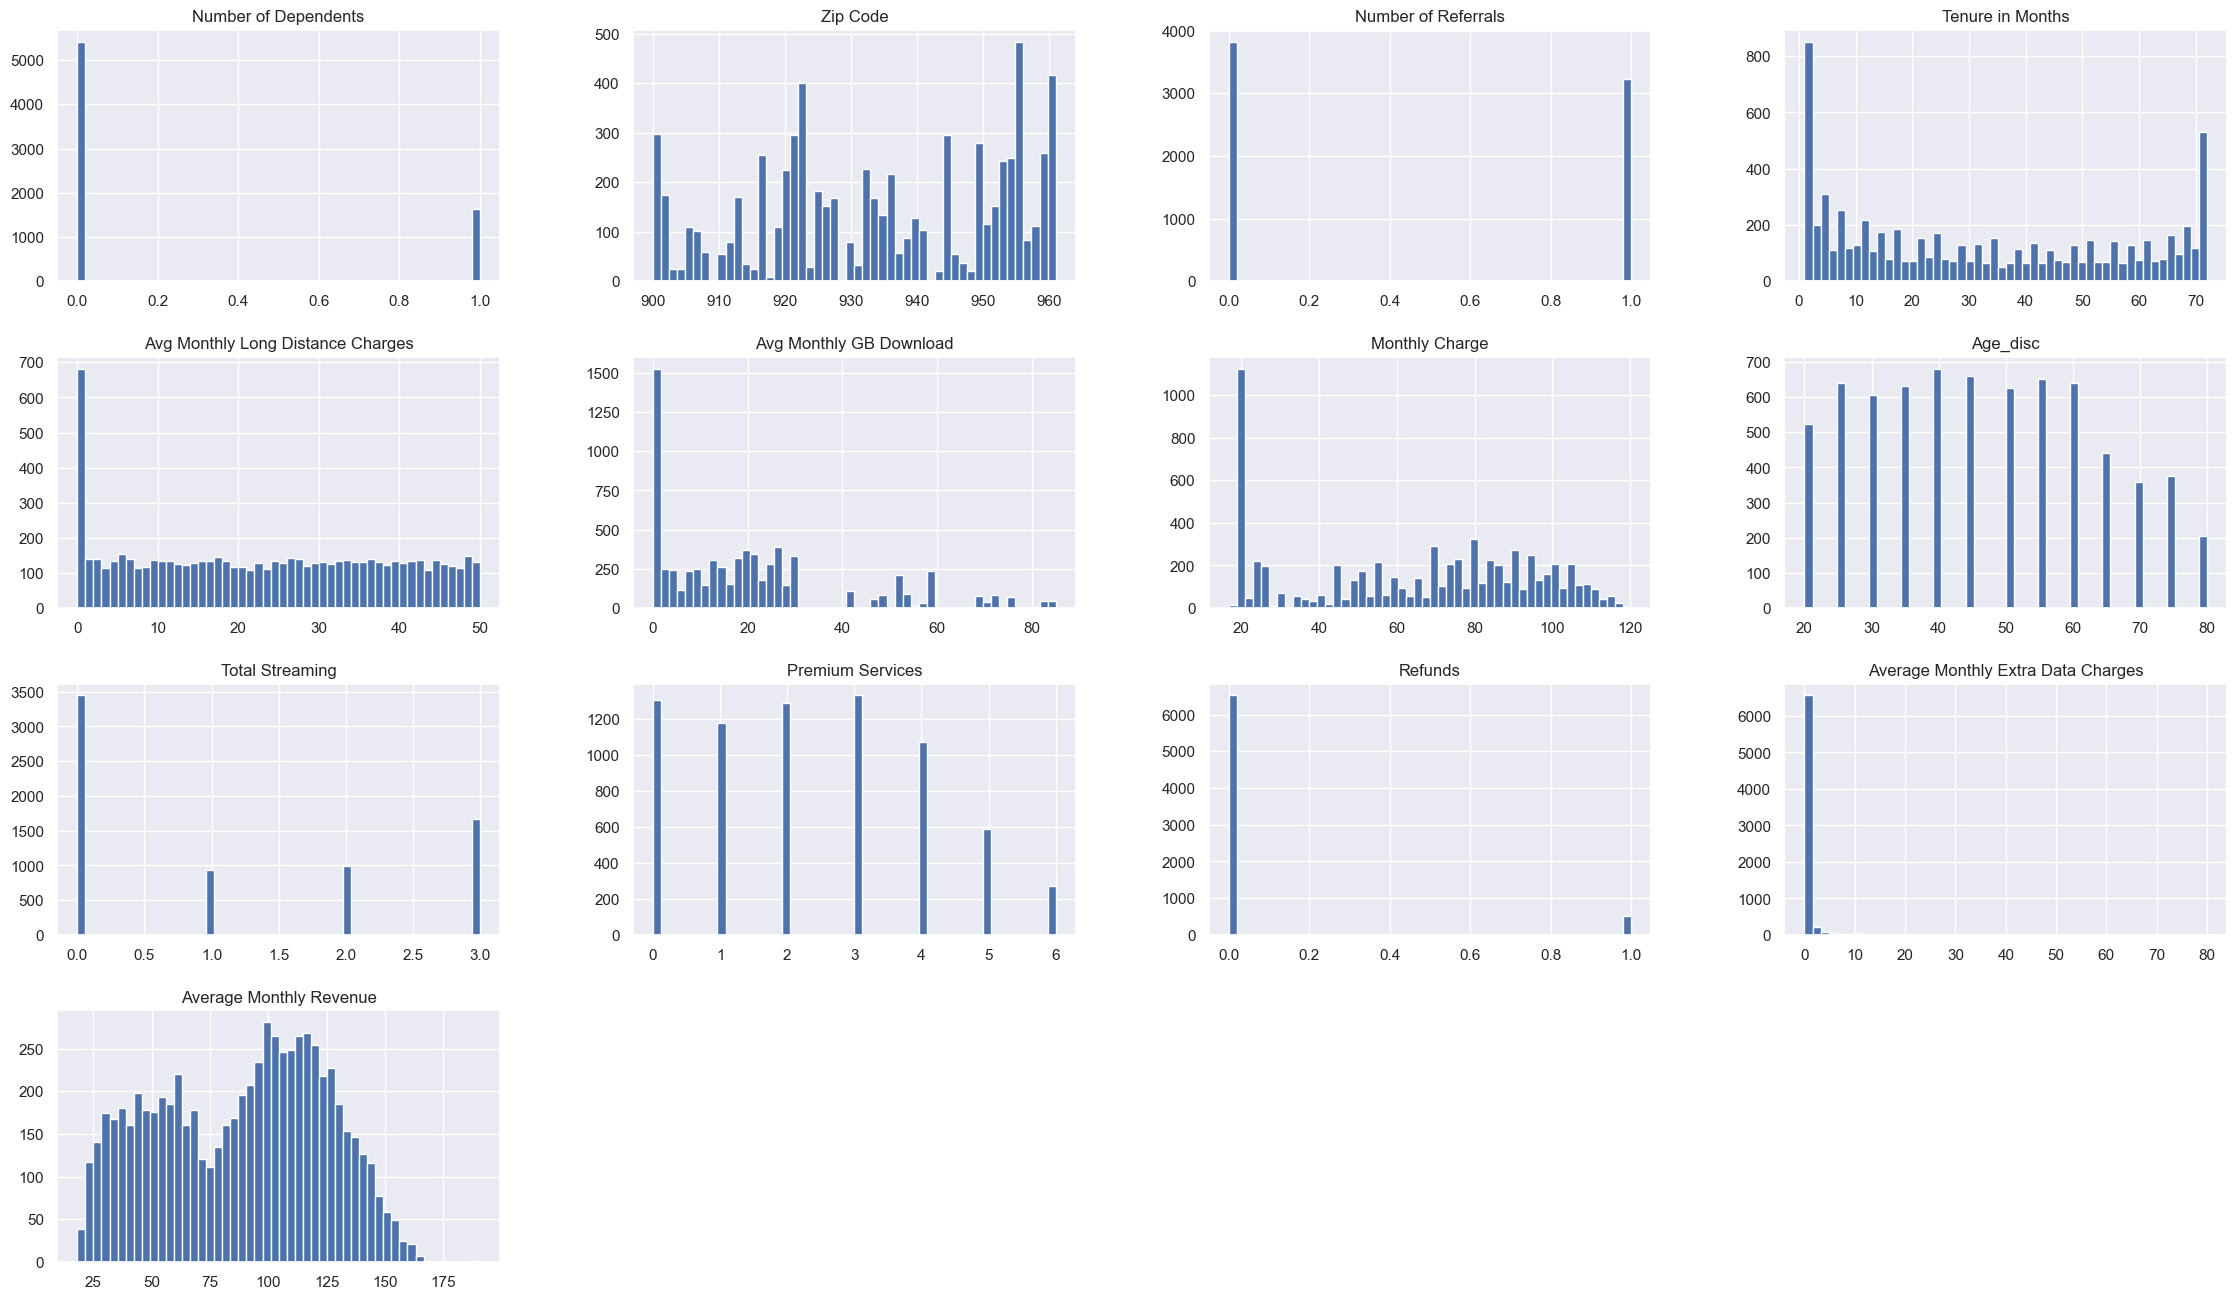

In [235]:
fig, axes= plt.subplots(1,1, figsize=(28,16))
Telecom.hist(ax=axes, bins=50);

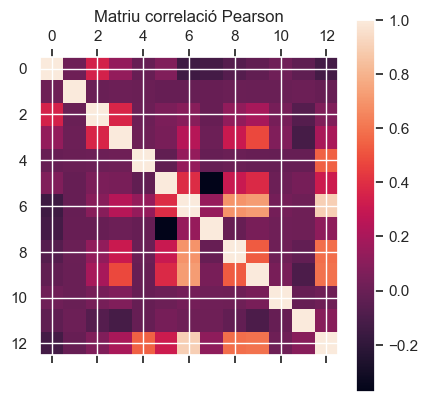

In [236]:
# mirar de nou les correlacions
plt.matshow(Telecom.corr())
plt.title("Matriu correlació Pearson")
cb = plt.colorbar()
plt.show();

In [237]:
Telecom.corr()

Number of Dependents  Zip Code  \
Number of Dependents                               1.000     0.013   
Zip Code                                           0.013     1.000   
Number of Referrals                                0.347    -0.001   
Tenure in Months                                   0.132     0.007   
Avg Monthly Long Distance Charges                 -0.006     0.006   
Avg Monthly GB Download                            0.075    -0.011   
Monthly Charge                                    -0.144    -0.011   
Age_disc                                          -0.126    -0.008   
Total Streaming                                   -0.065     0.003   
Premium Services                                  -0.027    -0.002   
Refunds                                            0.020    -0.002   
Average Monthly Extra Data Charges                -0.033     0.009   
Average Monthly Revenue                           -0.127    -0.006   

                                    Number of Referrals  Tenure in Months  \
Number of Dependents                              0.347             0.132   
Zip Code                                         -0.001             0.007   
Number of Referrals                               1.000             0.362   
Tenure in Months                                  0.362             1.000   
Avg Monthly Long Distance Charges                 0.009             0.015   
Avg Monthly GB Download                           0.055             0.049   
Monthly Charge                                    0.094             0.247   
Age_disc                                         -0.005             0.010   
Total Streaming                                   0.126             0.311   
Premium Services                                  0.195             0.476   
Refunds                                           0.039             0.074   
Average Monthly Extra Data Charges               -0.065            -0.117   
Average Monthly Revenue                           0.076             0.205   

                                    Avg Monthly Long Distance Charges  \
Number of Dependents                                           -0.006   
Zip Code                                                        0.006   
Number of Referrals                                             0.009   
Tenure in Months                                                0.015   
Avg Monthly Long Distance Charges                               1.000   
Avg Monthly GB Download                                        -0.030   
Monthly Charge                                                  0.139   
Age_disc                                                       -0.011   
Total Streaming                                                 0.005   
Premium Services                                               -0.008   
Refunds                                                        -0.013   
Average Monthly Extra Data Charges                             -0.014   
Average Monthly Revenue                                         0.545   

                                    Avg Monthly GB Download  Monthly Charge  \
Number of Dependents                                  0.075          -0.144   
Zip Code                                             -0.011          -0.011   
Number of Referrals                                   0.055           0.094   
Tenure in Months                                      0.049           0.247   
Avg Monthly Long Distance Charges                    -0.030           0.139   
Avg Monthly GB Download                               1.000           0.392   
Monthly Charge                                        0.392           1.000   
Age_disc                                             -0.375           0.143   
Total Streaming                                       0.303           0.695   
Premium Services                                      0.381           0.723   
Refunds                                               0.008           0.038   
Avera

Correlacions altes:\
    Average Monthly Revenue amb moltes (eliminar)
    Premium Services-Total Streaming
    

Eliminar:\
Average Monthly Revenue\


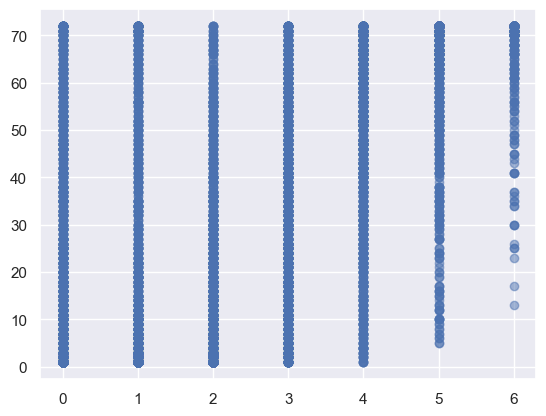

In [238]:
plt.scatter(Telecom["Premium Services"], Telecom["Tenure in Months"], alpha=0.5);

In [239]:
Telecom = Telecom.drop('Average Monthly Revenue', axis=1)

# T Test / Kruskal-Wallis (noves variables)

In [240]:
# separem entre Churned i Stayed
Churned = Telecom[Telecom['Customer Status']=='Churned']
# Joined = Telecom[Telecom['Customer Status']=='Joined']
Stayed = Telecom[Telecom['Customer Status']=='Stayed']
numerical_columns = Telecom.dtypes[Telecom.dtypes!='object'].index

In [241]:
# Kruskal Wallis
dcc = {}
for var in numerical_columns:
    dcc[var] = stats.kruskal(Churned[var], Stayed[var])
    
for item in dcc.items():
    print(f"{item}")

('Number of Dependents', KruskalResult(statistic=460.41594477327453, pvalue=3.902784651790674e-102))
('Zip Code', KruskalResult(statistic=3.5223999817102314, pvalue=0.06054471631780649))
('Number of Referrals', KruskalResult(statistic=213.351312674479, pvalue=2.5511220473271933e-48))
('Tenure in Months', KruskalResult(statistic=1397.0899087810976, pvalue=9.011529904608779e-306))
('Avg Monthly Long Distance Charges', KruskalResult(statistic=0.3313524874674461, pvalue=0.5648637776607577))
('Avg Monthly GB Download', KruskalResult(statistic=65.0818958434591, pvalue=7.184914065608698e-16))
('Monthly Charge', KruskalResult(statistic=168.3779734490001, pvalue=1.6727960215513912e-38))
('Age_disc', KruskalResult(statistic=72.63901180503721, pvalue=1.556712147822898e-17))
('Total Streaming', KruskalResult(statistic=17.293327639799838, pvalue=3.203096091266298e-05))
('Premium Services', KruskalResult(statistic=73.35499019379631, pvalue=1.0830797417542015e-17))
('Refunds', KruskalResult(statistic

In [242]:
dcttest2 = {}
for var in numerical_columns:
    dcttest2[var] = stats.ttest_ind(Churned[var], Stayed[var], equal_var=False)
for item in dcttest2.items():
    print(f"{item}")

('Number of Dependents', Ttest_indResult(statistic=-28.97875423390835, pvalue=2.3789266096482866e-173))
('Zip Code', Ttest_indResult(statistic=-1.5078635765597006, pvalue=0.13167941584113269))
('Number of Referrals', Ttest_indResult(statistic=-15.21248542539887, pvalue=1.0580902249568279e-50))
('Tenure in Months', Ttest_indResult(statistic=-41.417166320437296, pvalue=5.112684045352e-311))
('Avg Monthly Long Distance Charges', Ttest_indResult(statistic=0.5406885540014289, pvalue=0.5887572364774014))
('Avg Monthly GB Download', Ttest_indResult(statistic=3.46300772276402, pvalue=0.00053987275919714))
('Monthly Charge', Ttest_indResult(statistic=15.711139937953597, pvalue=3.9705925129609325e-54))
('Age_disc', Ttest_indResult(statistic=8.747733542042129, pvalue=3.4539470733200955e-18))
('Total Streaming', Ttest_indResult(statistic=3.421266624086414, pvalue=0.0006302834772194676))
('Premium Services', Ttest_indResult(statistic=-10.512491879955403, pvalue=1.4247314031768075e-25))
('Refunds', 

Avg Monthly Long Distance Charges\
Zip Code

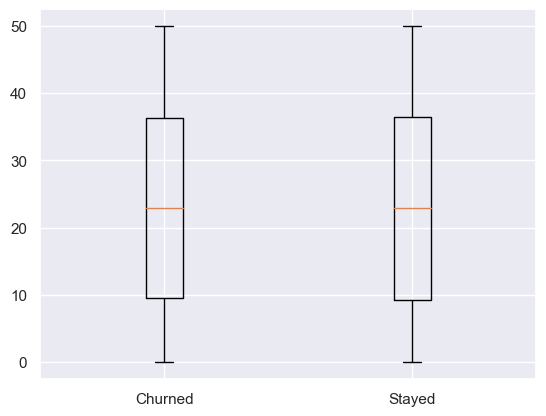

In [243]:
my_dict = {'Churned':Churned["Avg Monthly Long Distance Charges"], 'Stayed':Stayed["Avg Monthly Long Distance Charges"]}

fig, ax = plt.subplots();
ax.boxplot(my_dict.values());
ax.set_xticklabels(my_dict.keys());

In [244]:
Telecom = Telecom.drop("Avg Monthly Long Distance Charges", axis=1)

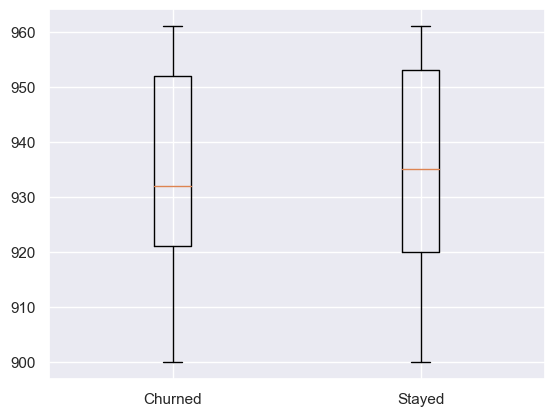

In [245]:
my_dict = {'Churned':Churned["Zip Code"], 'Stayed':Stayed["Zip Code"]}

fig, ax = plt.subplots();
ax.boxplot(my_dict.values());
ax.set_xticklabels(my_dict.keys());

# CHI2 test

In [246]:
TX2 = Telecom[Telecom['Customer Status']!= 'Joined']
cat_columns = Telecom.dtypes[Telecom.dtypes=='object'].index

In [247]:
dcx2 = {}
dcx2_2 = {}
for var in cat_columns:
    # taula de contingencia
    data_crosstab = pd.crosstab(TX2['Customer Status'], 
                                TX2[var],
                                    margins = False)
    # chi2 test
    stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
    dcx2[var] = p
    dcx2_2[var] = stats.chi2_contingency(data_crosstab)
for item in dcx2.items():
    print(f"{item}")

('Married', 7.014602453362894e-50)
('Offer', 2.156619385424327e-151)
('Phone Service', 0.26256666476273127)
('Internet Type', 1.1920217112560258e-127)
('Contract', 0.0)
('Paperless Billing', 3.112345421939546e-52)
('Payment Method', 1.556101524987297e-70)
('Customer Status', 0.0)
('Churn Category', 1.0)
('Churn Reason', 1.0)


### Phone Service

In [248]:
# taula de contingencia
data_crosstab = pd.crosstab(TX2['Phone Service'], 
                                TX2['Customer Status'],
                                    margins = False)
# chi2 test
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
data_crosstab
p

Customer Status  Churned  Stayed
Phone Service                   
No                   170     474
Yes                 1699    4246

0.26256666476273127

In [249]:
Churned = Telecom[Telecom['Customer Status']=='Churned']
# Joined = Telecom[Telecom['Customer Status']=='Joined']
Stayed = Telecom[Telecom['Customer Status']=='Stayed']

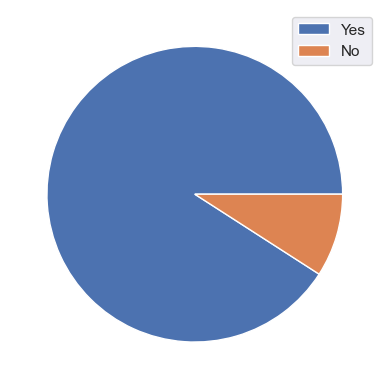

In [250]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Churned["Phone Service"].value_counts());
ax.legend(patches, labels=Churned["Phone Service"].value_counts().index, loc="best");  # ordre labels
plt.show();

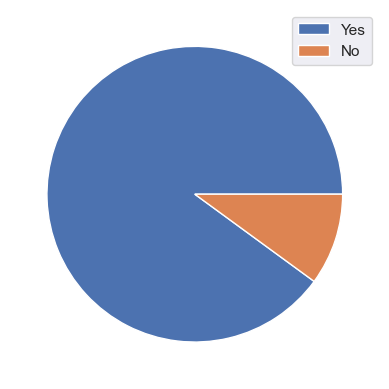

In [251]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Stayed["Phone Service"].value_counts());
ax.legend(patches, labels=Stayed["Phone Service"].value_counts().index, loc="best");  # ordre labels
plt.show();

les proporcions són les mateixes tant en Churned com Stayed, no ens serveix la variable per predir si el client marxa --> la eliminem

In [252]:
Telecom = Telecom.drop("Phone Service", axis=1)

# 2 Profiling

In [253]:
# noves referencies per facilitar analisi
Churned = Telecom[Telecom['Customer Status']=='Churned']
Joined = Telecom[Telecom['Customer Status']=='Joined']
Stayed = Telecom[Telecom['Customer Status']=='Stayed']

In [254]:
Churned.describe()

Number of Dependents  Zip Code  Number of Referrals  Tenure in Months  \
count              1869.000  1869.000             1869.000          1869.000   
mean                  0.057   933.997                0.334            17.979   
std                   0.231    18.195                0.472            19.531   
min                   0.000   900.000                0.000             1.000   
25%                   0.000   921.000                0.000             2.000   
50%                   0.000   932.000                0.000            10.000   
75%                   0.000   952.000                1.000            29.000   
max                   1.000   961.000                1.000            72.000   

       Avg Monthly GB Download  Monthly Charge  Age_disc  Total Streaming  \
count                 1869.000        1869.000  1869.000         1869.000   
mean                    22.175          74.432    49.765            1.263   
std                     18.309          24.668    17.776            1.213   
min                      0.000          18.850    20.000            0.000   
25%                      9.000          56.150    35.000            0.000   
50%                     19.000          79.650    50.000            1.000   
75%                     27.000          94.200    65.000            2.000   
max                     85.000         118.350    80.000            3.000   

       Premium Services   Refunds  Average Monthly Extra Data Charges  
count          1869.000  1869.000                            1869.000  
mean              2.154     0.057                               0.861  
std               1.293     0.232                               4.553  
min               0.000     0.000                               0.000  
25%               1.000     0.000                               0.000  
50%               2.000     0.000                               0.000  
75%               3.000     0.000                               0.000  
max               6.000     1.000                              80.000

In [255]:
Stayed.describe()

Number of Dependents  Zip Code  Number of Referrals  Tenure in Months  \
count              4720.000  4720.000             4720.000          4720.000   
mean                  0.305   934.752                0.533            41.042   
std                   0.461    18.682                0.499            22.364   
min                   0.000   900.000                0.000             4.000   
25%                   0.000   920.000                0.000            21.000   
50%                   0.000   935.000                1.000            42.000   
75%                   1.000   953.000                1.000            63.000   
max                   1.000   961.000                1.000            72.000   

       Avg Monthly GB Download  Monthly Charge  Age_disc  Total Streaming  \
count                 4720.000        4720.000  4720.000         4720.000   
mean                    20.362          62.980    45.603            1.148   
std                     21.159          31.163    16.443            1.272   
min                      0.000          16.750    20.000            0.000   
25%                      0.000          25.450    30.000            0.000   
50%                     16.000          66.500    45.000            1.000   
75%                     27.000          89.750    60.000            3.000   
max                     85.000         120.336    80.000            3.000   

       Premium Services   Refunds  Average Monthly Extra Data Charges  
count          4720.000  4720.000                            4720.000  
mean              2.576     0.087                               0.233  
std               1.841     0.283                               1.020  
min               0.000     0.000                               0.000  
25%               1.000     0.000                               0.000  
50%               3.000     0.000                               0.000  
75%               4.000     0.000                               0.000  
max               6.000     1.000                              13.636

In [256]:
# Joined.describe()

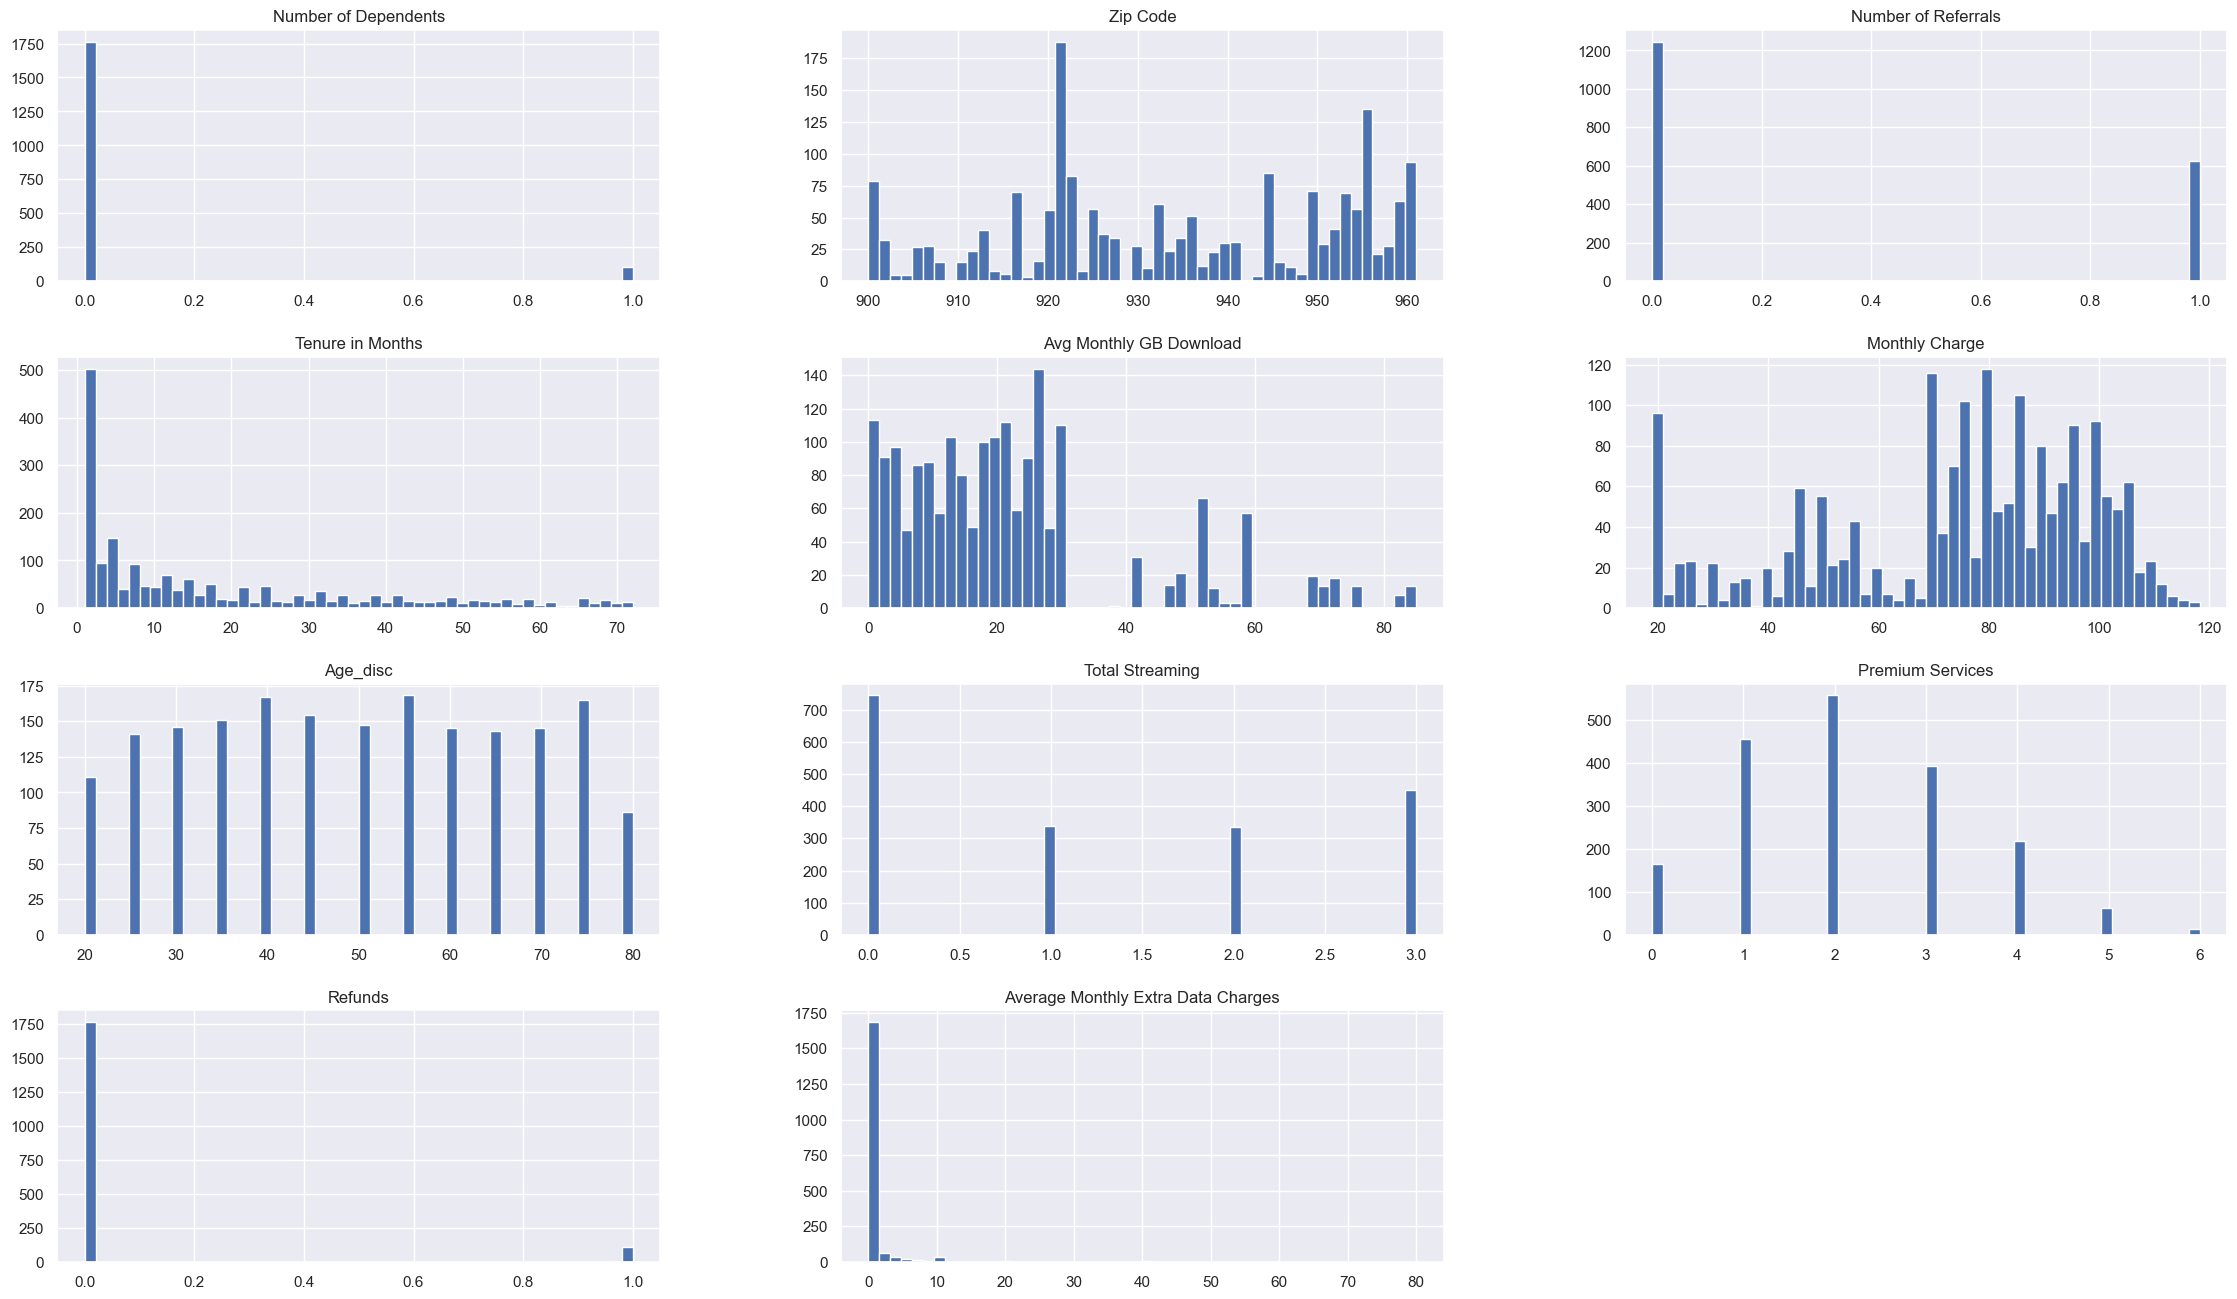

In [257]:
fig, axes= plt.subplots(1,1, figsize=(28,16))
Churned.hist(ax=axes, bins=50);

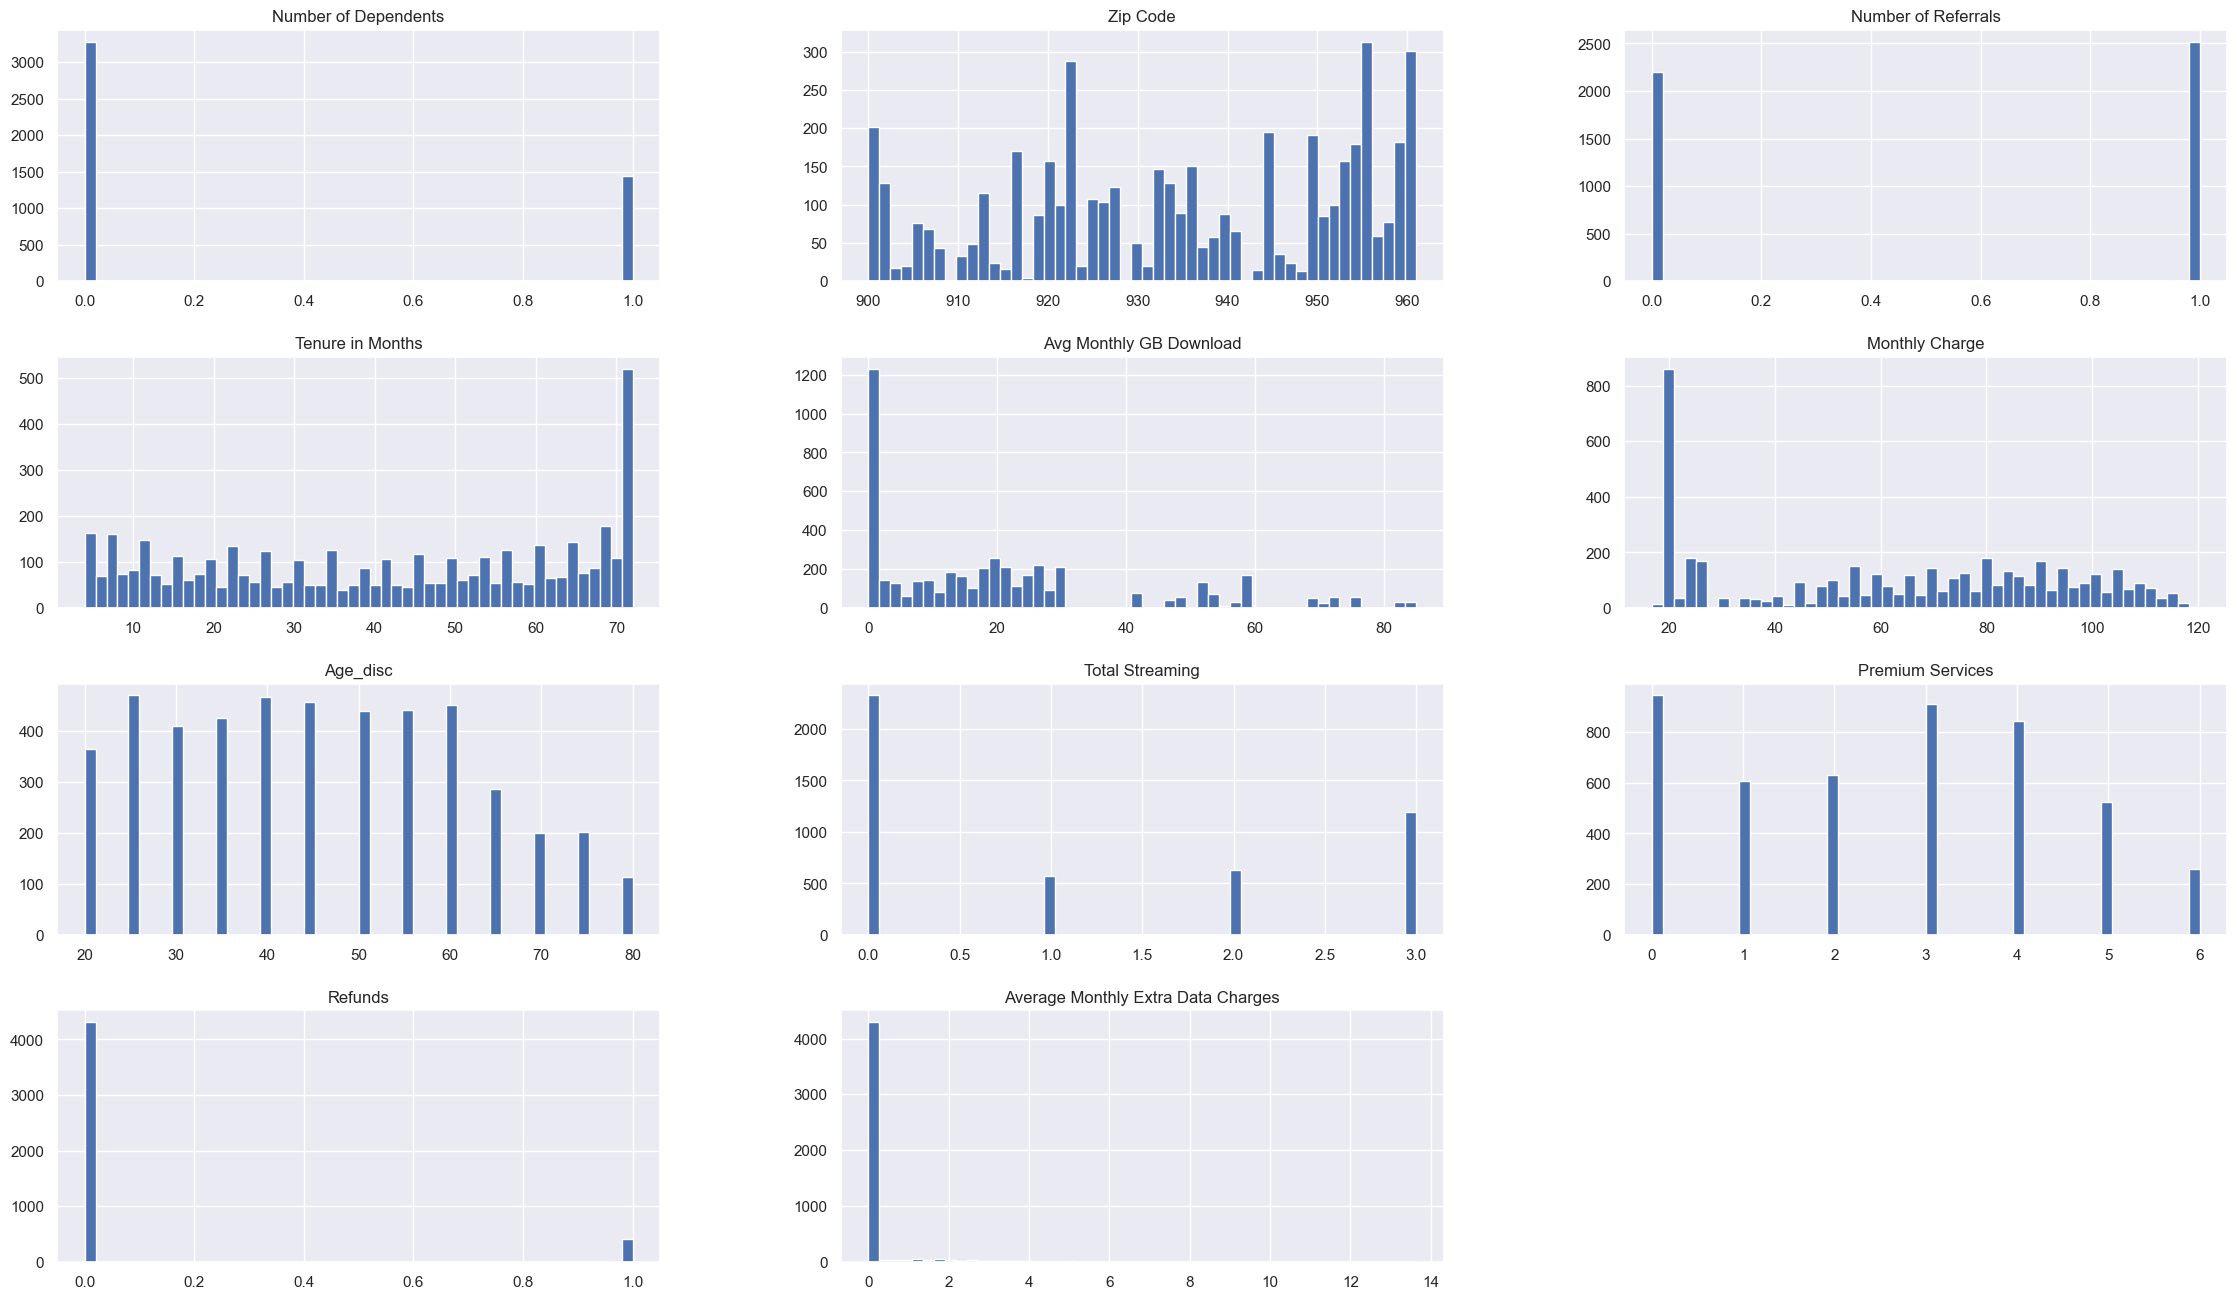

In [258]:
fig, axes= plt.subplots(1,1, figsize=(28,16))
Stayed.hist(ax=axes, bins=50);

In [259]:
# fig, axes= plt.subplots(1,1, figsize=(28,16))
# Joined.hist(ax=axes, bins=50);

In [260]:
Telecom.dtypes

Married                                object
Number of Dependents                    int64
Zip Code                                int64
Number of Referrals                     int64
Tenure in Months                        int64
Offer                                  object
Internet Type                          object
Avg Monthly GB Download               float64
Contract                               object
Paperless Billing                      object
Payment Method                         object
Monthly Charge                        float64
Customer Status                        object
Churn Category                         object
Churn Reason                           object
Age_disc                                int64
Total Streaming                         int64
Premium Services                        int64
Refunds                               float64
Average Monthly Extra Data Charges    float64
dtype: object

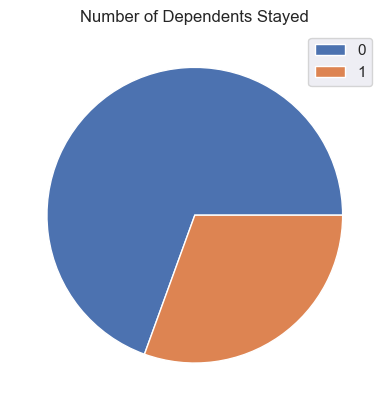

In [261]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Stayed["Number of Dependents"].value_counts());
ax.legend(patches, labels=Stayed["Number of Dependents"].value_counts().index, loc="best");  # ordre labels
plt.title("Number of Dependents Stayed")
plt.show();

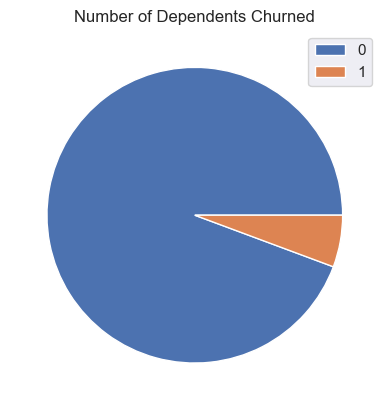

In [262]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Churned["Number of Dependents"].value_counts());
ax.legend(patches, labels=Churned["Number of Dependents"].value_counts().index, loc="best");  # ordre labels
plt.title("Number of Dependents Churned")
plt.show();

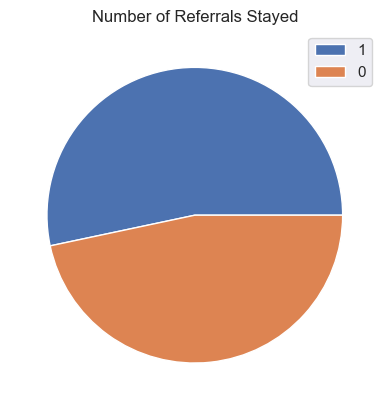

In [263]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Stayed["Number of Referrals"].value_counts());
ax.legend(patches, labels=Stayed["Number of Referrals"].value_counts().index, loc="best");  # ordre labels
plt.title("Number of Referrals Stayed")
plt.show();

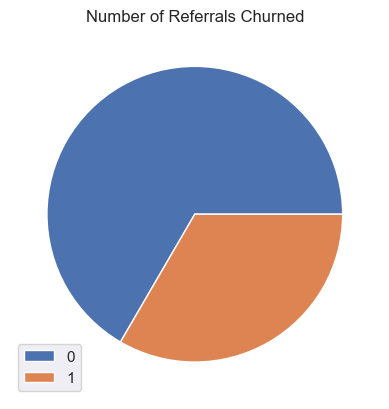

In [264]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Churned["Number of Referrals"].value_counts());
ax.legend(patches, labels=Churned["Number of Referrals"].value_counts().index, loc="best");  # ordre labels
plt.title("Number of Referrals Churned")
plt.show();

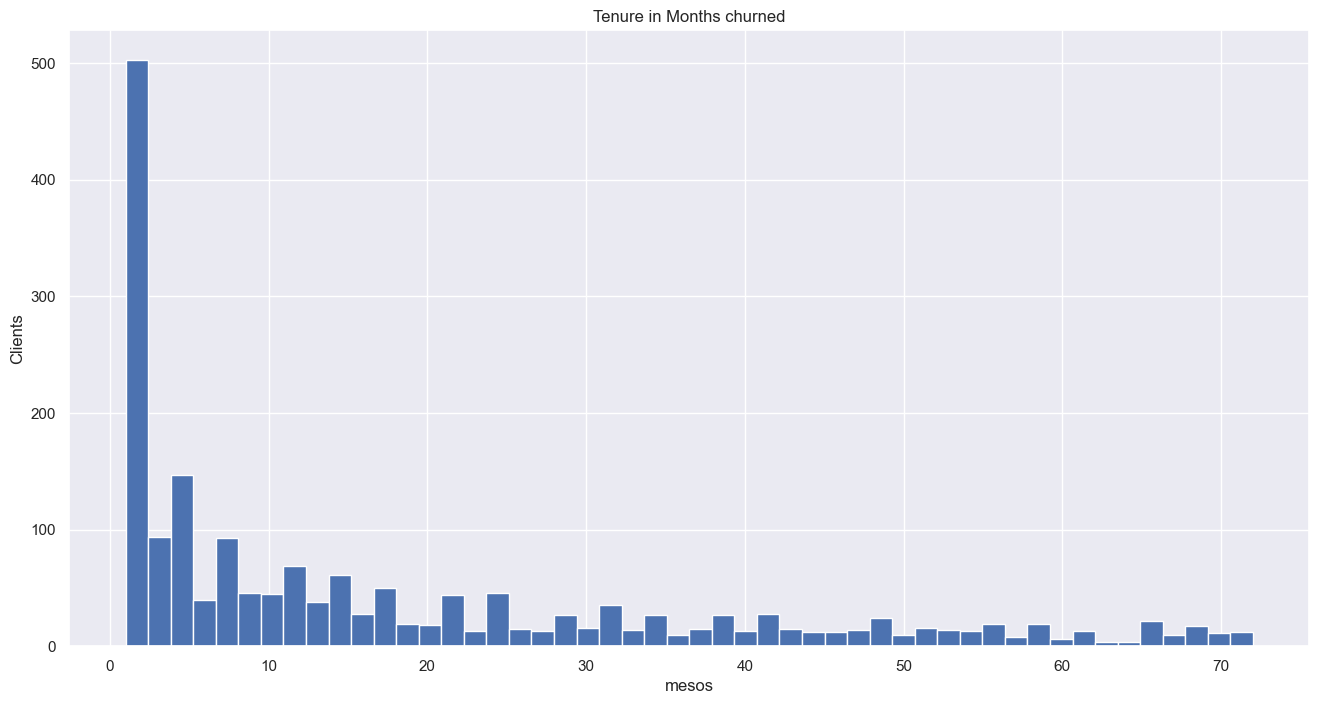

In [265]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("mesos")
plt.ylabel("Clients")
plt.title("Tenure in Months churned")
Churned['Tenure in Months'].hist(ax=axes, bins=50);

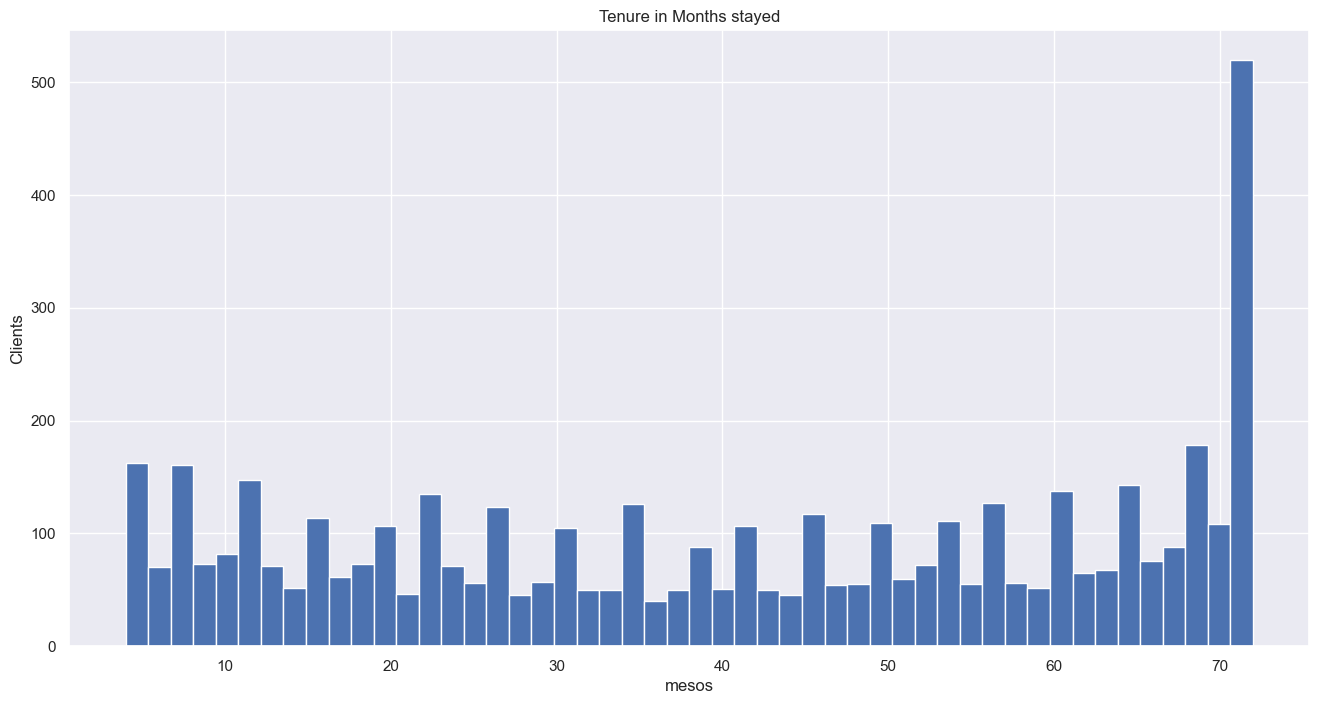

In [266]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("mesos")
plt.ylabel("Clients")
plt.title("Tenure in Months stayed")
Stayed['Tenure in Months'].hist(ax=axes, bins=50);

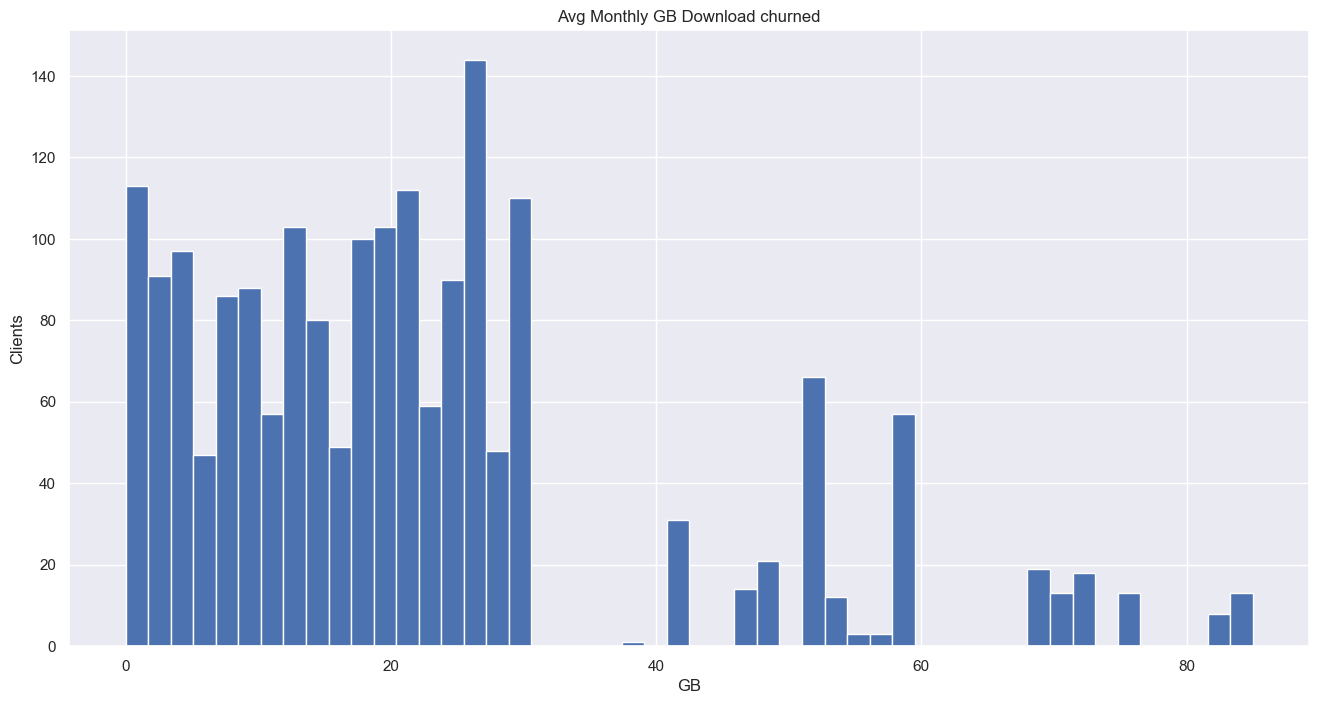

In [267]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("GB")
plt.ylabel("Clients")
plt.title("Avg Monthly GB Download churned")
Churned['Avg Monthly GB Download'].hist(ax=axes, bins=50);

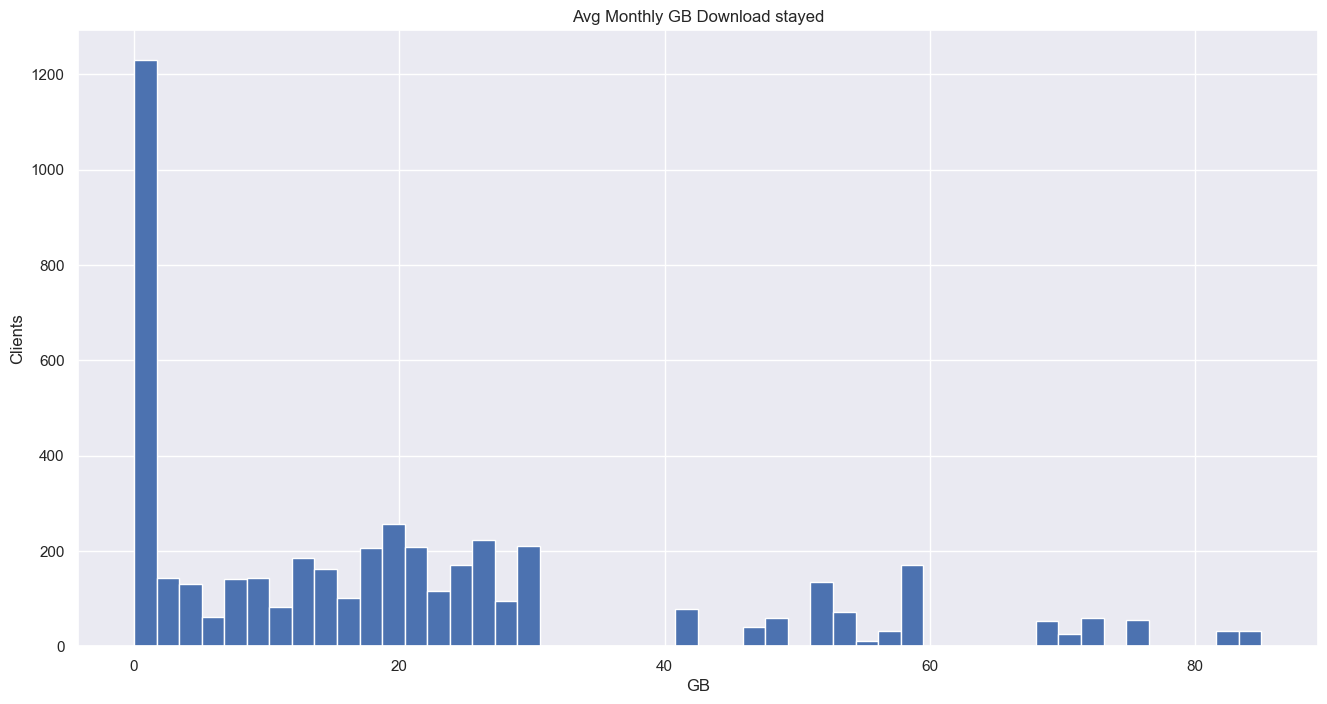

In [268]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("GB")
plt.ylabel("Clients")
plt.title("Avg Monthly GB Download stayed")
Stayed['Avg Monthly GB Download'].hist(ax=axes, bins=50);

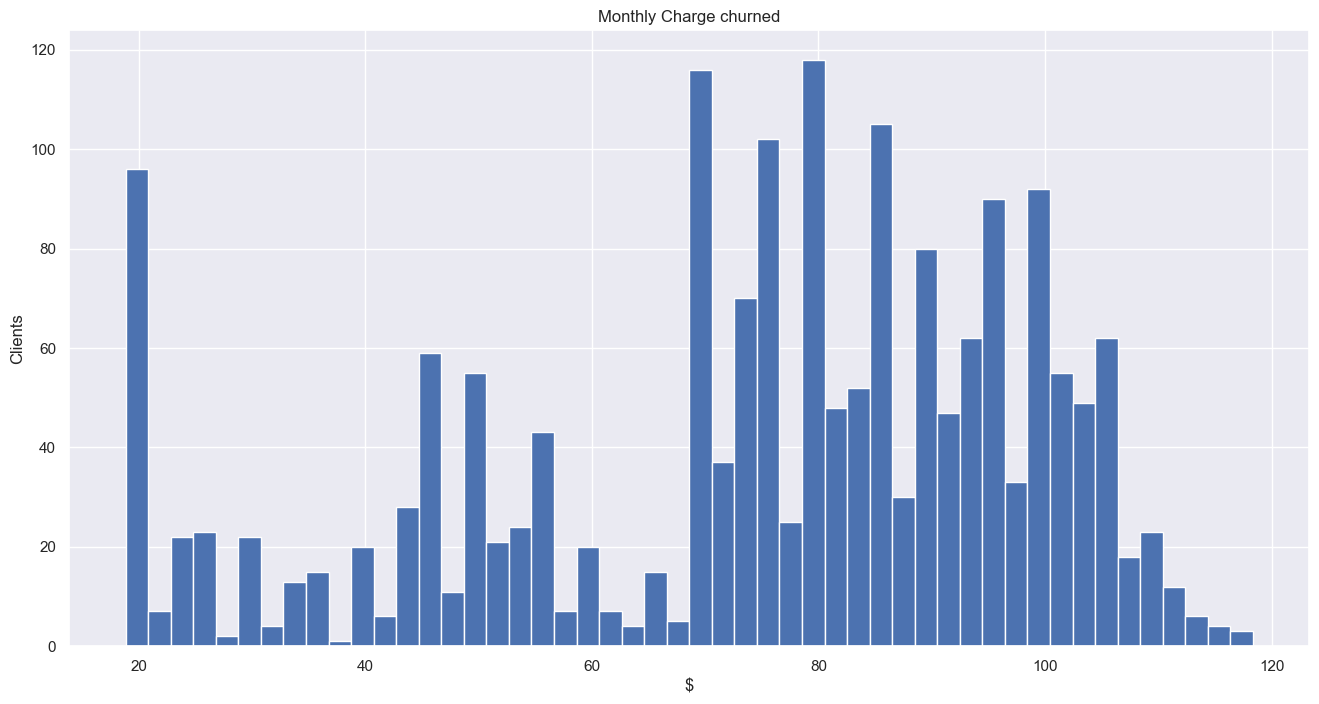

In [269]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("$")
plt.ylabel("Clients")
plt.title("Monthly Charge churned")
Churned['Monthly Charge'].hist(ax=axes, bins=50);

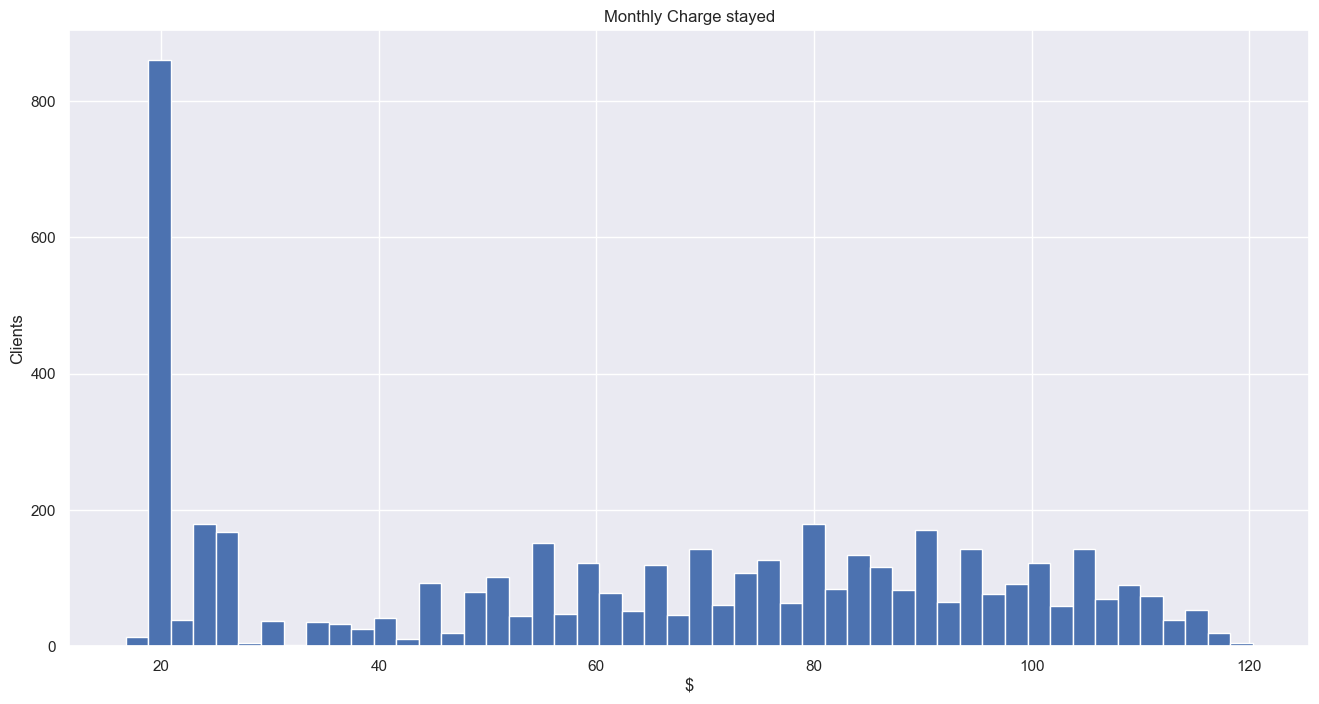

In [270]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("$")
plt.ylabel("Clients")
plt.title("Monthly Charge stayed")
Stayed['Monthly Charge'].hist(ax=axes, bins=50);

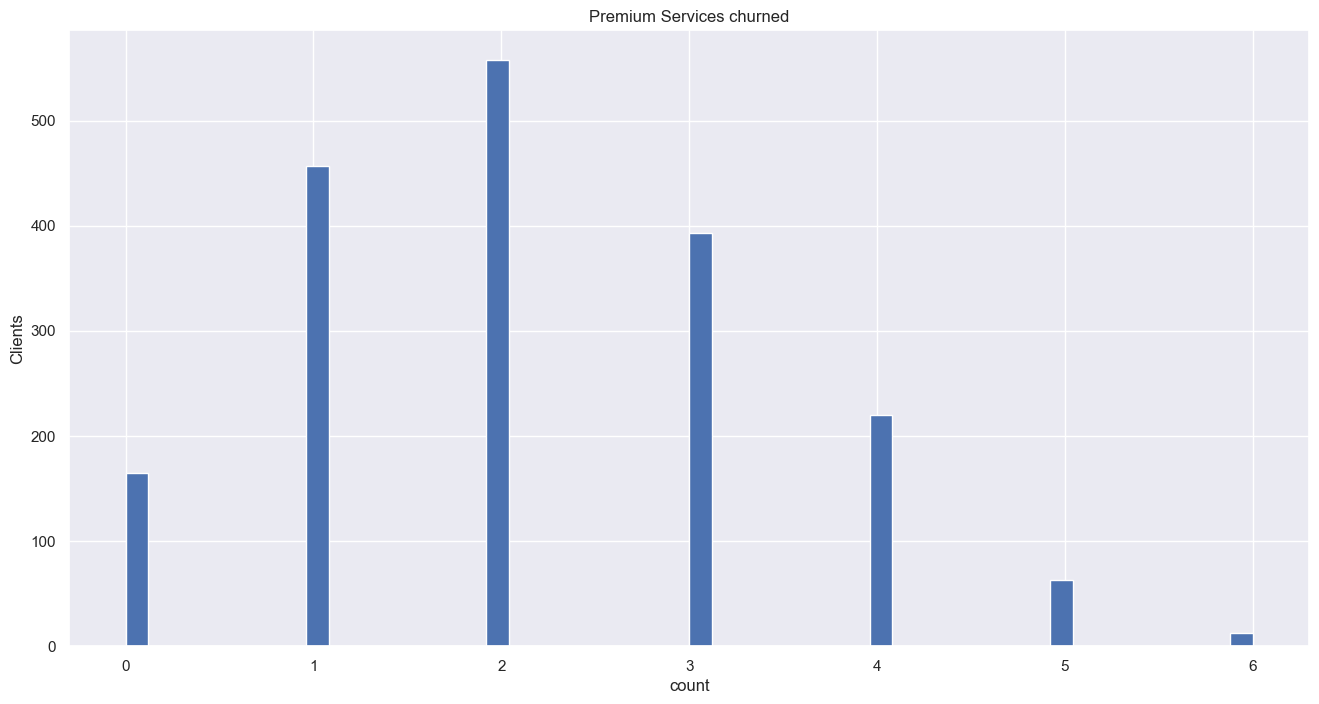

In [271]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("count")
plt.ylabel("Clients")
plt.title("Premium Services churned")
Churned['Premium Services'].hist(ax=axes, bins=50);

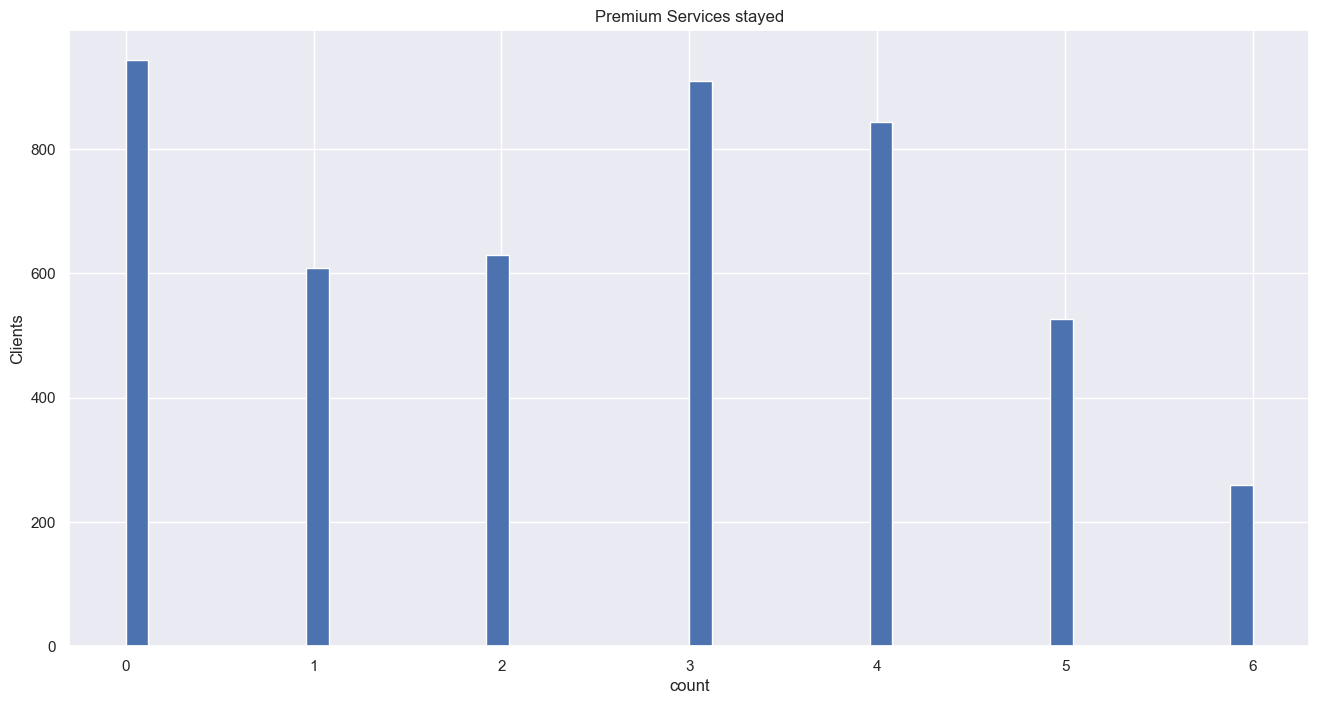

In [272]:
fig, axes= plt.subplots(1,1, figsize=(16,8))
plt.xlabel("count")
plt.ylabel("Clients")
plt.title("Premium Services stayed")
Stayed['Premium Services'].hist(ax=axes, bins=50);

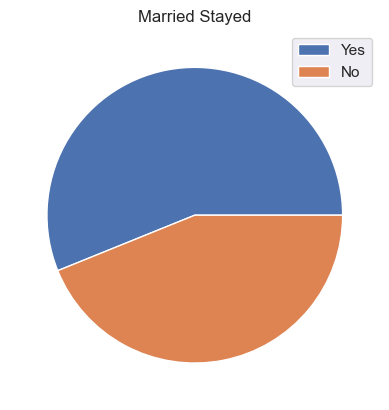

In [273]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Stayed["Married"].value_counts());
ax.legend(patches, labels=Stayed["Married"].value_counts().index, loc="best");  # ordre labels
plt.title("Married Stayed")
plt.show();

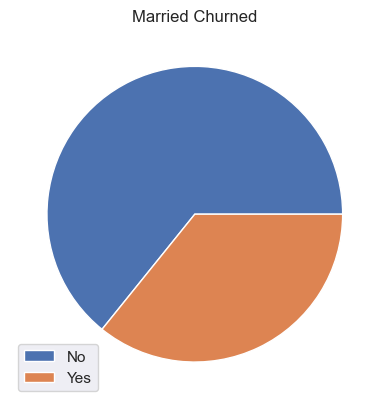

In [274]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Churned["Married"].value_counts());
ax.legend(patches, labels=Churned["Married"].value_counts().index, loc="best");  # ordre labels
plt.title("Married Churned")
plt.show();

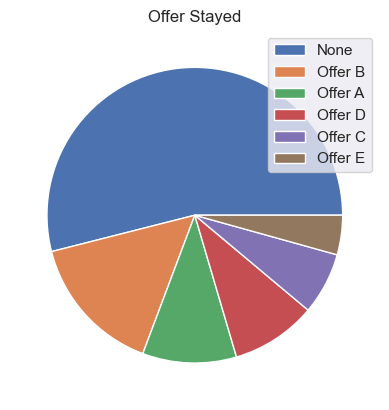

In [275]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Stayed["Offer"].value_counts());
ax.legend(patches, labels=Stayed["Offer"].value_counts().index, loc="best");  # ordre labels
plt.title("Offer Stayed")
plt.show();

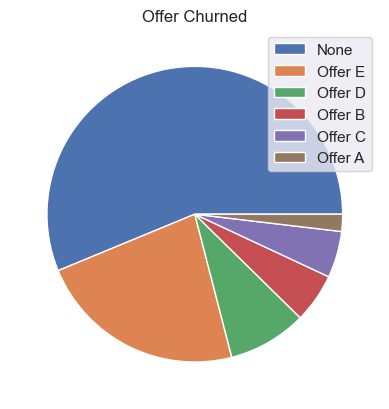

In [276]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Churned["Offer"].value_counts());
ax.legend(patches, labels=Churned["Offer"].value_counts().index, loc="best");  # ordre labels
plt.title("Offer Churned")
plt.show();

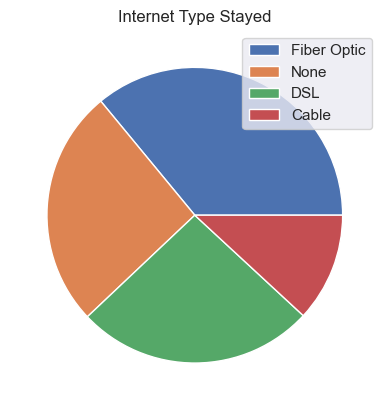

In [277]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Stayed["Internet Type"].value_counts());
ax.legend(patches, labels=Stayed["Internet Type"].value_counts().index, loc="best");  # ordre labels
plt.title("Internet Type Stayed")
plt.show();

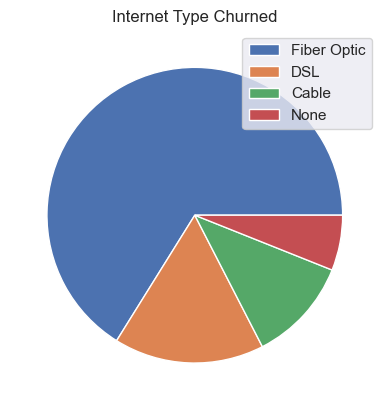

In [278]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Churned["Internet Type"].value_counts());
ax.legend(patches, labels=Churned["Internet Type"].value_counts().index, loc="best");  # ordre labels
plt.title("Internet Type Churned")
plt.show();

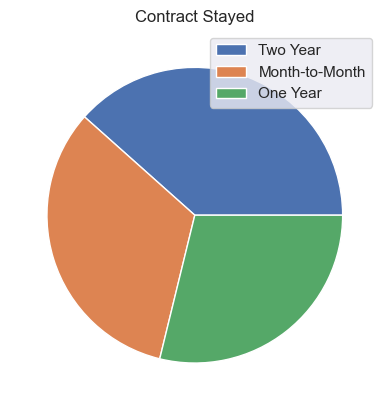

In [279]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Stayed["Contract"].value_counts());
ax.legend(patches, labels=Stayed["Contract"].value_counts().index, loc="best");  # ordre labels
plt.title("Contract Stayed")
plt.show();

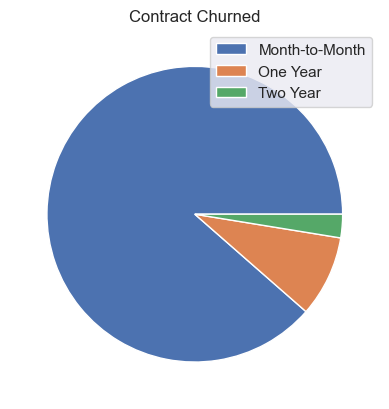

In [280]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Churned["Contract"].value_counts());
ax.legend(patches, labels=Churned["Contract"].value_counts().index, loc="best");  # ordre labels
plt.title("Contract Churned")
plt.show();

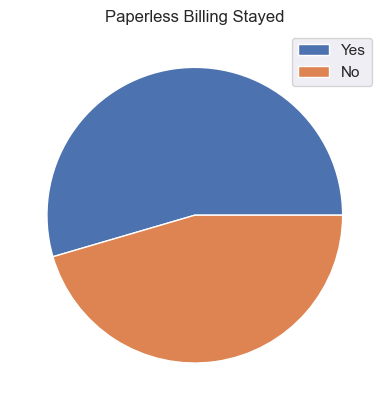

In [281]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Stayed["Paperless Billing"].value_counts());
ax.legend(patches, labels=Stayed["Paperless Billing"].value_counts().index, loc="best");  # ordre labels
plt.title("Paperless Billing Stayed")
plt.show();

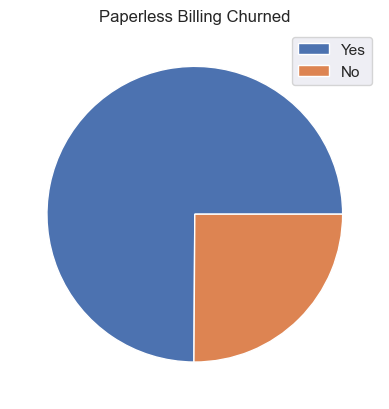

In [282]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Churned["Paperless Billing"].value_counts());
ax.legend(patches, labels=Churned["Paperless Billing"].value_counts().index, loc="best");  # ordre labels
plt.title("Paperless Billing Churned")
plt.show();

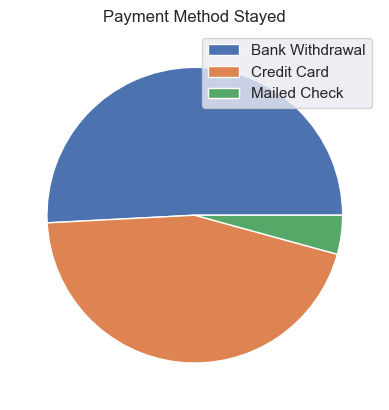

In [283]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Stayed["Payment Method"].value_counts());
ax.legend(patches, labels=Stayed["Payment Method"].value_counts().index, loc="best");  # ordre labels
plt.title("Payment Method Stayed")
plt.show();

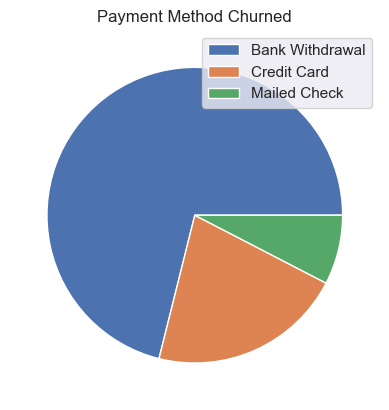

In [284]:
fig, ax = plt.subplots();
patches, _ = ax.pie(Churned["Payment Method"].value_counts());
ax.legend(patches, labels=Churned["Payment Method"].value_counts().index, loc="best");  # ordre labels
plt.title("Payment Method Churned")
plt.show();

# Eliminem Churn Reason i Churn Category

No podem utilitzar-les ja que son None per tots els Stayed i no None pels Churned

In [285]:
Telecom = Telecom.drop('Churn Reason', axis = 1)
Telecom = Telecom.drop('Churn Category', axis = 1)

In [286]:
Telecom.shape

(7043, 18)

# Balanceig

In [287]:
Telecom['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

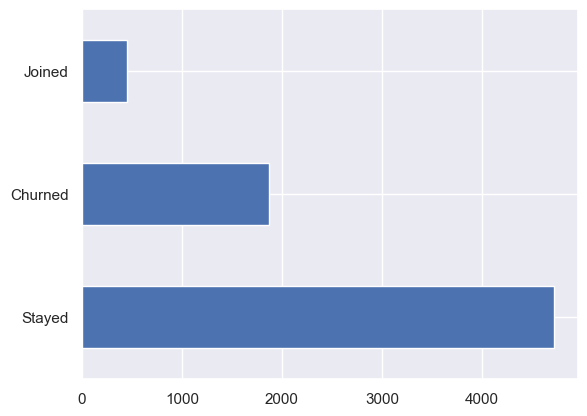

In [288]:
Telecom['Customer Status'].value_counts().plot(kind='barh');

In [289]:
#deixar o no Joined
# treure perque com acaben dunirse potser sen van i no ho sabem (la gent dura poc o molt)
tc = Telecom.copy()
tc = tc[tc['Customer Status'] != 'Joined']

In [290]:
def filter_status(status):
    if status == 'Churned':
        return status
    elif status == 'Stayed':
        return 'Customer'

In [291]:
tc["Churn Status"] = tc["Customer Status"].apply(filter_status)

In [292]:
tc = tc.drop('Customer Status', axis=1)

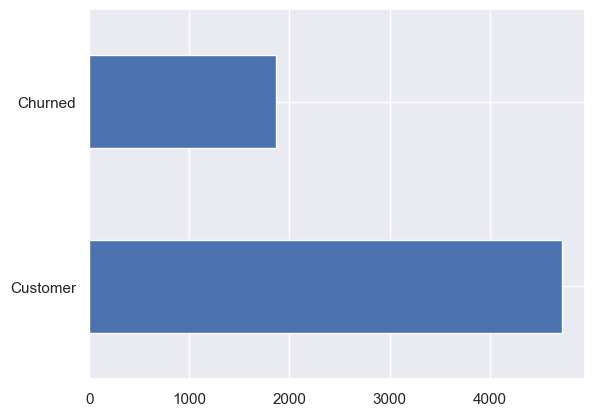

In [293]:
tc['Churn Status'].value_counts().plot(kind='barh');

# Partició

In [294]:
def custom_split_customer_status(df, var_string, prop_test=0.1, seed = 0):
    """df dataframe a retallar, var_string nom de la variable per la qual vols que la distribució estigui balancejada,
       prop_test: proporcio del df que vols que sigui pel test, seed: llavor per poder reproduir el resultat,
       retorna un df de train i un df de test"""
    
    df = df.sample(frac=1, random_state=seed)  # shuffle pel random

    
    n_modalitats = len(df[var_string].value_counts())  # quantes modalitats tenim; volem: prop_test*len(df)*(1/n_modalitats) de 
    t = len(df)
    
    # aconseguir les modalitats i posar un contador de quants individus necesitem de cadascuna
    c=round(prop_test*t*(1/n_modalitats))
    count={modality:c for modality in df[var_string].value_counts().index}
    
    # comprovar si es pot obtenir suficients mostres de cada modalitat
    aux = [c < t//1.5 for t in df[var_string].value_counts()]
    bbb = True
    for j in aux:
        if not j:
            bbb = False
    assert(bbb, f"Not enough data of a modality")

    
    #inicialitzem df
    
    cols = df.columns
    
    df_train = pd.DataFrame(columns=cols)
    df_test = pd.DataFrame(columns=cols)
    
    # obtencio de les mostres
    for _, row in df.iterrows():
        
        if count[row[var_string]] > 0:  # afegir al test
            count[row[var_string]] -= 1
            df_test.loc[len(df_test.index)] = row
        else:                           # afegir al train
            df_train.loc[len(df_train.index)] = row
            
        
        
    return df_train, df_test
    

In [295]:
train, test = custom_split_customer_status(tc, 'Churn Status', prop_test=0.2, seed=373)
#0.1 per test i 0.1 per val (despres fem 2a particio)

In [296]:
train.shape
test.shape

(5271, 18)

(1318, 18)

In [297]:
train.to_csv('train.csv', sep=';')
test.to_csv('test.csv', sep=';')

In [298]:
train = read_csv("train.csv", index_col=0, delimiter=';')
test = read_csv("test.csv", index_col=0, delimiter=';')

In [299]:
# Train = train
# Test = test

# Preparar categòriques

In [300]:
tc=train
tcy = tc.copy()
tc=tc.drop('Churn Status', axis=1)

y_test = test.copy()
y_test = y_test['Churn Status']
X_test = test.drop("Churn Status", axis=1)

In [301]:
pd.set_option('display.max_columns', None)

In [302]:
# fer funcio per canviar entre df
def ohe_pers(df, cat_columns):
    for var in cat_columns:
        enc = preprocessing.OneHotEncoder()
        enc.fit(df[[var]])
        # enc.categories_
        transf = enc.transform(df[[var]]).toarray()
        df[enc.categories_[0]] = transf


In [303]:
#Married, Paperless Billing
var_bins = ['Married', 'Paperless Billing']
for var in var_bins:
    tc[var] = tc[var].apply(ajuntar_binaries_filter)
    X_test[var] = X_test[var].apply(ajuntar_binaries_filter)

In [304]:
cat_columns = tc.dtypes[tc.dtypes=='object'].index
cat_columns

Index(['Offer', 'Internet Type', 'Contract', 'Payment Method'], dtype='object')

In [305]:
tc.dtypes

Married                                 int64
Number of Dependents                    int64
Zip Code                                int64
Number of Referrals                     int64
Tenure in Months                        int64
Offer                                  object
Internet Type                          object
Avg Monthly GB Download               float64
Contract                               object
Paperless Billing                       int64
Payment Method                         object
Monthly Charge                        float64
Age_disc                                int64
Total Streaming                         int64
Premium Services                        int64
Refunds                               float64
Average Monthly Extra Data Charges    float64
dtype: object

In [306]:
tc

Married  Number of Dependents  Zip Code  Number of Referrals  \
0           0                     1       923                    0   
1           0                     0       925                    0   
2           0                     0       954                    0   
3           1                     0       925                    1   
4           0                     0       923                    0   
...       ...                   ...       ...                  ...   
5266        1                     0       926                    1   
5267        0                     0       923                    0   
5268        1                     0       953                    0   
5269        0                     0       936                    0   
5270        1                     0       922                    1   

      Tenure in Months    Offer Internet Type  Avg Monthly GB Download  \
0                   35     None          None                      0.0   
1                   11  Offer D   Fiber Optic                     76.0   
2                   65     None          None                      0.0   
3                   72  Offer A   Fiber Optic                     14.0   
4                   31     None   Fiber Optic                     23.0   
...                ...      ...           ...                      ...   
5266                57  Offer B           DSL                      7.0   
5267                 1  Offer E   Fiber Optic                     18.0   
5268                67     None           DSL                      3.0   
5269                 2  Offer E   Fiber Optic                     27.0   
5270                52     None           DSL                     52.0   

            Contract  Paperless Billing   Payment Method  Monthly Charge  \
0           One Year                  1      Credit Card           20.10   
1     Month-to-Month                  0  Bank Withdrawal           72.90   
2           Two Year                  0      Credit Card           25.75   
3           Two Year                  1      Credit Card          112.90   
4     Month-to-Month                  1  Bank Withdrawal           80.45   
...              ...                ...              ...             ...   
5266        One Year                  1  Bank Withdrawal           70.10   
5267  Month-to-Month                  0  Bank Withdrawal           69.75   
5268        Two Year                  1  Bank Withdrawal           79.70   
5269  Month-to-Month                  1     Mailed Check           89.35   
5270        Two Year                  0      Credit Card           66.25   

      Age_disc  Total Streaming  Premium Services  Refunds  \
0           45                0                 0      0.0   
1           25                0                 2      0.0   
2           55                0                 1      1.0   
3           70                3                 5      0.0   
4           45                0                 3      0.0   
...        ...              ...               ...      ...   
5266        45                3                 2      0.0   
5267        35                0                 1      0.0   
5268        50                3                 4      0.0   
5269        60                2                 2      0.0   
5270        20                3                 5      0.0   

      Average Monthly Extra Data Charges  
0                                  0.000  
1                                  0.000  
2                                  0.000  
3                                  0.278  
4                                  0.000  
...                                  ...  
5266                               0.000  
5267                               0.000  
5268                               0.000  
5269                               0.000  
5270                               0.000  

[5271 rows x 17 columns]

In [307]:
# ohe_pers(tc, cat_columns)
# ohe_pers(X_test, cat_columns)

In [308]:

for var in cat_columns:
    enc = preprocessing.OneHotEncoder()
    enc.fit(tc[[var]])
    # enc.categories_
    transf = enc.transform(tc[[var]]).toarray()
    tc[enc.categories_[0]] = transf
    
    
    transf = enc.transform(X_test[[var]]).toarray()
    X_test[enc.categories_[0]] = transf

OneHotEncoder()

OneHotEncoder()

OneHotEncoder()

OneHotEncoder()

In [309]:
tc = borrar_var(tc, cat_columns)
X_test = borrar_var(X_test, cat_columns)

In [310]:
tc

Married  Number of Dependents  Zip Code  Number of Referrals  \
0           0                     1       923                    0   
1           0                     0       925                    0   
2           0                     0       954                    0   
3           1                     0       925                    1   
4           0                     0       923                    0   
...       ...                   ...       ...                  ...   
5266        1                     0       926                    1   
5267        0                     0       923                    0   
5268        1                     0       953                    0   
5269        0                     0       936                    0   
5270        1                     0       922                    1   

      Tenure in Months  Avg Monthly GB Download  Paperless Billing  \
0                   35                      0.0                  1   
1                   11                     76.0                  0   
2                   65                      0.0                  0   
3                   72                     14.0                  1   
4                   31                     23.0                  1   
...                ...                      ...                ...   
5266                57                      7.0                  1   
5267                 1                     18.0                  0   
5268                67                      3.0                  1   
5269                 2                     27.0                  1   
5270                52                     52.0                  0   

      Monthly Charge  Age_disc  Total Streaming  Premium Services  Refunds  \
0              20.10        45                0                 0      0.0   
1              72.90        25                0                 2      0.0   
2              25.75        55                0                 1      1.0   
3             112.90        70                3                 5      0.0   
4              80.45        45                0                 3      0.0   
...              ...       ...              ...               ...      ...   
5266           70.10        45                3                 2      0.0   
5267           69.75        35                0                 1      0.0   
5268           79.70        50                3                 4      0.0   
5269           89.35        60                2                 2      0.0   
5270           66.25        20                3                 5      0.0   

      Average Monthly Extra Data Charges  None  Offer A  Offer B  Offer C  \
0                                  0.000   1.0      0.0      0.0      0.0   
1                                  0.000   0.0      0.0      0.0      0.0   
2                                  0.000   1.0      0.0      0.0      0.0   
3                                  0.278   0.0      1.0      0.0      0.0   
4                                  0.000   0.0      0.0      0.0      0.0   
...                                  ...   ...      ...      ...      ...   
5266                               0.000   0.0      0.0      1.0      0.0   
5267                               0.000   0.0      0.0      0.0      0.0   
5268                               0.000   0.0      0.0      0.0      0.0   
5269                               0.000   0.0      0.0      0.0      0.0   
5270                               0.000   0.0      0.0      0.0      0.0   

      Offer D  Offer E  Cable  DSL  Fiber Optic  Month-to-Month  One Year  \
0         0.0      0.0    0.0  0.0          0.0             0.0       1.0   
1         1.0      0.0    0.0  0.0          1.0             1.0       0.0   
2         0.0      0.0    0.0  0.0          0.0             0.0       0.0   
3         0.0      0.0    0.0  0.0          1.0             0.0       0.0   
4         0.0      0.0    0.0  0.0          1.0             1.0       0.0   


# Oversampling / undersampling

In [311]:
# 1 undersampling + CV  <--------------------------------------
# 2 split fix i over/undersampling en train
# 3 Fer CV a ma (agafar train-val i fer 4 splits)
# 4 Fer subsplits de la classe abundant, fer tants CV com subsplits i fer un ensemble

In [312]:
# Fer undersampling TomekLinks + random undersampling
# https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/
# https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html
# https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.ClusterCentroids.html

In [313]:
tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(tc, tcy['Churn Status'])

In [314]:
X_resampled

Married  Number of Dependents  Zip Code  Number of Referrals  \
0           0                     1       923                    0   
1           0                     0       925                    0   
2           0                     0       954                    0   
3           1                     0       925                    1   
4           0                     0       923                    0   
...       ...                   ...       ...                  ...   
4950        1                     0       926                    1   
4951        0                     0       923                    0   
4952        1                     0       953                    0   
4953        0                     0       936                    0   
4954        1                     0       922                    1   

      Tenure in Months  Avg Monthly GB Download  Paperless Billing  \
0                   35                      0.0                  1   
1                   11                     76.0                  0   
2                   65                      0.0                  0   
3                   72                     14.0                  1   
4                   31                     23.0                  1   
...                ...                      ...                ...   
4950                57                      7.0                  1   
4951                 1                     18.0                  0   
4952                67                      3.0                  1   
4953                 2                     27.0                  1   
4954                52                     52.0                  0   

      Monthly Charge  Age_disc  Total Streaming  Premium Services  Refunds  \
0              20.10        45                0                 0      0.0   
1              72.90        25                0                 2      0.0   
2              25.75        55                0                 1      1.0   
3             112.90        70                3                 5      0.0   
4              80.45        45                0                 3      0.0   
...              ...       ...              ...               ...      ...   
4950           70.10        45                3                 2      0.0   
4951           69.75        35                0                 1      0.0   
4952           79.70        50                3                 4      0.0   
4953           89.35        60                2                 2      0.0   
4954           66.25        20                3                 5      0.0   

      Average Monthly Extra Data Charges  None  Offer A  Offer B  Offer C  \
0                                  0.000   1.0      0.0      0.0      0.0   
1                                  0.000   0.0      0.0      0.0      0.0   
2                                  0.000   1.0      0.0      0.0      0.0   
3                                  0.278   0.0      1.0      0.0      0.0   
4                                  0.000   0.0      0.0      0.0      0.0   
...                                  ...   ...      ...      ...      ...   
4950                               0.000   0.0      0.0      1.0      0.0   
4951                               0.000   0.0      0.0      0.0      0.0   
4952                               0.000   0.0      0.0      0.0      0.0   
4953                               0.000   0.0      0.0      0.0      0.0   
4954                               0.000   0.0      0.0      0.0      0.0   

      Offer D  Offer E  Cable  DSL  Fiber Optic  Month-to-Month  One Year  \
0         0.0      0.0    0.0  0.0          0.0             0.0       1.0   
1         1.0      0.0    0.0  0.0          1.0             1.0       0.0   
2         0.0      0.0    0.0  0.0          0.0             0.0       0.0   
3         0.0      0.0    0.0  0.0          1.0             0.0       0.0   
4         0.0      0.0    0.0  0.0          1.0             1.0       0.0   


In [315]:
y_resampled

0       Customer
1       Customer
2       Customer
3       Customer
4       Customer
          ...   
4950     Churned
4951     Churned
4952     Churned
4953     Churned
4954    Customer
Name: Churn Status, Length: 4955, dtype: object

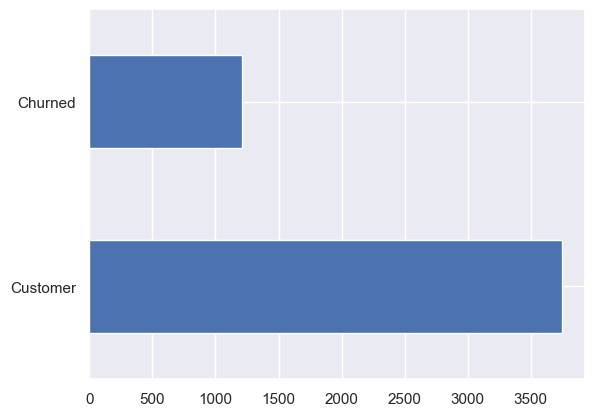

In [316]:
y_resampled.value_counts().plot(kind='barh');

In [317]:
rus = RandomUnderSampler(random_state=373)
X_train, y_train = rus.fit_resample(X_resampled, y_resampled)

In [318]:
X_train.shape

(2420, 28)

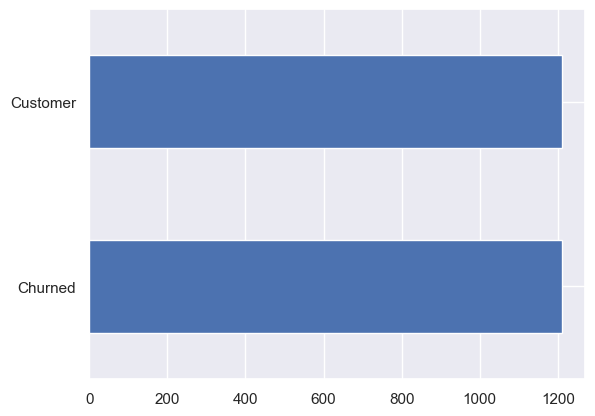

In [319]:
y_train.value_counts().plot(kind='barh');

In [320]:
X_train
y_train

Married  Number of Dependents  Zip Code  Number of Referrals  \
0           0                     0       961                    0   
1           1                     0       923                    0   
2           0                     1       900                    0   
3           0                     0       960                    0   
4           1                     1       907                    1   
...       ...                   ...       ...                  ...   
2415        1                     0       954                    0   
2416        1                     1       923                    1   
2417        0                     1       939                    0   
2418        1                     1       926                    1   
2419        1                     1       934                    1   

      Tenure in Months  Avg Monthly GB Download  Paperless Billing  \
0                    5                     59.0                  1   
1                    8                     16.0                  1   
2                   49                     11.0                  1   
3                   10                     18.0                  0   
4                    4                     56.0                  0   
...                ...                      ...                ...   
2415                54                     13.0                  1   
2416                14                     59.0                  1   
2417                66                      0.0                  0   
2418                72                     59.0                  1   
2419                21                     59.0                  1   

      Monthly Charge  Age_disc  Total Streaming  Premium Services  Refunds  \
0              51.00        20                3                 2      0.0   
1              85.20        30                2                 2      0.0   
2             103.70        40                3                 4      0.0   
3              95.20        55                3                 2      0.0   
4              56.50        40                0                 3      0.0   
...              ...       ...              ...               ...      ...   
2415           99.05        65                2                 2      0.0   
2416           61.40        20                2                 2      0.0   
2417           19.95        65                0                 0      0.0   
2418          115.60        25                3                 5      0.0   
2419           26.05        25                0                 1      0.0   

      Average Monthly Extra Data Charges  None  Offer A  Offer B  Offer C  \
0                                  0.000   0.0      0.0      0.0      0.0   
1                                  0.000   0.0      0.0      0.0      0.0   
2                                  0.000   0.0      0.0      0.0      0.0   
3                                  0.000   0.0      0.0      0.0      0.0   
4                                  0.000   0.0      0.0      0.0      0.0   
...                                  ...   ...      ...      ...      ...   
2415                               0.741   0.0      0.0      0.0      0.0   
2416                               1.429   0.0      0.0      0.0      0.0   
2417                               0.000   1.0      0.0      0.0      0.0   
2418                               1.944   0.0      0.0      0.0      0.0   
2419                               0.000   0.0      0.0      0.0      0.0   

      Offer D  Offer E  Cable  DSL  Fiber Optic  Month-to-Month  One Year  \
0         0.0      0.0    0.0  1.0          0.0             1.0       0.0   
1         0.0      1.0    0.0  0.0          1.0             1.0       0.0   
2         0.0      0.0    0.0  0.0          1.0             1.0       0.0   
3         1.0      0.0    0.0  0.0          1.0             1.0       0.0   
4         0.0      0.0    0.0  1.0          0.0             1.0       0.0   


0        Churned
1        Churned
2        Churned
3        Churned
4        Churned
          ...   
2415    Customer
2416    Customer
2417    Customer
2418    Customer
2419    Customer
Name: Churn Status, Length: 2420, dtype: object

In [321]:
# tc2 = pd.merge(X_resampled, y_resampled)
# tc = X_resampled.join(y_resampled)
# tc

In [322]:
# ara que tenim 50/50 podem utilitzar stratified
from sklearn.model_selection import train_test_split

In [323]:
# shuffle default es True
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
#                                                     stratify=y_resampled, 
#                                                     test_size=0.20, random_state=373)

In [324]:
# shuffle default es True
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
                                                    stratify=y_test, 
                                                    test_size=0.50, random_state=373)

In [325]:
X_train.shape
X_val.shape
X_test.shape

(2420, 28)

(659, 28)

(659, 28)

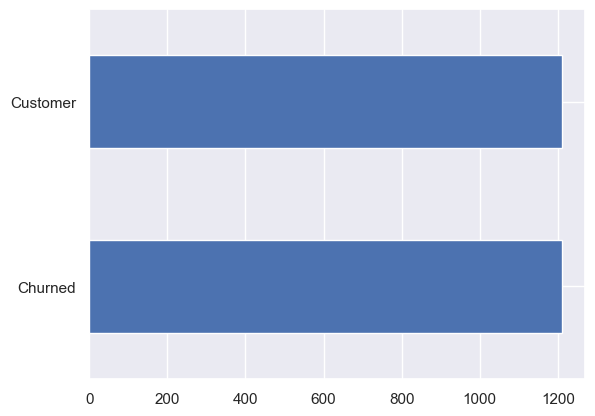

In [326]:
y_train.value_counts().plot(kind='barh');

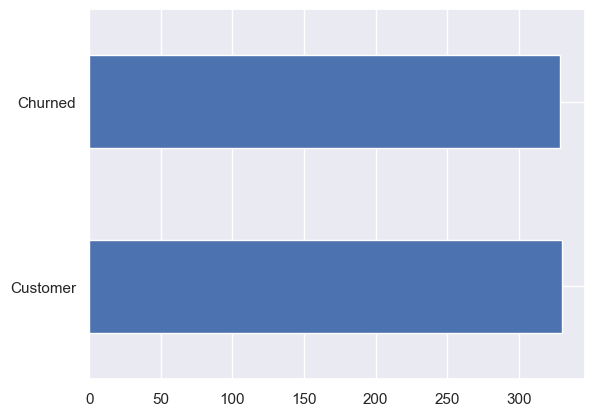

In [327]:
y_val.value_counts().plot(kind='barh');

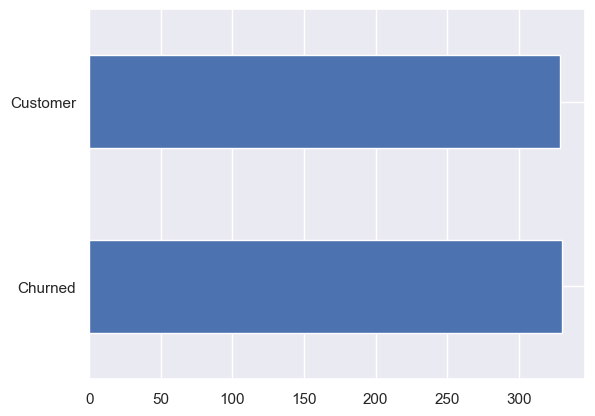

In [328]:
y_test.value_counts().plot(kind='barh');

### Guardar csv de train i test

In [329]:
Telecom.shape
Telecom.columns

(7043, 18)

Index(['Married', 'Number of Dependents', 'Zip Code', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Internet Type', 'Avg Monthly GB Download',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Customer Status', 'Age_disc', 'Total Streaming', 'Premium Services',
       'Refunds', 'Average Monthly Extra Data Charges'],
      dtype='object')

In [330]:
#com hem comprovat que surten del tamany esperat les guardem
X_train.to_csv('X_train.csv', sep=';')
y_train.to_csv('y_train.csv', sep=';')

X_val.to_csv('X_val.csv', sep=';')
y_val.to_csv('y_val.csv', sep=';')

X_test.to_csv('X_test.csv', sep=';')
y_test.to_csv('y_test.csv', sep=';')

In [331]:
#llegim el train test val
X_train = read_csv("X_train.csv", index_col=0, delimiter=';')

X_val = read_csv("X_val.csv", index_col=0, delimiter=';')

X_test = read_csv("X_test.csv", index_col=0, delimiter=';')

In [332]:
train_subset = X_train.copy()

val_subset = X_val.copy()

test_subset = X_test.copy()

# Normalització

In [333]:
numerical_columns = Telecom.dtypes[Telecom.dtypes!='object'].index
numerical_columns = list(numerical_columns)
numerical_columns.remove('Number of Dependents')
numerical_columns.remove('Number of Referrals')
numerical_columns.remove('Refunds')
numerical_columns

['Zip Code',
 'Tenure in Months',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Age_disc',
 'Total Streaming',
 'Premium Services',
 'Average Monthly Extra Data Charges']

In [334]:
Train_norm = train_subset.copy()
Val_norm = val_subset.copy()
Test_norm = test_subset.copy()

### Normalització

# Problemes amb <=0 --> sumar 0.01 

In [335]:
for var in numerical_columns:
    if Train_norm[var].min()==0:
        Train_norm[var]=Train_norm[var]+0.01
        Val_norm[var]=Val_norm[var]+0.01
        Test_norm[var]=Test_norm[var]+0.01

In [336]:
Test_norm['Number of Dependents'].min()

0

In [337]:
# transformacio log
# for var in numerical_columns:
#     Train_norm[var]=Train_norm[var].apply(log)
#     Test_norm[var]=Test_norm[var].apply(log)

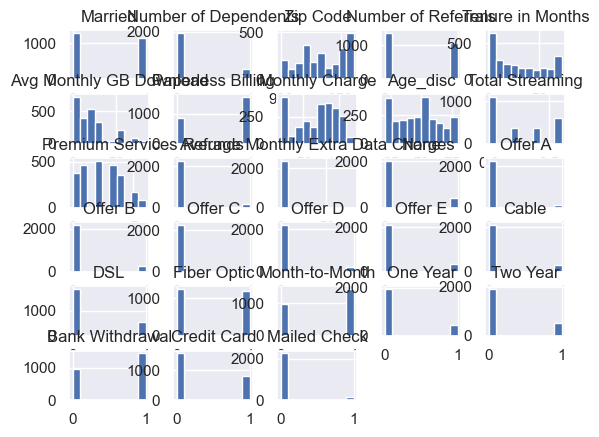

In [338]:
Train_norm.hist();

In [339]:
#norm boxcox
for var in numerical_columns:
    print(var)
    
    x, lb= boxcox(Train_norm[var])
    Train_norm[var] = x
    
    z = boxcox(Val_norm[var], lb)
    Val_norm[var] = z

    z = boxcox(Test_norm[var], lb)
    Test_norm[var] = z

   


Zip Code
Tenure in Months
Avg Monthly GB Download
Monthly Charge
Age_disc
Total Streaming
Premium Services
Average Monthly Extra Data Charges


# Escalat

In [340]:
all_cols = Train_norm.columns

## KNN

In [341]:
# minmax scale
for var in numerical_columns:
    min_max_scaler =  preprocessing.MinMaxScaler()
    min_max_scaler.fit(Train_norm[[var]])
    
    Train_norm[[var]]=min_max_scaler.transform(Train_norm[[var]])
    
    Val_norm[[var]]=min_max_scaler.transform(Val_norm[[var]])
    
    Test_norm[[var]]=min_max_scaler.transform(Test_norm[[var]])

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

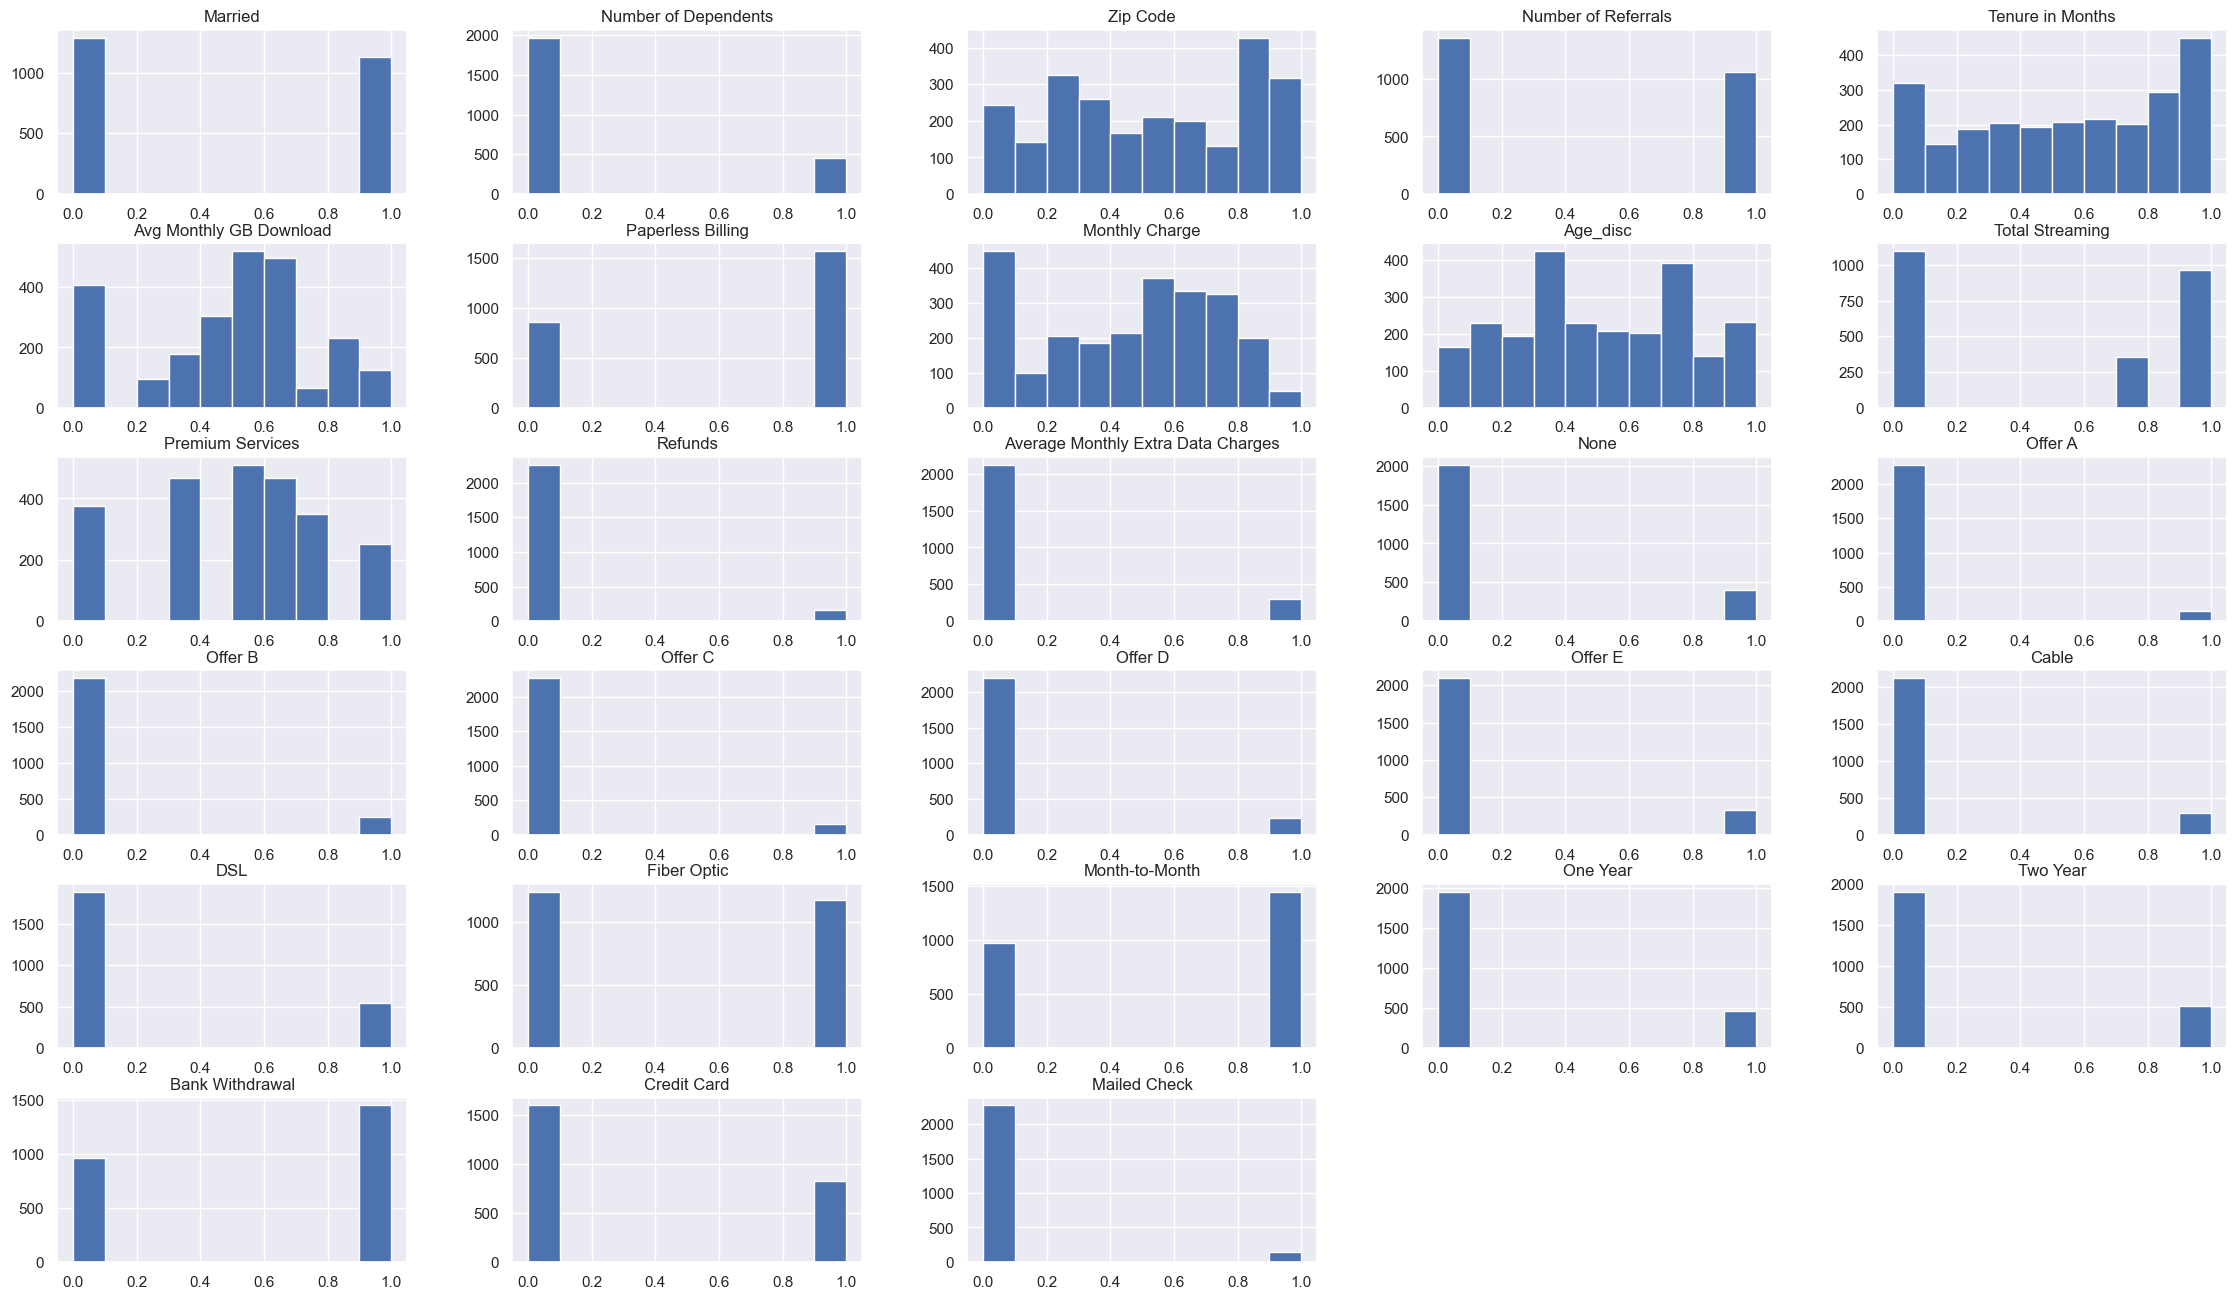

In [342]:
fig, axes= plt.subplots(1,1, figsize=(28,16))
Train_norm.hist(ax=axes);

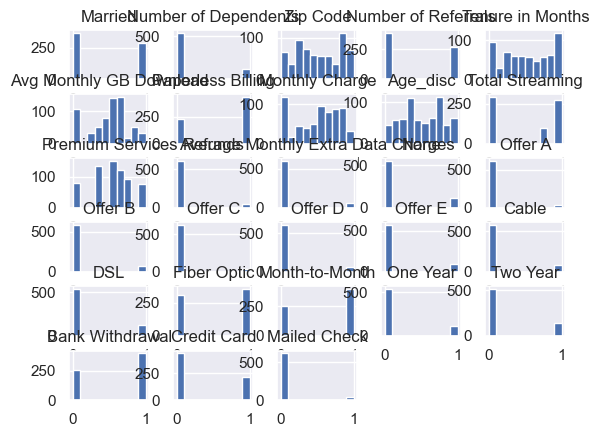

In [343]:
Val_norm.hist();

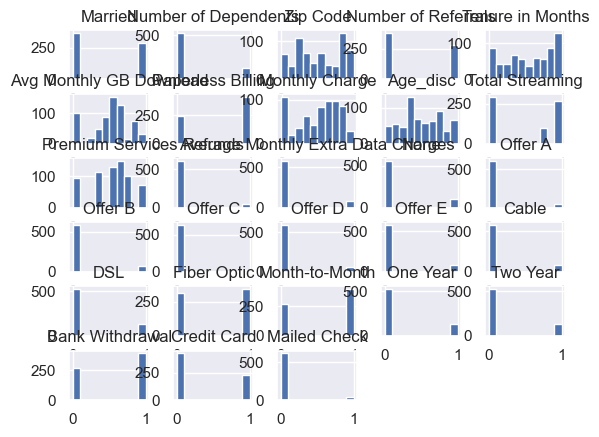

In [344]:
Test_norm.hist();

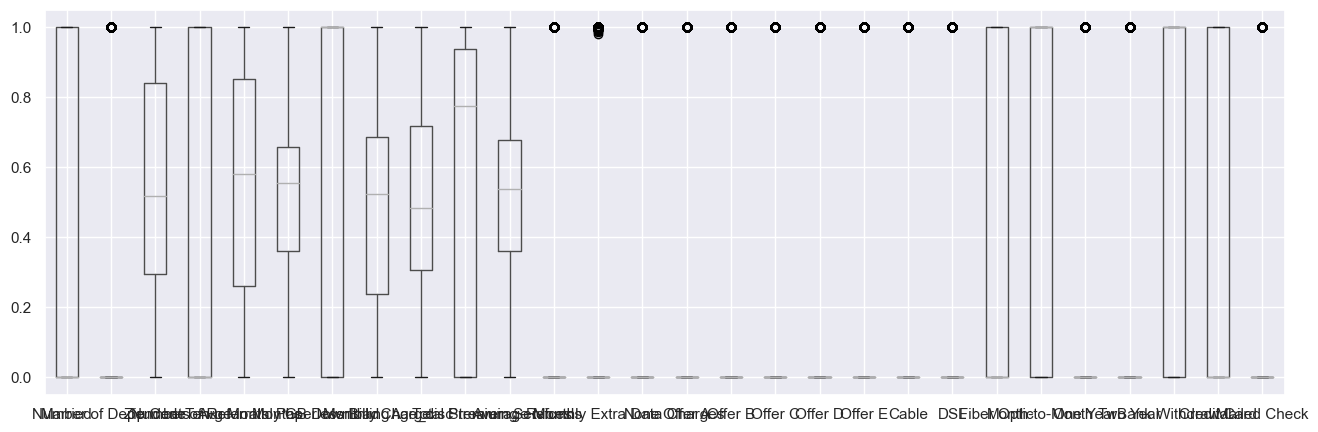

In [345]:
Train_norm.loc[:, all_cols].boxplot(figsize=(16, 5));

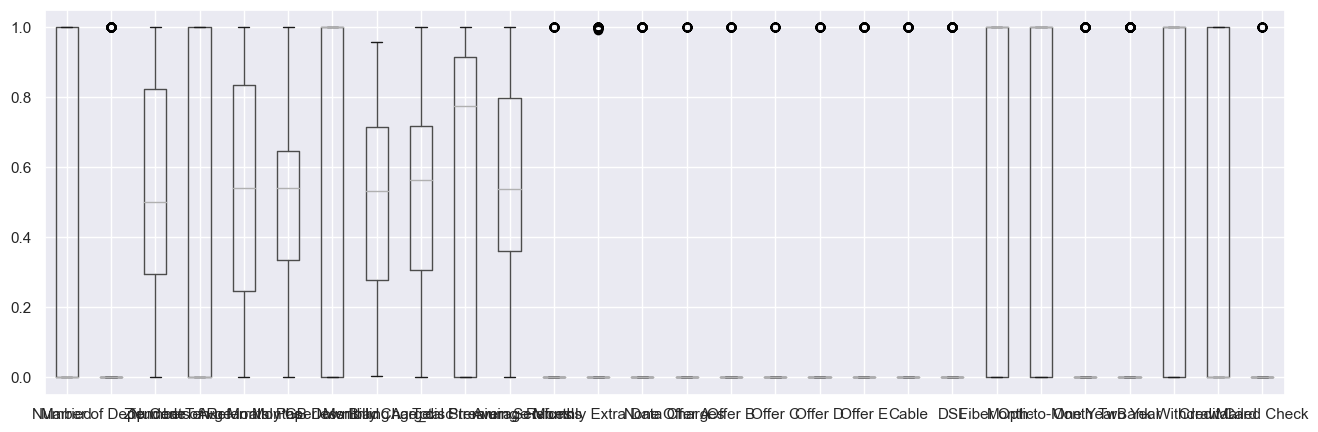

In [346]:
Val_norm.loc[:, all_cols].boxplot(figsize=(16, 5));

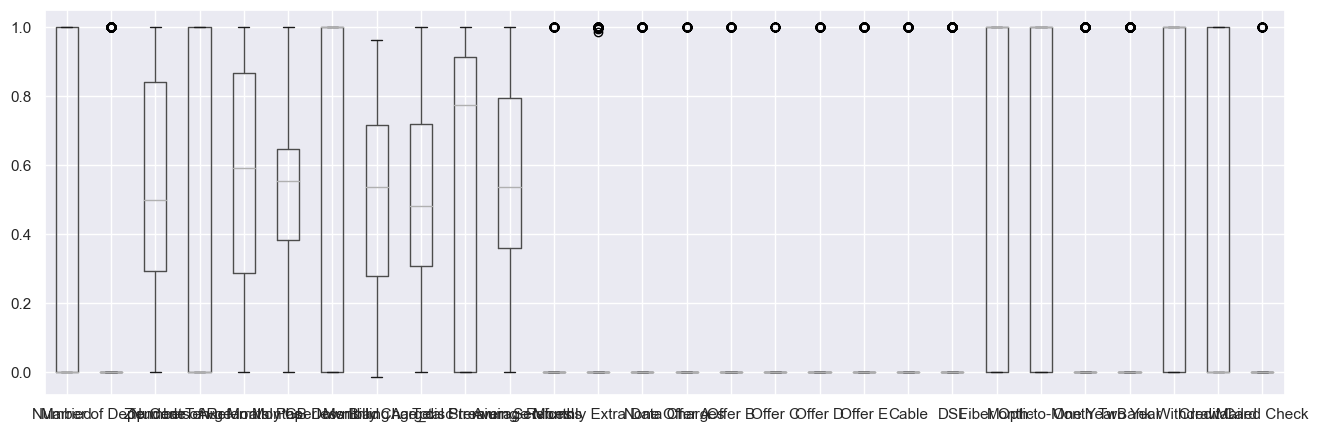

In [347]:
Test_norm.loc[:, all_cols].boxplot(figsize=(16, 5));

## SVM

In [348]:
Train_svm = train_subset.copy()
Val_svm = val_subset.copy()
Test_svm = test_subset.copy()

In [349]:
numerical_columns

['Zip Code',
 'Tenure in Months',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Age_disc',
 'Total Streaming',
 'Premium Services',
 'Average Monthly Extra Data Charges']

In [350]:
for var in numerical_columns:
    min_max_scaler =  preprocessing.MinMaxScaler()
    min_max_scaler.fit(Train_svm[[var]])
    
    Train_svm[[var]]=min_max_scaler.transform(Train_svm[[var]])
    
    Val_svm[[var]]=min_max_scaler.transform(Val_svm[[var]])
    
    Test_svm[[var]]=min_max_scaler.transform(Test_svm[[var]])

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

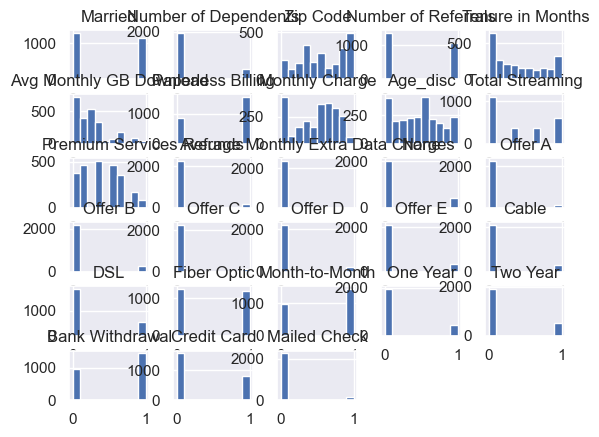

In [351]:
Train_svm.hist();

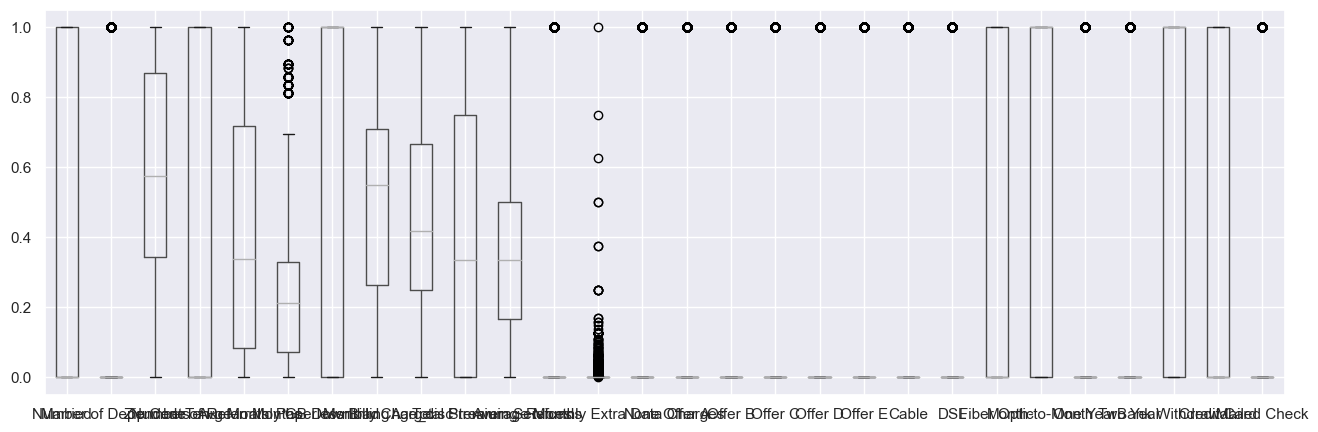

In [352]:
Train_svm.loc[:, all_cols].boxplot(figsize=(16, 5));

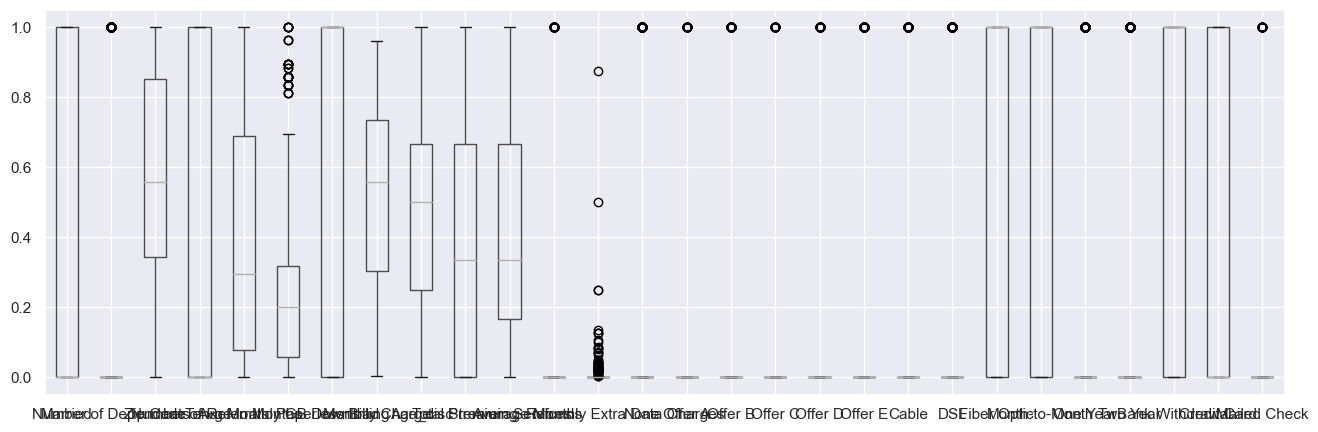

In [353]:
Val_svm.loc[:, all_cols].boxplot(figsize=(16, 5));

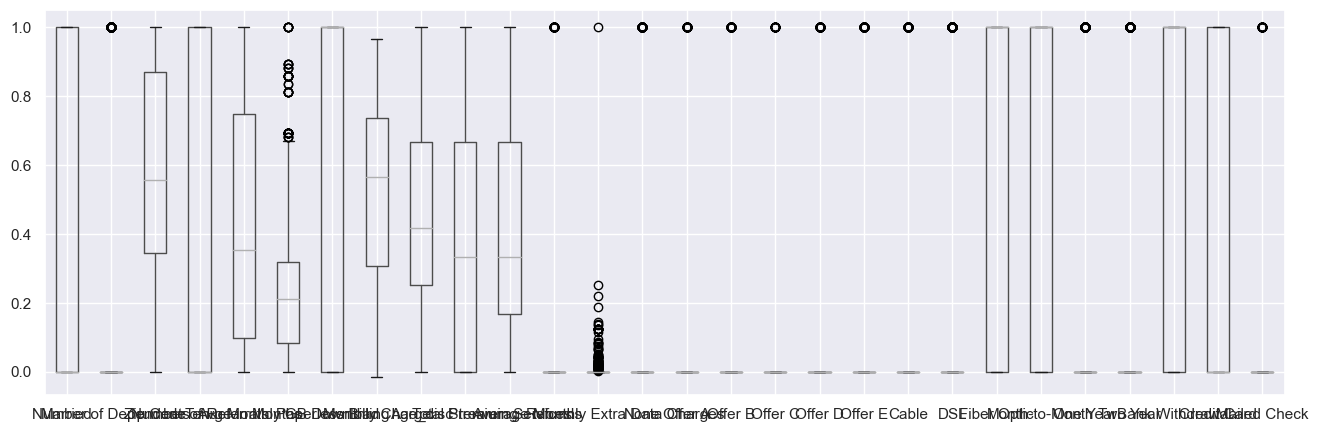

In [354]:
Test_svm.loc[:, all_cols].boxplot(figsize=(16, 5));

### Còpia per les dades de clustering

Utilitzarem dades sense undersampling ja que no hi ha variable resposta

In [355]:
Telecom_hc = Telecom.copy()
Telecom_hc=Telecom_hc.drop('Customer Status', axis=1)
Telecom_dbscan = Telecom.copy()
Telecom_dbscan=Telecom_dbscan.drop('Customer Status', axis=1)

y_Telecom = Telecom.copy()
y_Telecom = y_Telecom['Customer Status']
y_Telecom.to_csv('y_Telecom.csv', sep=';')

## Hierarchical

In [356]:
for var in numerical_columns:
    min_max_scaler =  preprocessing.MinMaxScaler()
    min_max_scaler.fit(Telecom_hc[[var]])
    
    Telecom_hc[[var]]=min_max_scaler.transform(Telecom_hc[[var]])

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

## One-hot encoding

In [357]:
#Married, Paperless Billing
var_bins = ['Married', 'Paperless Billing']
for var in var_bins:
    Telecom_hc[var] = Telecom_hc[var].apply(ajuntar_binaries_filter)

In [358]:
Telecom_hc

Married  Number of Dependents  Zip Code  Number of Referrals  \
0           1                     0     0.525                    1   
1           0                     0     0.197                    0   
2           0                     0     0.426                    0   
3           1                     0     0.738                    1   
4           1                     0     0.492                    1   
...       ...                   ...       ...                  ...   
7038        0                     0     0.311                    0   
7039        1                     0     0.869                    1   
7040        0                     0     0.885                    0   
7041        1                     0     0.328                    1   
7042        1                     0     1.000                    1   

      Tenure in Months    Offer Internet Type  Avg Monthly GB Download  \
0                0.113     None         Cable                    0.188   
1                0.113     None         Cable                    0.118   
2                0.042  Offer E   Fiber Optic                    0.353   
3                0.169  Offer D   Fiber Optic                    0.047   
4                0.028     None   Fiber Optic                    0.129   
...                ...      ...           ...                      ...   
7038             0.169  Offer D           DSL                    0.694   
7039             0.296  Offer D   Fiber Optic                    0.200   
7040             0.014  Offer E           DSL                    0.600   
7041             0.930  Offer A         Cable                    0.682   
7042             0.873     None         Cable                    0.059   

            Contract  Paperless Billing   Payment Method  Monthly Charge  \
0           One Year                  1      Credit Card           0.472   
1     Month-to-Month                  0      Credit Card           0.420   
2     Month-to-Month                  1  Bank Withdrawal           0.552   
3     Month-to-Month                  1  Bank Withdrawal           0.784   
4     Month-to-Month                  1      Credit Card           0.648   
...              ...                ...              ...             ...   
7038        One Year                  0      Credit Card           0.371   
7039  Month-to-Month                  1  Bank Withdrawal           0.660   
7040  Month-to-Month                  1      Credit Card           0.324   
7041        Two Year                  0      Credit Card           0.493   
7042        Two Year                  0  Bank Withdrawal           0.408   

      Age_disc  Total Streaming  Premium Services  Refunds  \
0        0.250            0.333             0.500      0.0   
1        0.417            0.667             0.167      1.0   
2        0.500            0.000             0.333      0.0   
3        1.000            0.667             0.500      0.0   
4        0.917            0.333             0.333      0.0   
...        ...              ...               ...      ...   
7038     0.000            0.333             0.500      0.0   
7039     0.333            0.667             0.333      0.0   
7040     0.000            0.000             0.333      0.0   
7041     0.000            0.667             0.667      0.0   
7042     0.250            1.000             0.667      0.0   

      Average Monthly Extra Data Charges  
0                                  0.000  
1                                  0.014  
2                                  0.000  
3                                  0.000  
4                                  0.000  
...                                  ...  
7038                               0.000  
7039                               0.000  
7040                               0.000  
7041                               0.000  
7042                               0.000  

[7043 rows x 17 columns]

In [359]:
cat_columns = list(cat_columns)
cat_columns

['Offer', 'Internet Type', 'Contract', 'Payment Method']

In [360]:
ohe_pers(Telecom_hc, cat_columns)

In [361]:
Telecom_hc = borrar_var(Telecom_hc, cat_columns)

In [362]:
Telecom_hc

Married  Number of Dependents  Zip Code  Number of Referrals  \
0           1                     0     0.525                    1   
1           0                     0     0.197                    0   
2           0                     0     0.426                    0   
3           1                     0     0.738                    1   
4           1                     0     0.492                    1   
...       ...                   ...       ...                  ...   
7038        0                     0     0.311                    0   
7039        1                     0     0.869                    1   
7040        0                     0     0.885                    0   
7041        1                     0     0.328                    1   
7042        1                     0     1.000                    1   

      Tenure in Months  Avg Monthly GB Download  Paperless Billing  \
0                0.113                    0.188                  1   
1                0.113                    0.118                  0   
2                0.042                    0.353                  1   
3                0.169                    0.047                  1   
4                0.028                    0.129                  1   
...                ...                      ...                ...   
7038             0.169                    0.694                  0   
7039             0.296                    0.200                  1   
7040             0.014                    0.600                  1   
7041             0.930                    0.682                  0   
7042             0.873                    0.059                  0   

      Monthly Charge  Age_disc  Total Streaming  Premium Services  Refunds  \
0              0.472     0.250            0.333             0.500      0.0   
1              0.420     0.417            0.667             0.167      1.0   
2              0.552     0.500            0.000             0.333      0.0   
3              0.784     1.000            0.667             0.500      0.0   
4              0.648     0.917            0.333             0.333      0.0   
...              ...       ...              ...               ...      ...   
7038           0.371     0.000            0.333             0.500      0.0   
7039           0.660     0.333            0.667             0.333      0.0   
7040           0.324     0.000            0.000             0.333      0.0   
7041           0.493     0.000            0.667             0.667      0.0   
7042           0.408     0.250            1.000             0.667      0.0   

      Average Monthly Extra Data Charges  None  Offer A  Offer B  Offer C  \
0                                  0.000   0.0      0.0      0.0      0.0   
1                                  0.014   0.0      0.0      0.0      0.0   
2                                  0.000   0.0      0.0      0.0      0.0   
3                                  0.000   0.0      0.0      0.0      0.0   
4                                  0.000   0.0      0.0      0.0      0.0   
...                                  ...   ...      ...      ...      ...   
7038                               0.000   0.0      0.0      0.0      0.0   
7039                               0.000   0.0      0.0      0.0      0.0   
7040                               0.000   0.0      0.0      0.0      0.0   
7041                               0.000   0.0      1.0      0.0      0.0   
7042                               0.000   0.0      0.0      0.0      0.0   

      Offer D  Offer E  Cable  DSL  Fiber Optic  Month-to-Month  One Year  \
0         0.0      0.0    1.0  0.0          0.0             0.0       1.0   
1         0.0      0.0    1.0  0.0          0.0             1.0       0.0   
2         0.0      1.0    0.0  0.0          1.0             1.0       0.0   
3         1.0      0.0    0.0  0.0          1.0             1.0       0.0   
4         0.0      0.0    0.0  0.0          1.0             1.0       0.0   


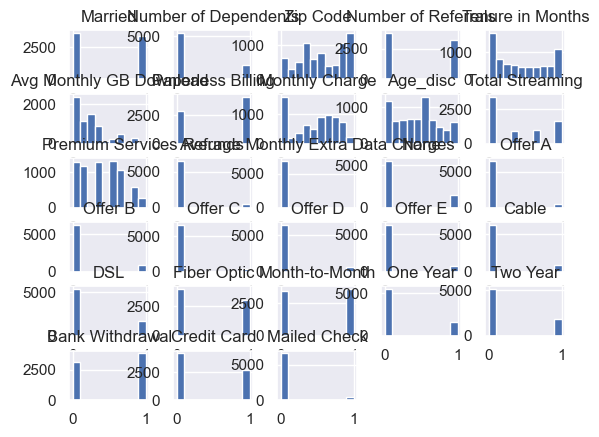

In [363]:
Telecom_hc.hist();

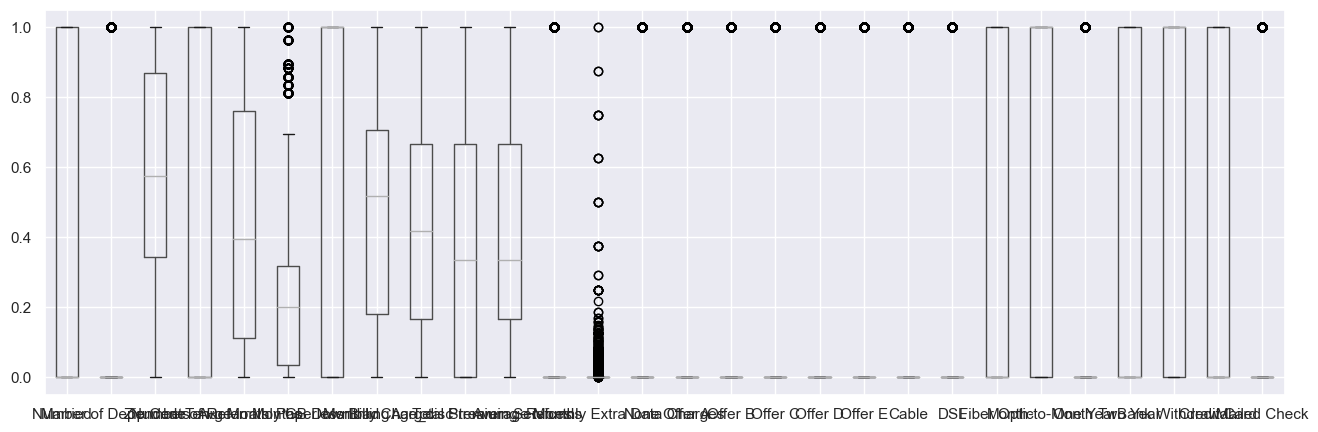

In [364]:
Telecom_hc.loc[:, all_cols].boxplot(figsize=(16, 5));

## DBscan

In [365]:
# aamb dbscan utilitzarem gower i per tant deixem les categoriques

In [366]:
for var in numerical_columns:
    min_max_scaler =  preprocessing.MinMaxScaler()
    min_max_scaler.fit(Telecom_dbscan[[var]])
    
    Telecom_dbscan[[var]]=min_max_scaler.transform(Telecom_dbscan[[var]])

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

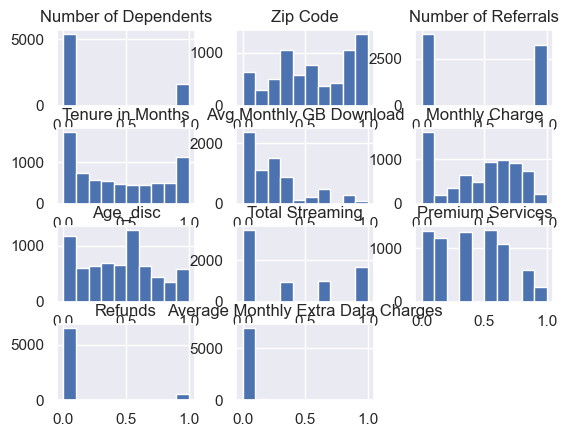

In [367]:
Telecom_dbscan.hist();

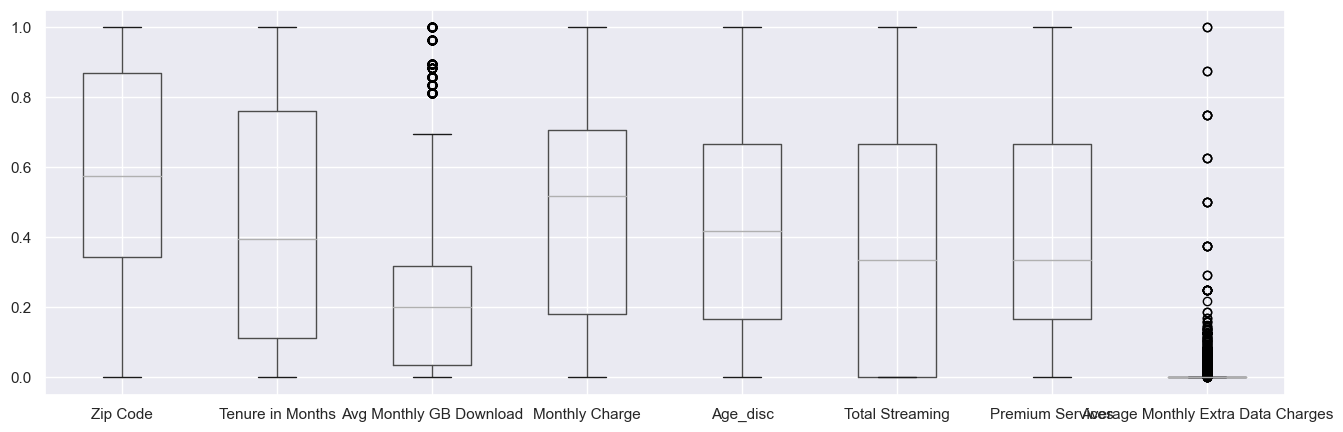

In [368]:
Telecom_dbscan.loc[:, numerical_columns].boxplot(figsize=(16, 5));

In [369]:
# enc = preprocessing.OneHotEncoder()

In [370]:
# enc.fit(Telecom[['Gender']])
# enc.categories_

In [371]:
# transf = enc.transform(Telecom[['Gender']]).toarray()

In [372]:
# Telecom[enc.categories_[0]] = transf

In [373]:
# pd.set_option('display.max_columns', None)

# fer el mateix pels altres df

In [374]:
Telecom.dtypes

Married                                object
Number of Dependents                    int64
Zip Code                                int64
Number of Referrals                     int64
Tenure in Months                        int64
Offer                                  object
Internet Type                          object
Avg Monthly GB Download               float64
Contract                               object
Paperless Billing                      object
Payment Method                         object
Monthly Charge                        float64
Customer Status                        object
Age_disc                                int64
Total Streaming                         int64
Premium Services                        int64
Refunds                               float64
Average Monthly Extra Data Charges    float64
dtype: object

# Modificar Churn Status pel GridSearchCV

In [375]:
def mod_churn_status(s):
    if s == 'Churned':
        return 1
    else:
        return 0

In [376]:
y_train = y_train.apply(mod_churn_status)

In [377]:
y_train

0       1
1       1
2       1
3       1
4       1
       ..
2415    0
2416    0
2417    0
2418    0
2419    0
Name: Churn Status, Length: 2420, dtype: int64

In [378]:
y_val = y_val.apply(mod_churn_status)

In [379]:
y_val

574     1
398     0
863     0
1195    1
10      0
       ..
340     0
191     0
32      0
812     0
939     1
Name: Churn Status, Length: 659, dtype: int64

In [380]:
y_test = y_test.apply(mod_churn_status)

In [381]:
y_test

326     1
76      0
1111    1
184     1
1015    1
       ..
860     1
945     1
1055    1
827     1
1084    1
Name: Churn Status, Length: 659, dtype: int64

In [382]:
X_train.dtypes

Married                                 int64
Number of Dependents                    int64
Zip Code                                int64
Number of Referrals                     int64
Tenure in Months                        int64
Avg Monthly GB Download               float64
Paperless Billing                       int64
Monthly Charge                        float64
Age_disc                                int64
Total Streaming                         int64
Premium Services                        int64
Refunds                               float64
Average Monthly Extra Data Charges    float64
None                                  float64
Offer A                               float64
Offer B                               float64
Offer C                               float64
Offer D                               float64
Offer E                               float64
Cable                                 float64
DSL                                   float64
Fiber Optic                       

# Guardar tots els CSV

In [383]:
# Train.to_csv('train.csv', sep=';')
# Test.to_csv('test.csv', sep=';')

In [384]:
X_train.to_csv('X_train.csv', sep=';')
y_train.to_csv('y_train.csv', sep=';')

X_val.to_csv('X_val.csv', sep=';')
y_val.to_csv('y_val.csv', sep=';')

X_test.to_csv('X_test.csv', sep=';')
y_test.to_csv('y_test.csv', sep=';')

In [385]:
Train_norm.to_csv('train_norm.csv', sep=';')
Val_norm.to_csv('val_norm.csv', sep=';')
Test_norm.to_csv('test_norm.csv', sep=';')

In [386]:
Train_svm.to_csv('train_svm.csv', sep=';')
Val_svm.to_csv('val_svm.csv', sep=';')
Test_svm.to_csv('test_svm.csv', sep=';')

In [387]:
# clust
Telecom_hc.to_csv('telecom_hc.csv', sep=';')
Telecom_dbscan.to_csv('telecom_dbs.csv', sep=';')

# Model seleccionat

In [388]:
# provar amb test

In [389]:
from sklearn.svm import SVC

In [390]:
# entrenem amb els parametres escollits
best_clf = SVC(C=0.001, kernel='linear')
best_clf.fit(Train_svm, y_train)

SVC(C=0.001, kernel='linear')

In [391]:
# prediccio i metriques
y_preds  = best_clf.predict(Test_svm)


print(metrics.classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77       329
           1       0.74      0.90      0.81       330

    accuracy                           0.79       659
   macro avg       0.81      0.79      0.79       659
weighted avg       0.81      0.79      0.79       659



In [392]:
metrics.confusion_matrix(y_test, y_preds)

array([[227, 102],
       [ 34, 296]], dtype=int64)

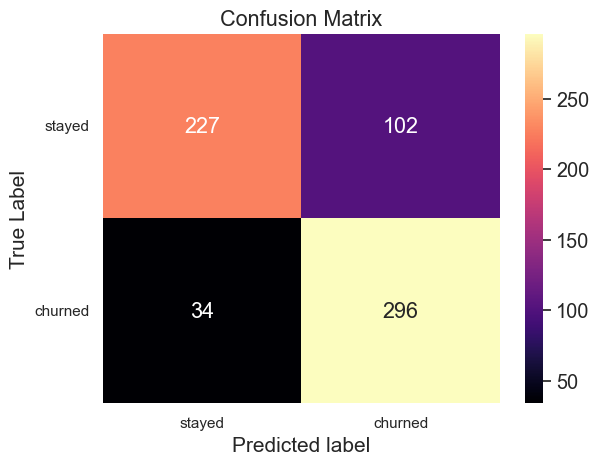

<Figure size 1000x700 with 0 Axes>

In [393]:
matrix = metrics.confusion_matrix(y_test,  
                                            y_preds)#turn this into a dataframe

labels = ['stayed', 'churned']  
matrix_df = pd.DataFrame(matrix)#plot the result
ax = plt.axes()
_ = sns.set(font_scale=1.3)
_ = plt.figure(figsize=(10,7))
_ = sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
_ = ax.set_title('Confusion Matrix')
_ = ax.set_xlabel("Predicted label", fontsize =15)
_ = ax.set_xticklabels(labels)
_ = ax.set_ylabel("True Label", fontsize=15)
_ = ax.set_yticklabels(labels, rotation = 0)
_ = plt.show()

In [394]:
# provar test entrenant amb val + train

In [395]:
# concatenar train val
frames=[Train_svm, Val_svm]
new_train=pd.concat(frames)
frames=[y_train, y_val]
new_y_train=pd.concat(frames)

In [396]:
# entrenem amb els parametres escollits
best_clf = SVC(C=0.001, kernel='linear')
best_clf.fit(new_train, new_y_train)

SVC(C=0.001, kernel='linear')

In [397]:
# prediccio i metriques
y_preds  = best_clf.predict(Test_svm)

print(metrics.classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77       329
           1       0.75      0.88      0.81       330

    accuracy                           0.79       659
   macro avg       0.80      0.79      0.79       659
weighted avg       0.80      0.79      0.79       659



In [398]:
metrics.confusion_matrix(y_test, y_preds)

array([[232,  97],
       [ 40, 290]], dtype=int64)

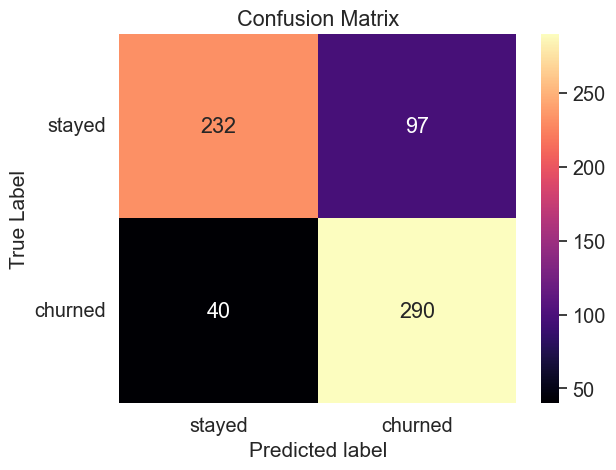

<Figure size 1000x700 with 0 Axes>

In [399]:
matrix = metrics.confusion_matrix(y_test,  
                                            y_preds)#turn this into a dataframe

labels = ['stayed', 'churned']  
matrix_df = pd.DataFrame(matrix)#plot the result
ax = plt.axes()
_ = sns.set(font_scale=1.3)
_ = plt.figure(figsize=(10,7))
_ = sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
_ = ax.set_title('Confusion Matrix')
_ = ax.set_xlabel("Predicted label", fontsize =15)
_ = ax.set_xticklabels(labels)
_ = ax.set_ylabel("True Label", fontsize=15)
_ = ax.set_yticklabels(labels, rotation = 0)
_ = plt.show()